In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [2]:
plt.rcParams['xtick.labelsize'] = 15.
plt.rcParams['ytick.labelsize'] = 15.
plt.rcParams['figure.figsize'] = [15.,8.]
plt.rcParams['legend.fontsize'] = 13.
plt.rcParams['axes.labelsize'] = 15.

In [3]:
train = pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.shape

(1460, 81)

In [5]:
train.duplicated().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
def missing(train):
    missing_value = train.isnull().sum().sort_values(ascending=False)
    missing_percentage= (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)
    missing_total = pd.concat([missing_value,missing_percentage], axis=1, keys=['missing_value','missing_percentage'])
    return missing_total
missing(train)

missing_value  missing_percentage
PoolQC                  1453           99.520548
MiscFeature             1406           96.301370
Alley                   1369           93.767123
Fence                   1179           80.753425
FireplaceQu              690           47.260274
LotFrontage              259           17.739726
GarageYrBlt               81            5.547945
GarageCond                81            5.547945
GarageType                81            5.547945
GarageFinish              81            5.547945
GarageQual                81            5.547945
BsmtFinType2              38            2.602740
BsmtExposure              38            2.602740
BsmtQual                  37            2.534247
BsmtCond                  37            2.534247
BsmtFinType1              37            2.534247
MasVnrArea                 8            0.547945
MasVnrType                 8            0.547945
Electrical                 1            0.068493
Id                         0            0.000000
Functional                 0            0.000000
Fireplaces                 0            0.000000
KitchenQual                0            0.000000
KitchenAbvGr               0            0.000000
BedroomAbvGr               0            0.000000
HalfBath                   0            0.000000
FullBath                   0            0.000000
BsmtHalfBath               0            0.000000
TotRmsAbvGrd               0            0.000000
GarageCars                 0            0.000000
GrLivArea                  0            0.000000
GarageArea                 0            0.000000
PavedDrive                 0            0.000000
WoodDeckSF                 0            0.000000
OpenPorchSF                0            0.000000
EnclosedPorch              0            0.000000
3SsnPorch                  0            0.000000
ScreenPorch                0            0.000000
PoolArea                   0            0.000000
MiscVal                    0            0.000000
MoSold                     0            0.000000
YrSold                     0            0.000000
SaleType                   0            0.000000
SaleCondition              0            0.000000
BsmtFullBath               0            0.000000
HeatingQC                  0            0.000000
LowQualFinSF               0            0.000000
LandSlope                  0            0.000000
OverallQual                0            0.000000
HouseStyle                 0            0.000000
BldgType                   0            0.000000
Condition2                 0            0.000000
Condition1                 0            0.000000
Neighborhood               0            0.000000
LotConfig                  0            0.000000
YearBuilt                  0            0.000000
Utilities                  0            0.000000
LandContour                0            0.000000
LotShape                   0            0.000000
Street                     0            0.000000
LotArea                    0            0.000000
MSZoning                   0            0.000000
OverallCond                0            0.000000
YearRemodAdd               0            0.000000
2ndFlrSF                   0            0.000000
BsmtFinSF2                 0            0.000000
1stFlrSF                   0            0.000000
CentralAir                 0            0.000000
MSSubClass                 0            0.000000
Heating                    0            0.000000
TotalBsmtSF                0            0.000000
BsmtUnfSF                  0            0.000000
BsmtFinSF1                 0            0.000000
RoofStyle                  0            0.000000
Foundation                 0            0.000000
ExterCond                  0            0.000000
ExterQual                  0            0.000000
Exterior2nd                0            0.000000
Exterior1st                0            0.000000
RoofMatl                   0            0.000000
SalePrice                  0            0.0000

<AxesSubplot:>

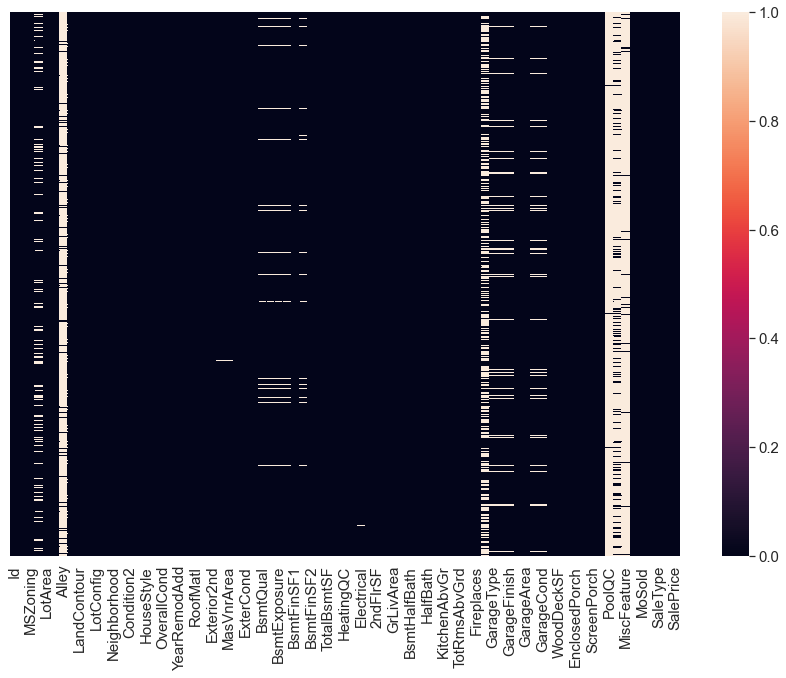

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull(),yticklabels=False)

### White line represents the amount of misisng values in the columns

In [9]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
null_feature = [feature for feature in train.columns if train[feature].isnull().sum()>1]
train[null_feature].head()

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0         65.0   NaN    BrkFace       196.0       Gd       TA           No   
1         80.0   NaN       None         0.0       Gd       TA           Gd   
2         68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3         60.0   NaN       None         0.0       TA       Gd           No   
4         84.0   NaN    BrkFace       350.0       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0          GLQ          Unf         NaN     Attchd       2003.0          RFn   
1          ALQ          Unf          TA     Attchd       1976.0          RFn   
2          GLQ          Unf          TA     Attchd       2001.0          RFn   
3          ALQ          Unf          Gd     Detchd       1998.0          Unf   
4          GLQ          Unf          TA     Attchd       2000.0          RFn   

  GarageQual GarageCond PoolQC Fence MiscFeature  
0         TA         TA    NaN   NaN         NaN  
1         TA         TA    NaN   NaN         NaN  
2         TA         TA    NaN   NaN         NaN  
3         TA         TA    NaN   NaN         NaN  
4         TA         TA    NaN   NaN         NaN

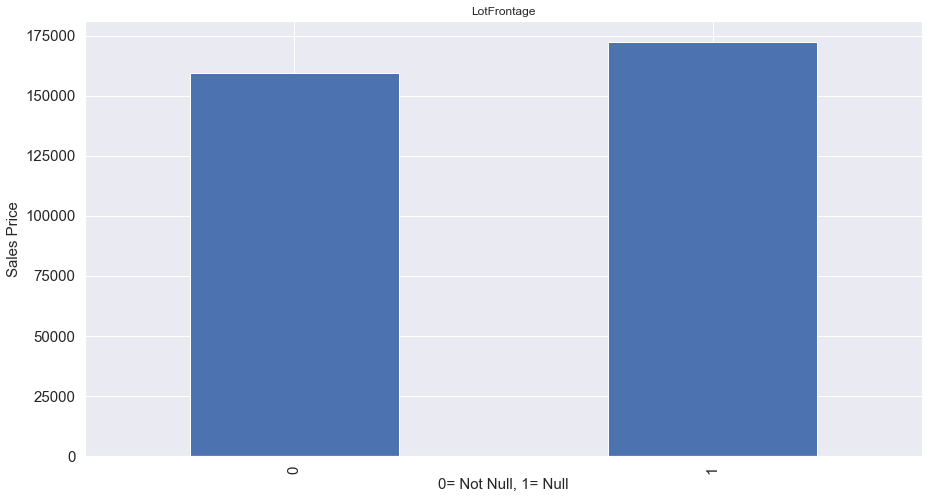

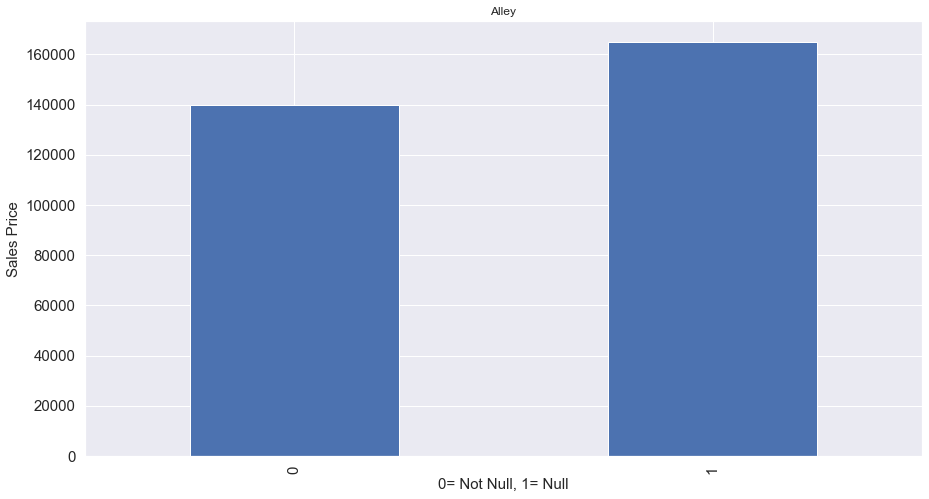

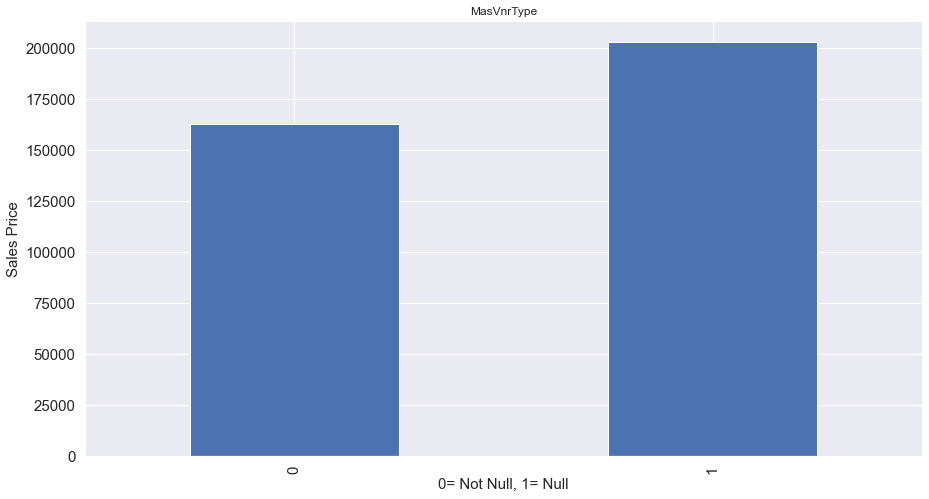

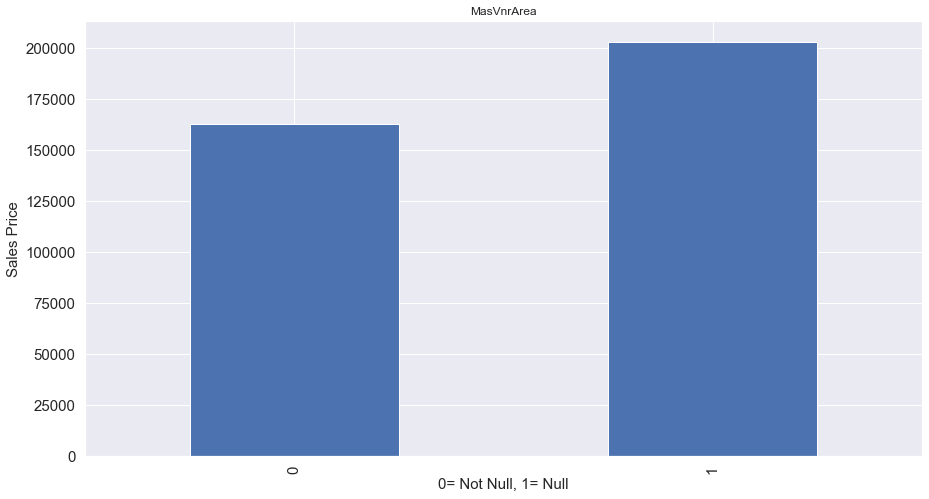

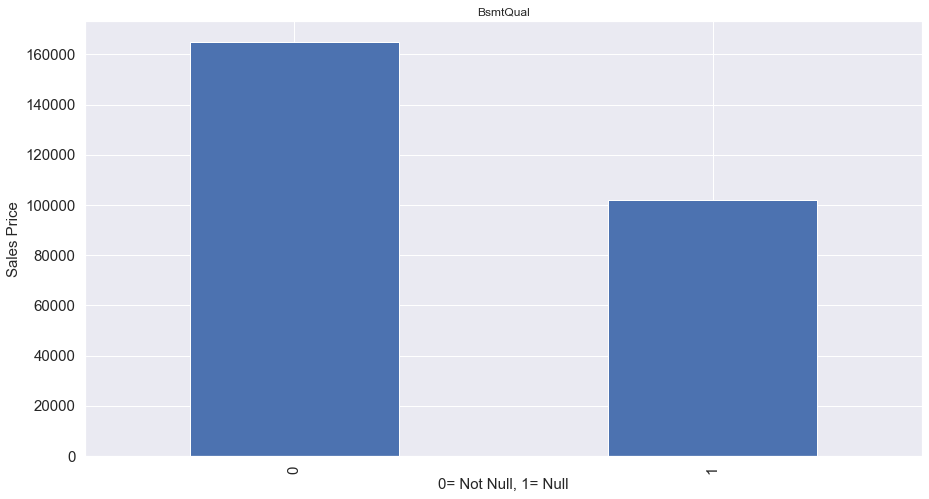

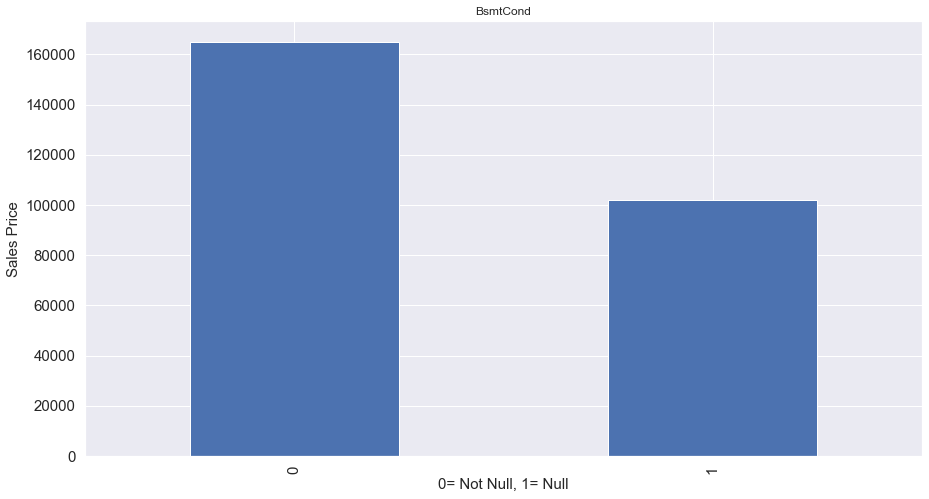

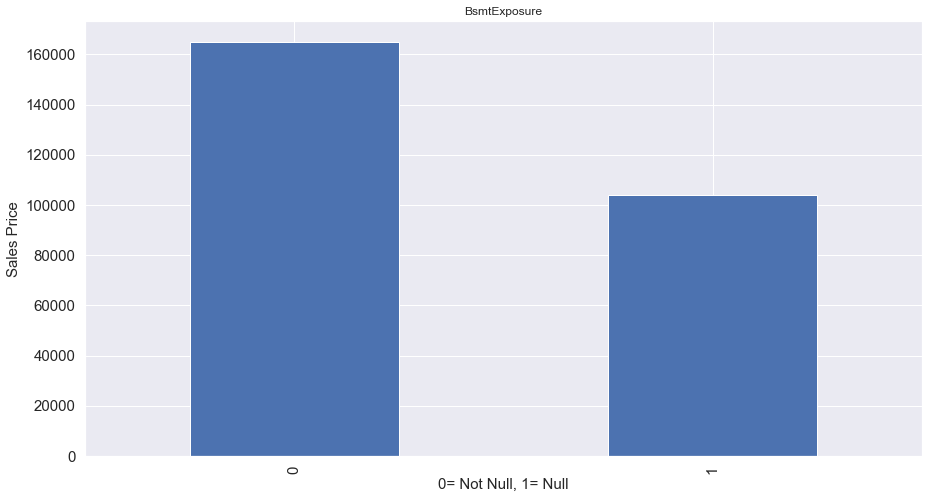

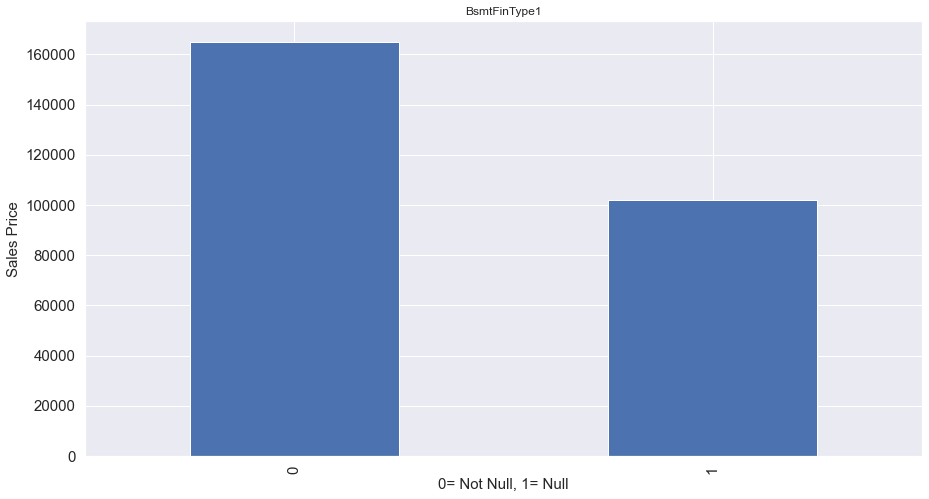

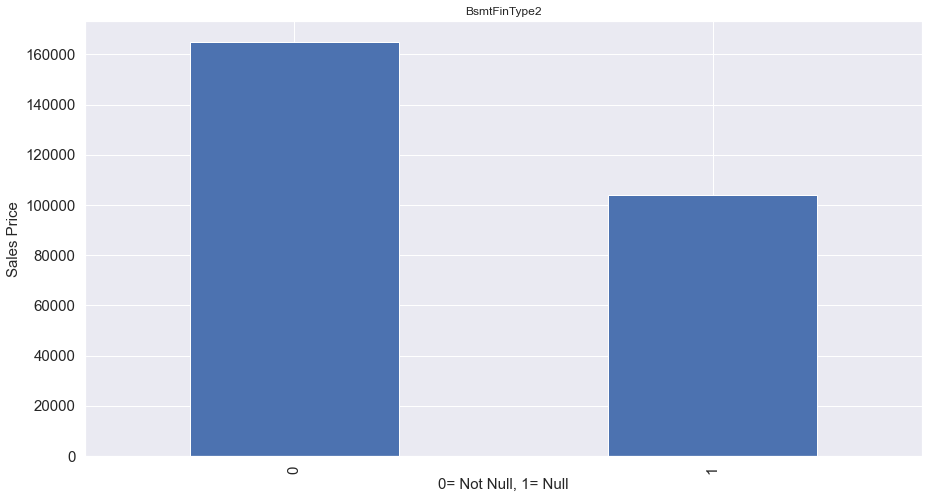

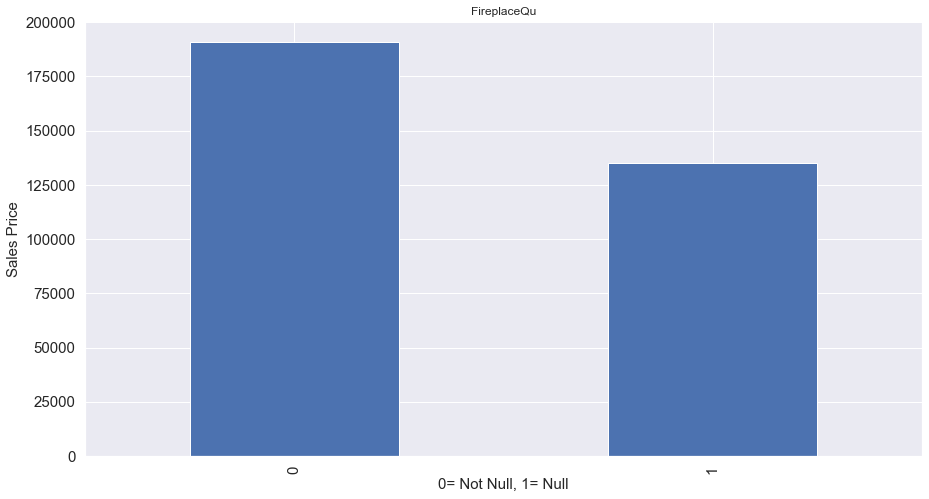

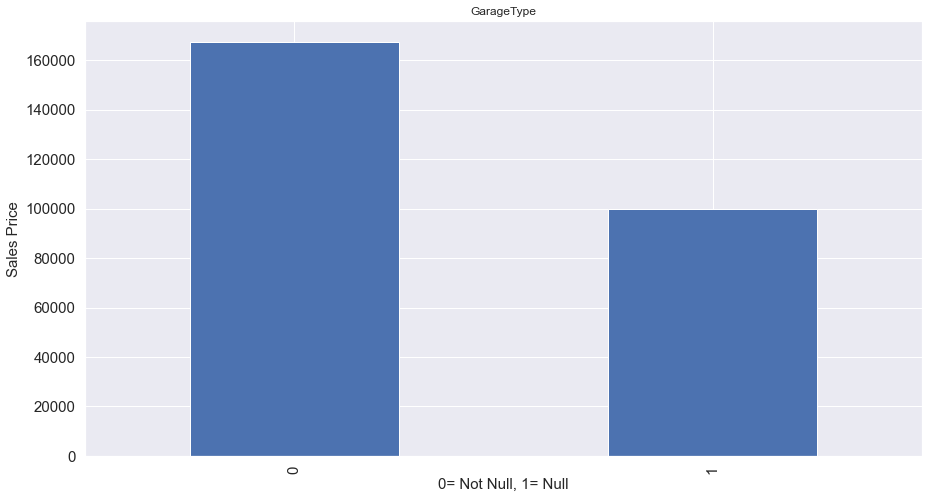

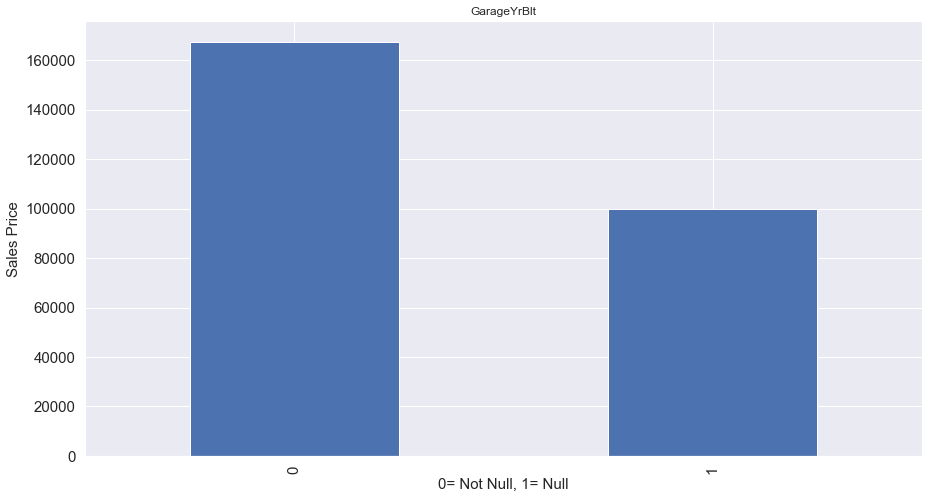

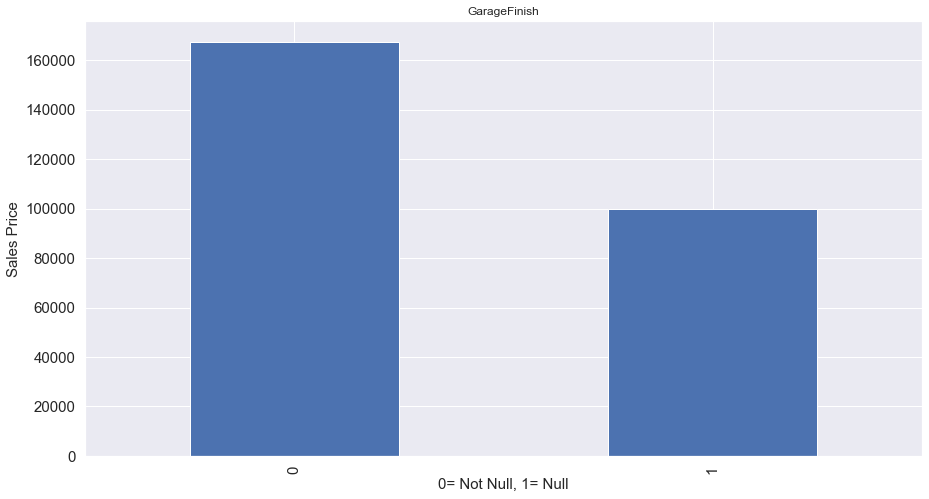

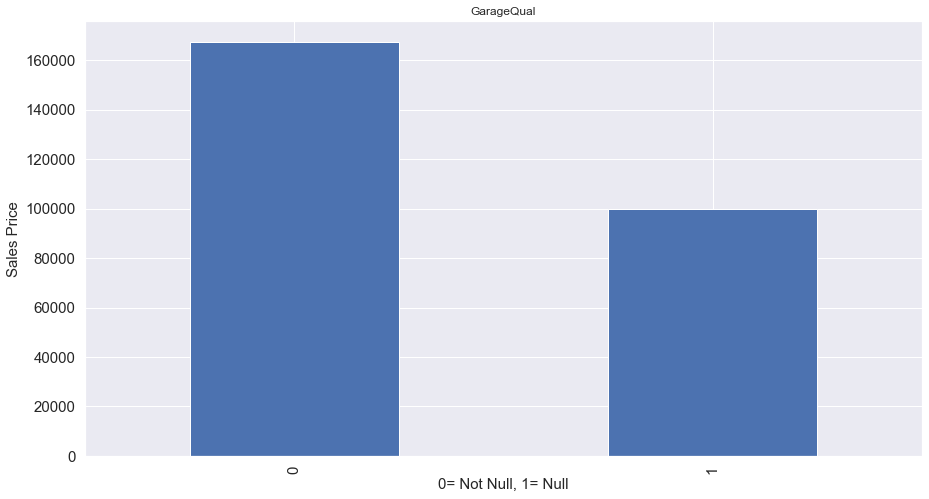

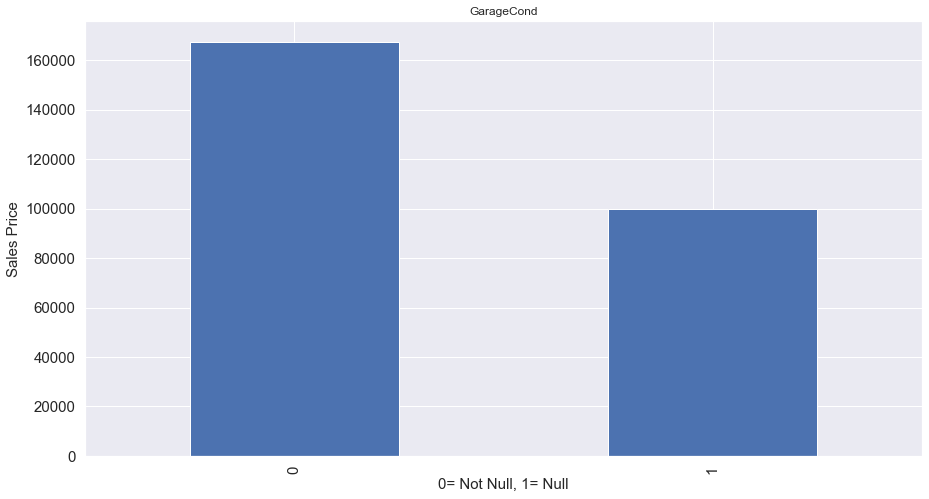

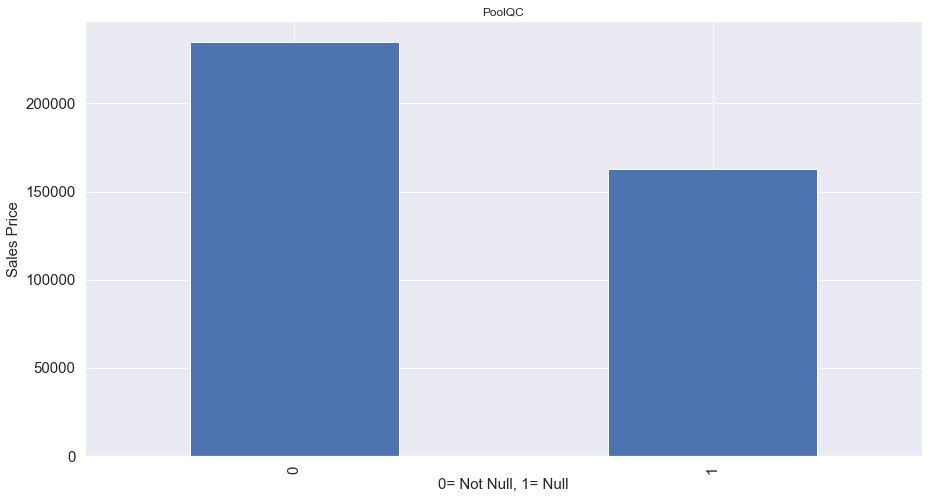

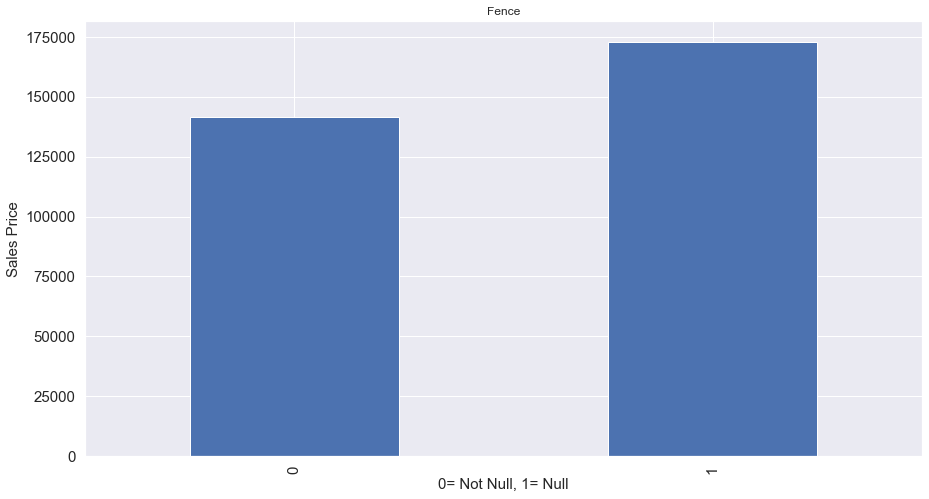

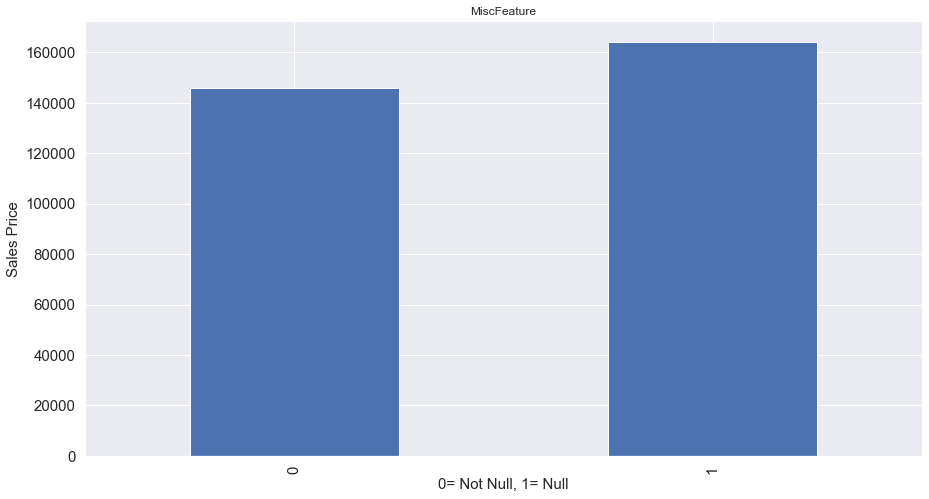

In [11]:
for feature in null_feature:
    data=train.copy()
    
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel('0= Not Null, 1= Null')
    plt.ylabel('Sales Price')
    plt.show()

### Null values of LotFrontage, Alley, MasVnrType, MasVnrArea, Fence and MiscFeature are related to the Sales Price, hence connot drop the nan values for these coluns

## Numerical Features

In [12]:
numerical_features = [features for features in train.columns if train[features].dtypes !='O']
train[numerical_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

### Year Feature

In [13]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
train[year_feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

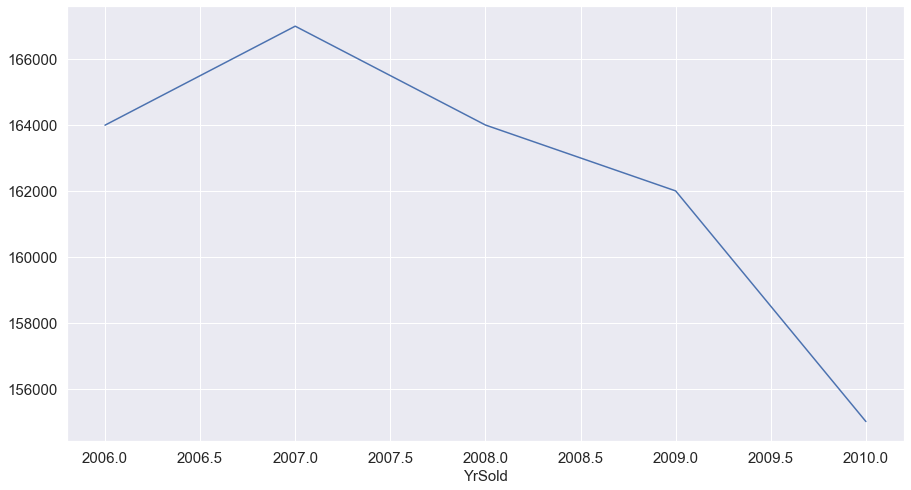

In [14]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.show()

### Sales Price is decreasing as year increases

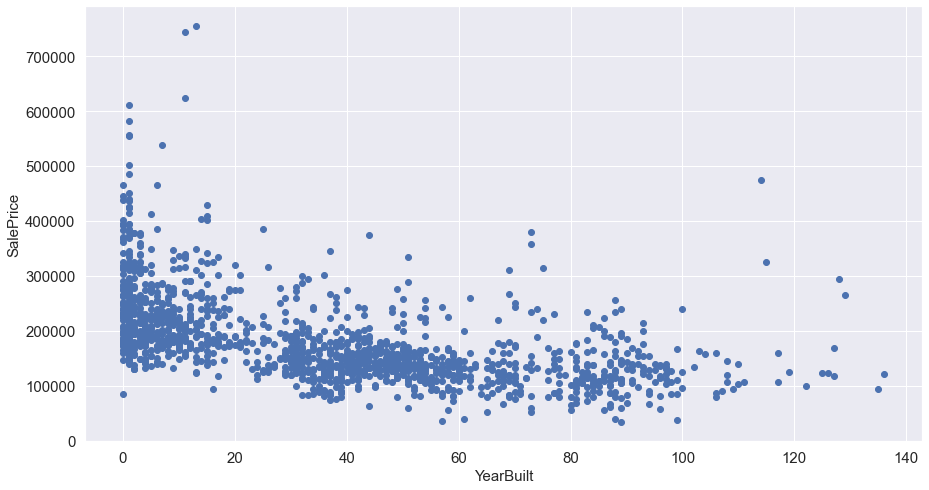

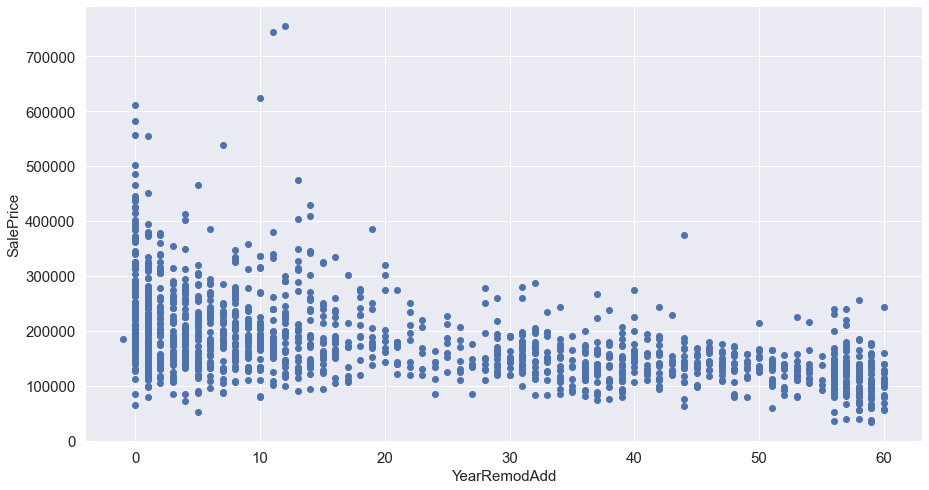

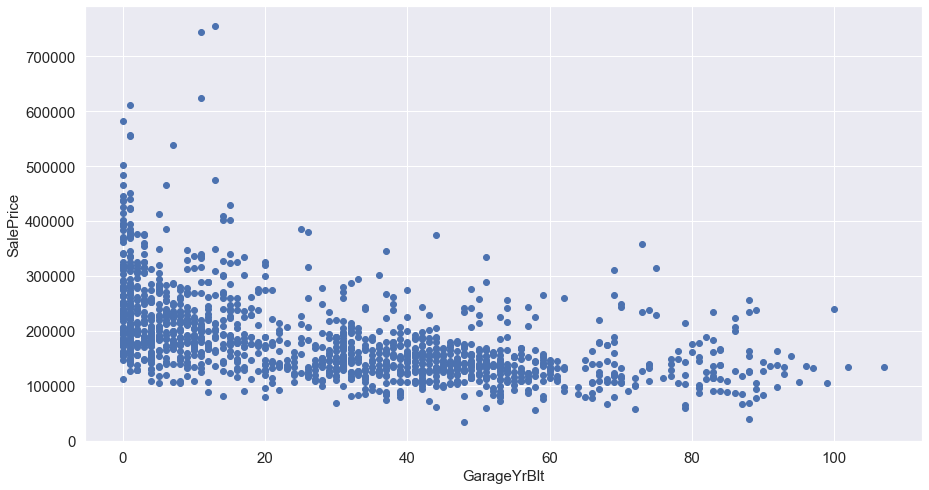

In [15]:
for feature in year_feature:
    if feature != 'YrSold':
        data=train.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [16]:
train[numerical_features].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [17]:
discreate_feature = [feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']] 
print(f'Number of Discreate Features: {len(discreate_feature)}')
train[discreate_feature].head() 

Number of Discreate Features: 17


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

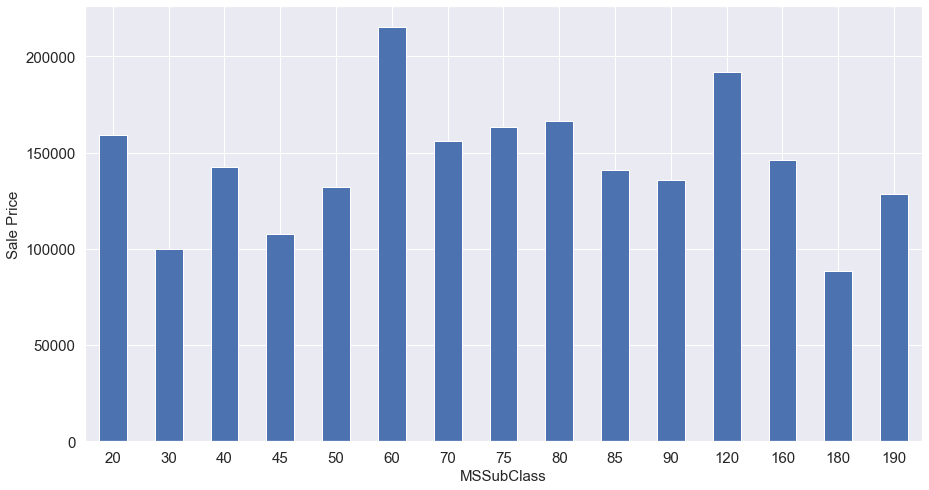

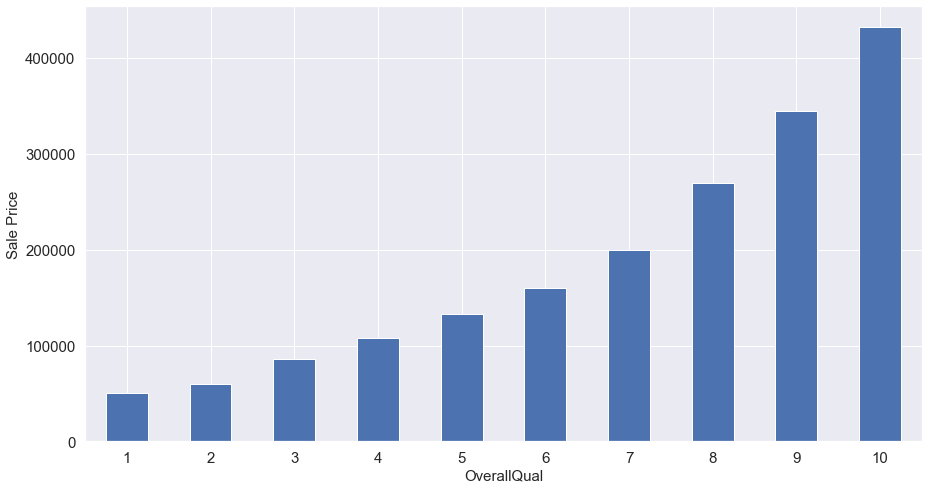

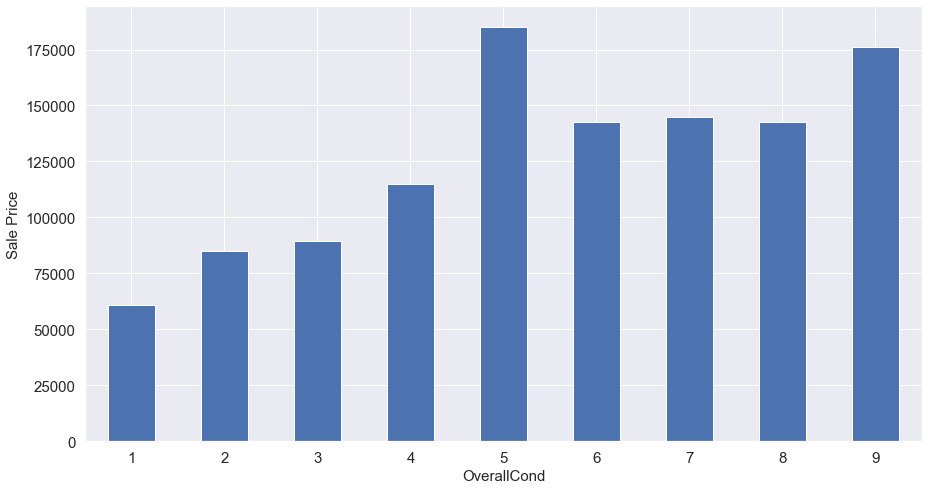

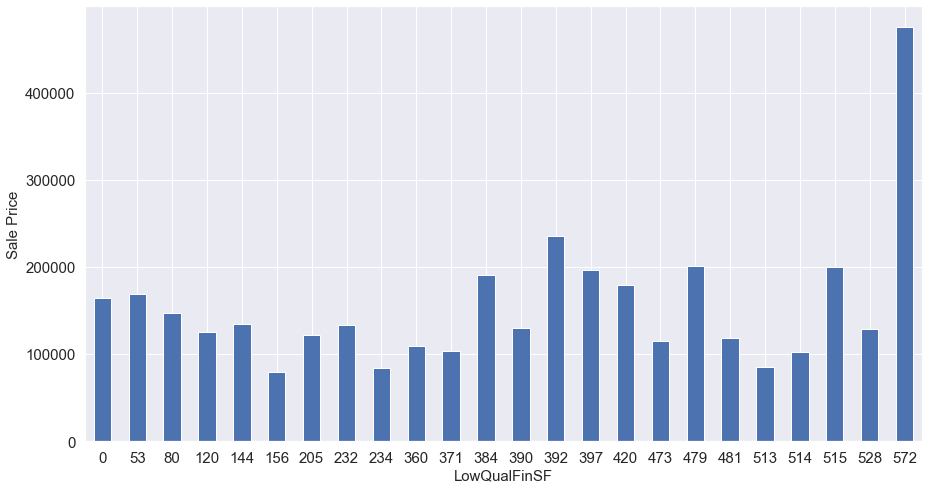

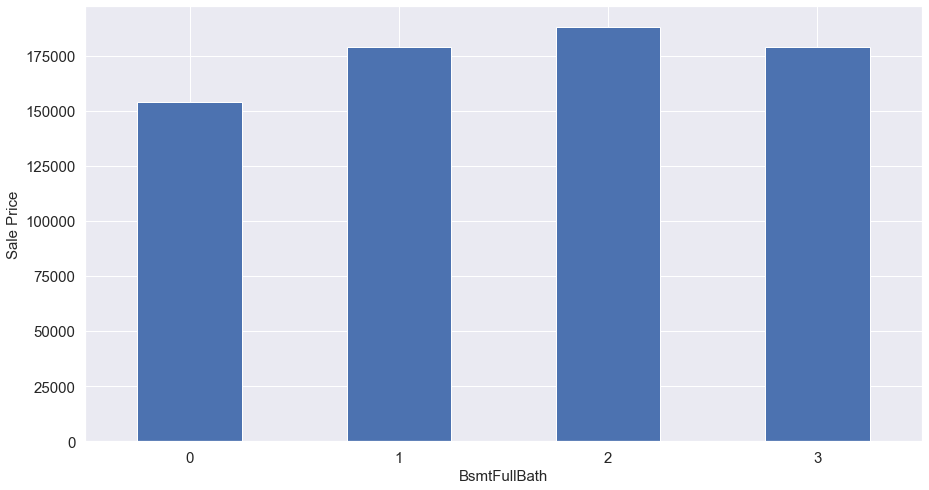

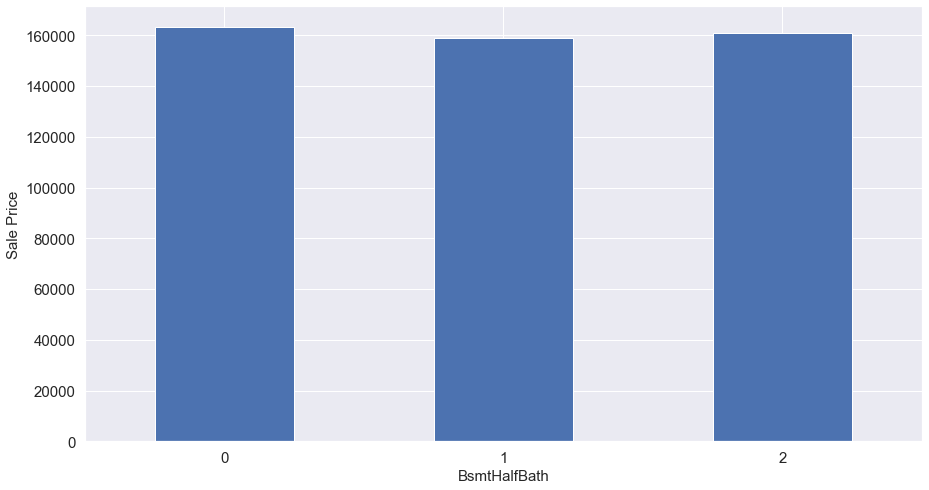

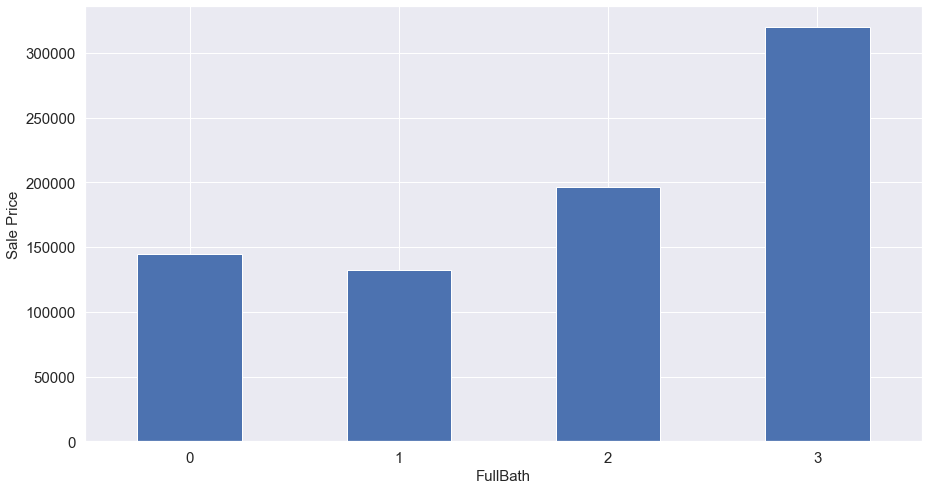

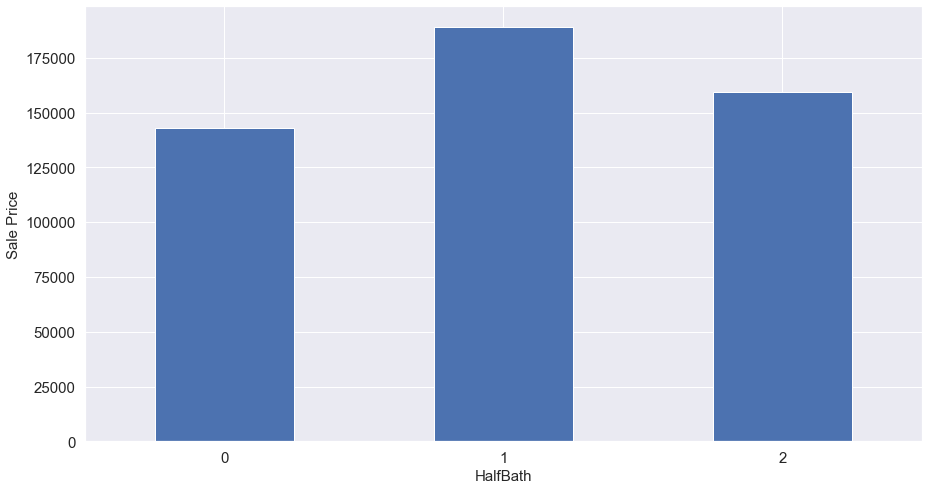

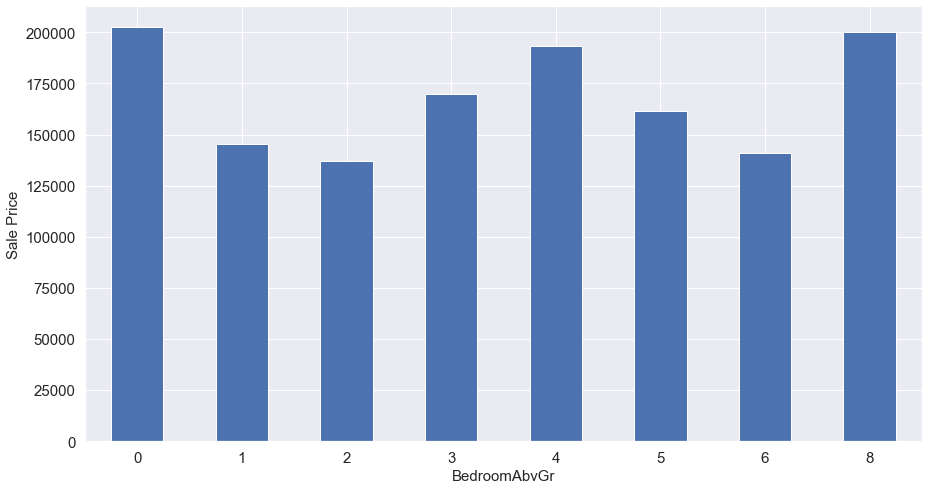

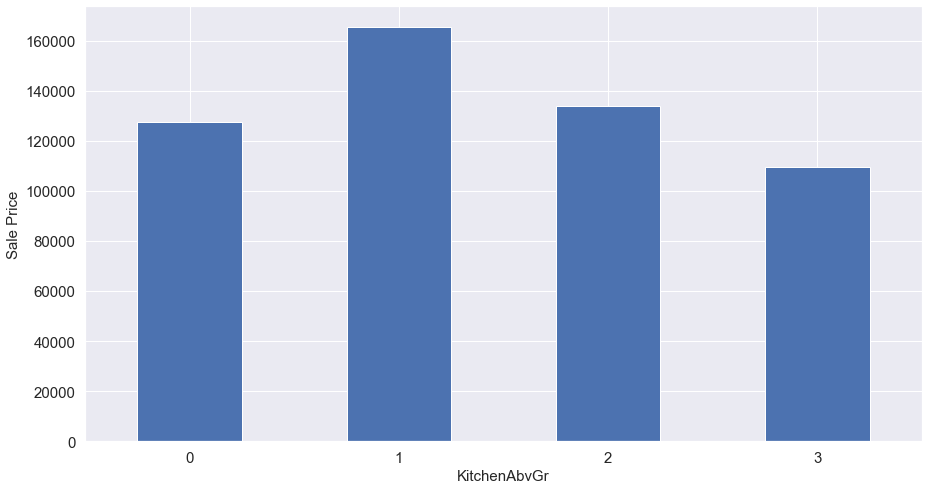

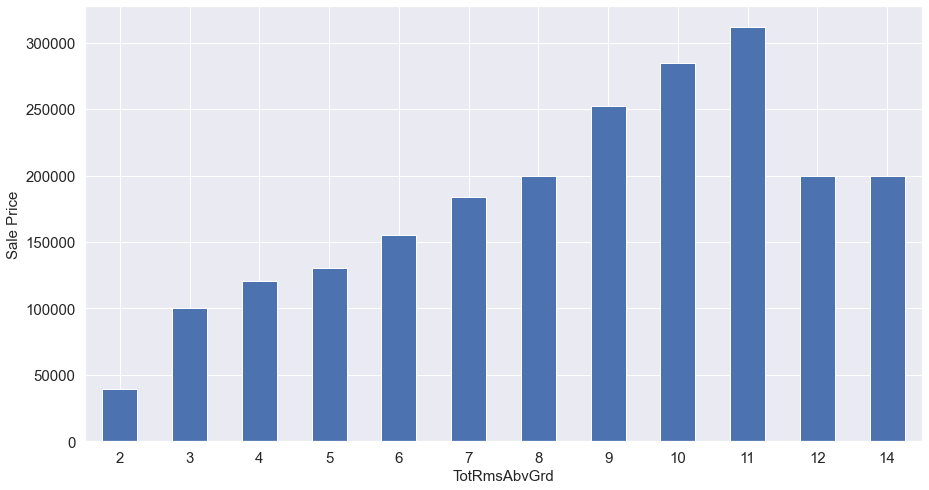

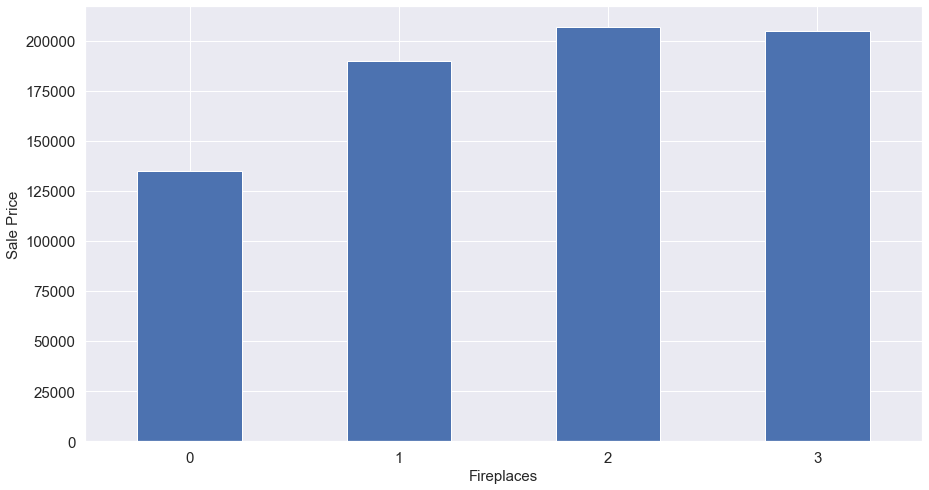

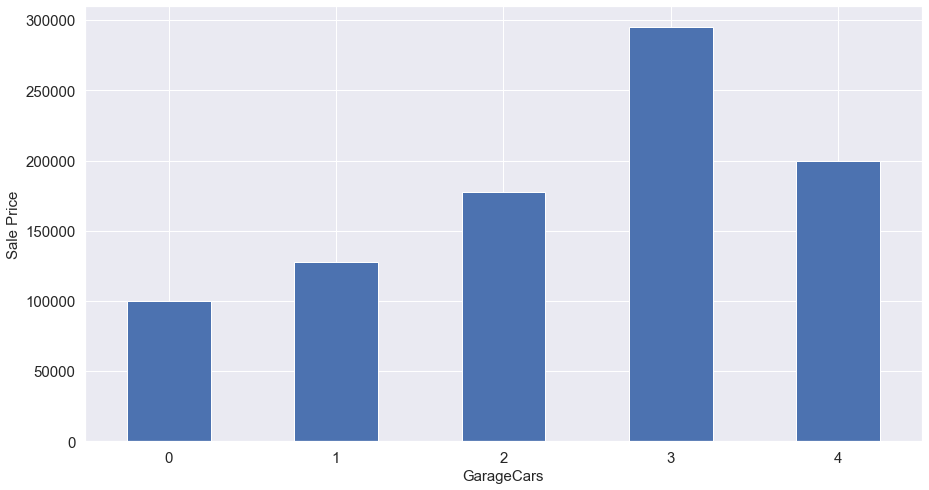

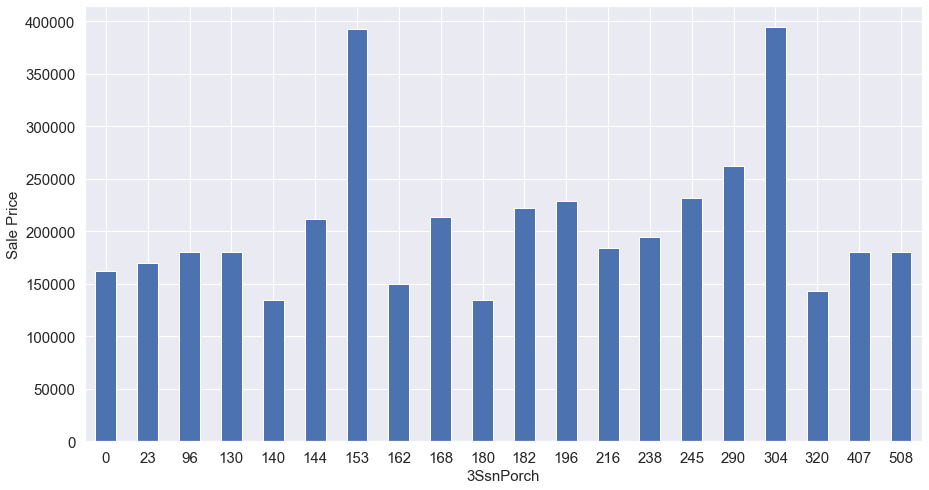

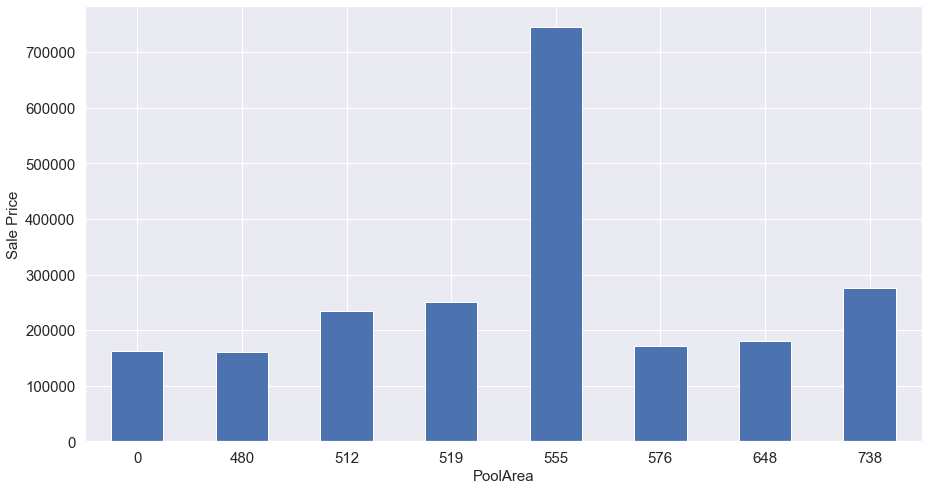

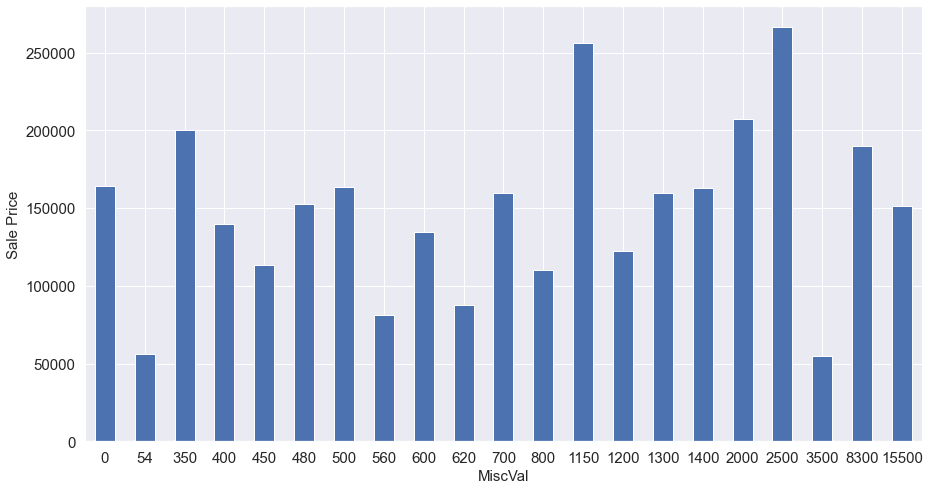

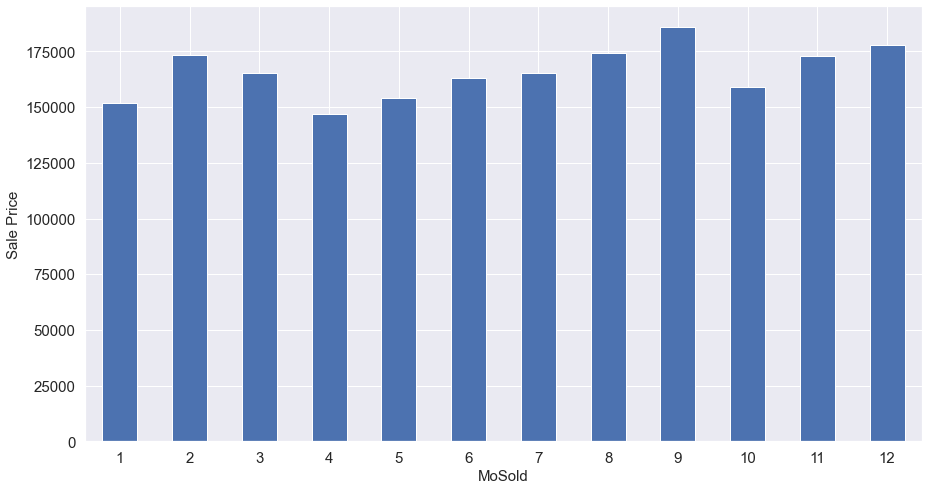

In [18]:
for feature in discreate_feature:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('Sale Price')
    plt.xticks(rotation=0)
    plt.show()

In [19]:
contineous_feature = [feature for feature in numerical_features if feature not in discreate_feature+year_feature+['Id']]
print(f'Number of Contineous Feature:{len(contineous_feature)}')
train[contineous_feature].head()

Number of Contineous Feature:16


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

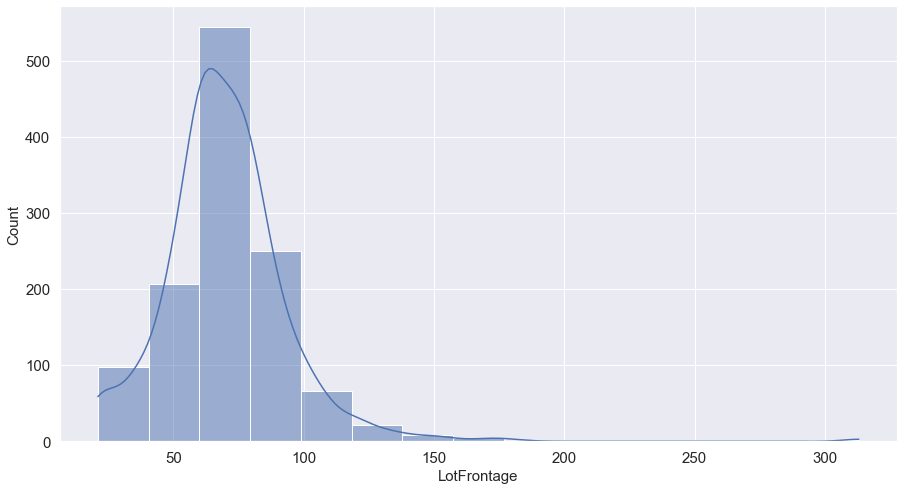

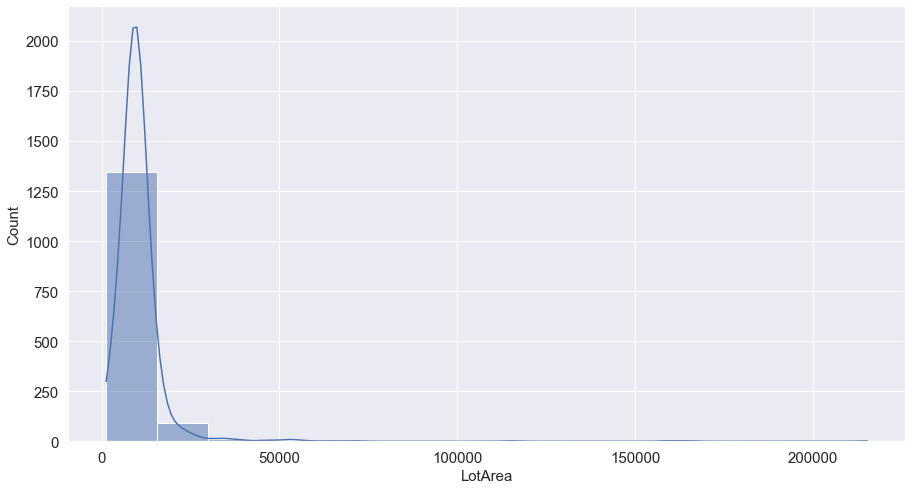

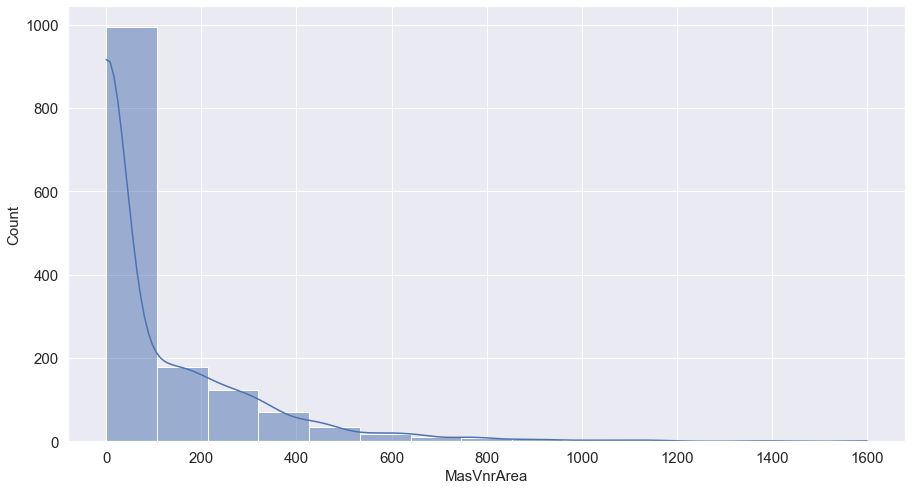

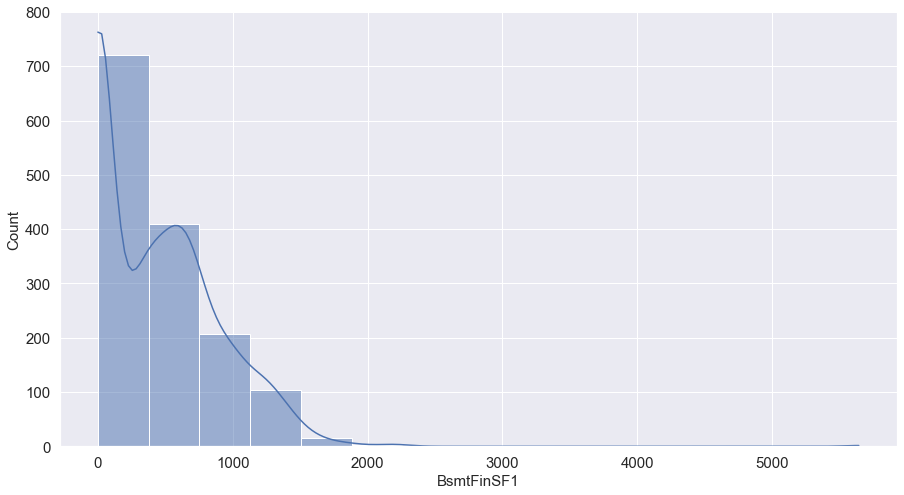

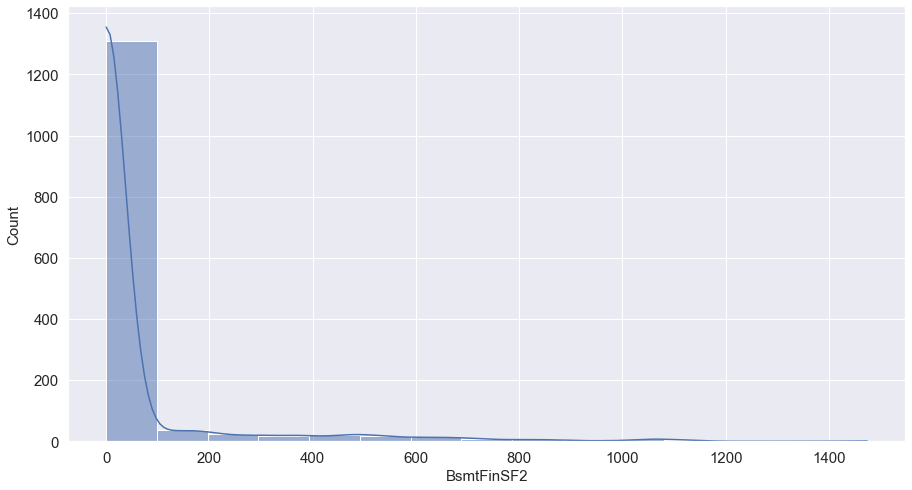

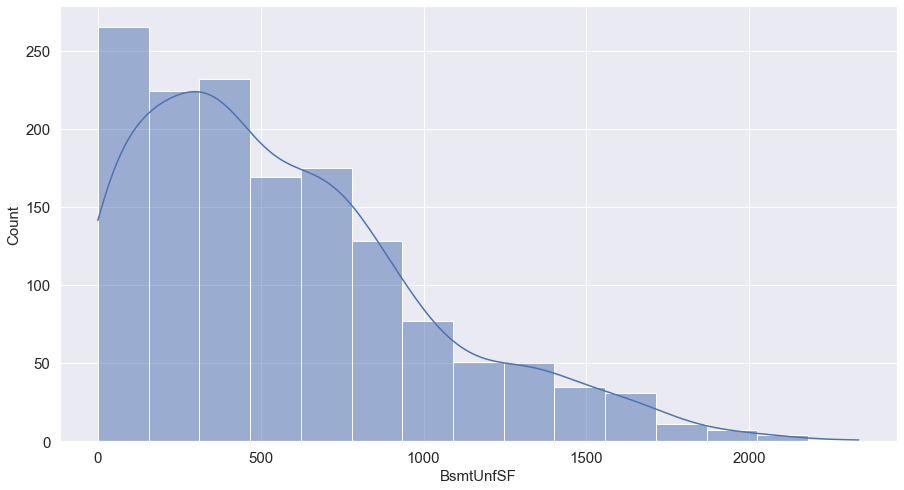

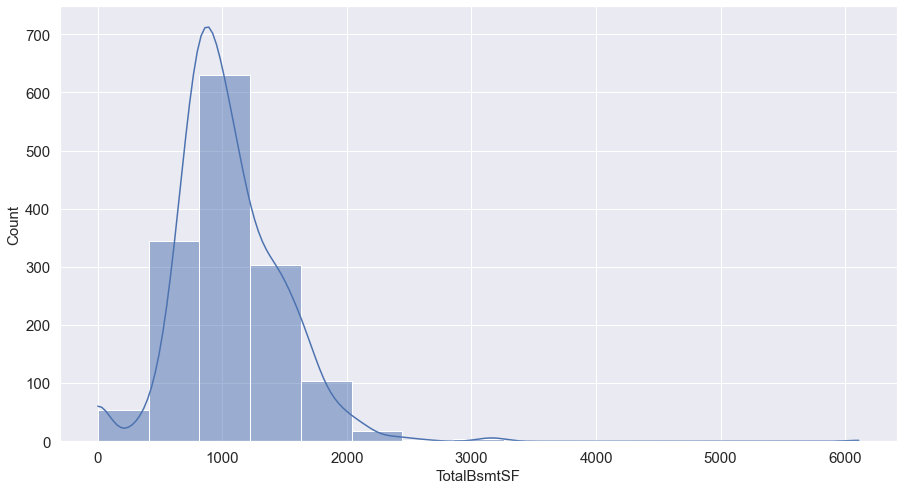

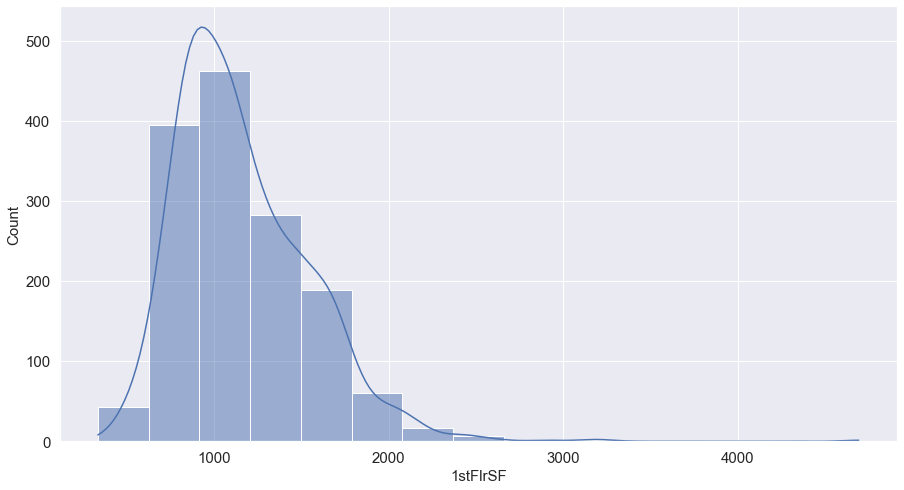

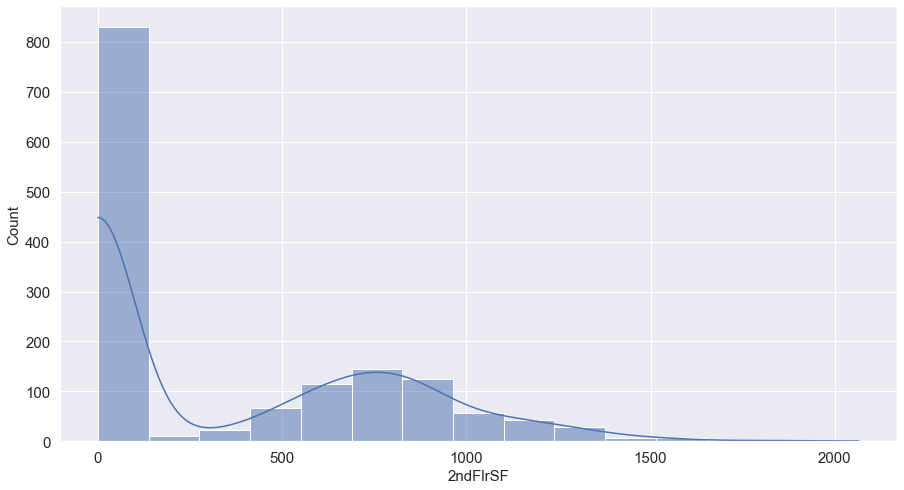

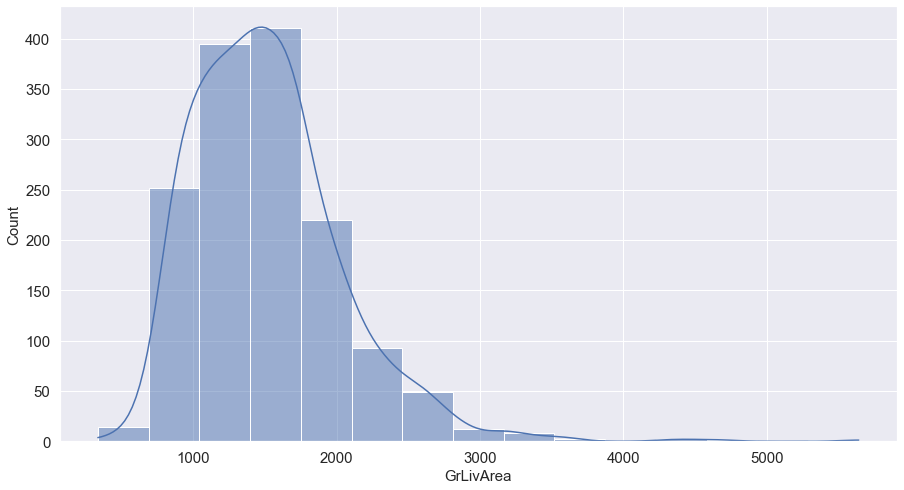

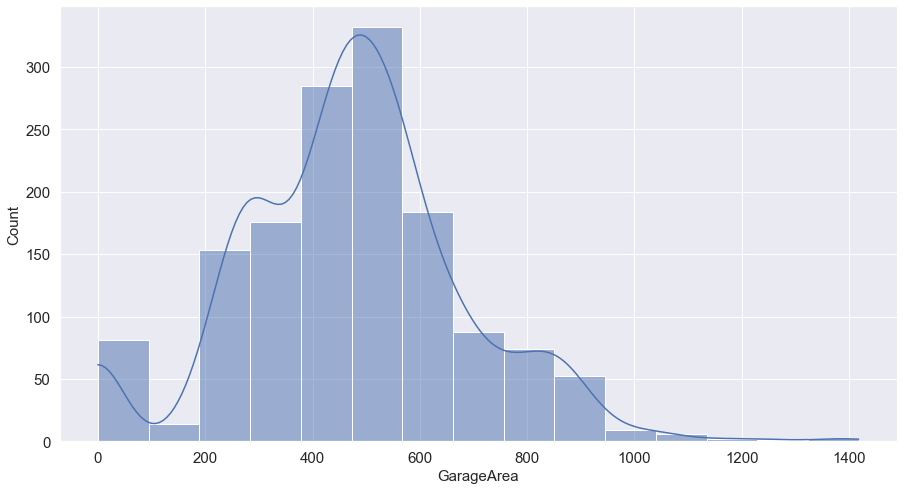

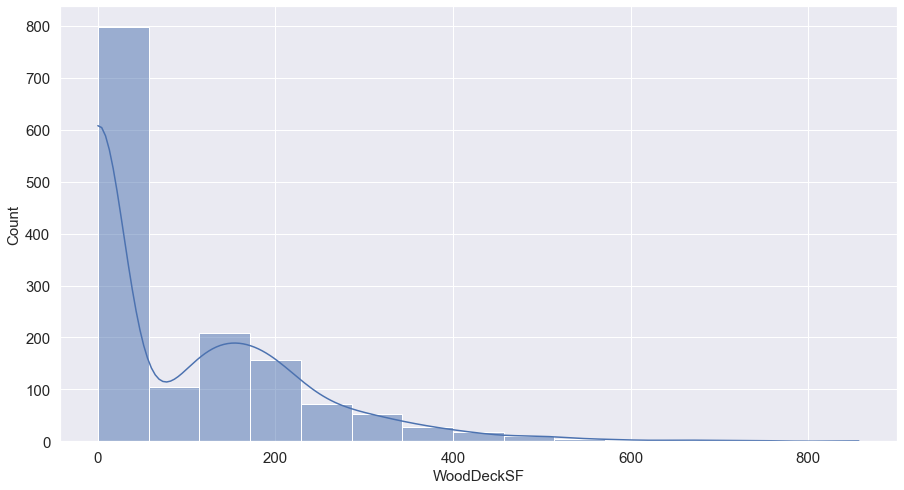

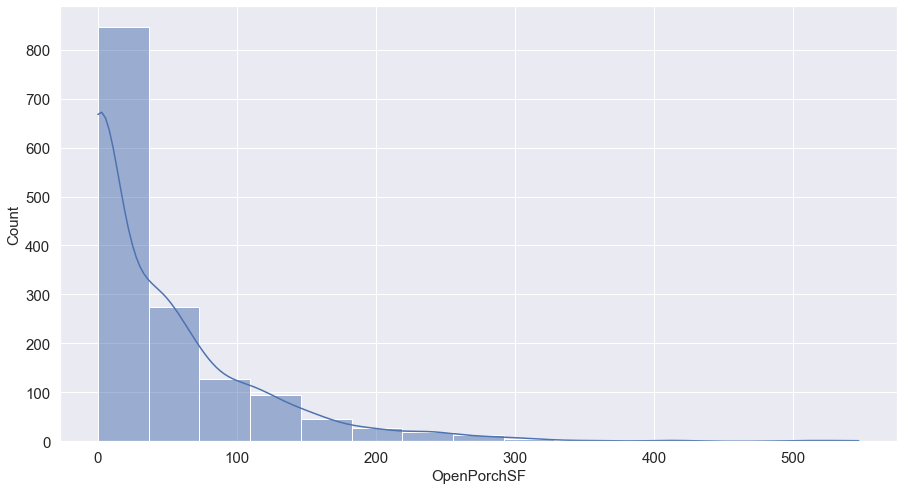

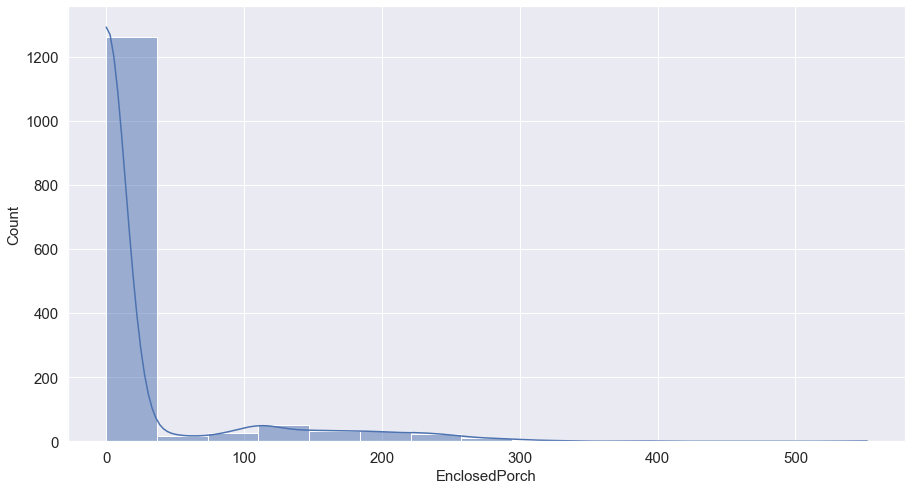

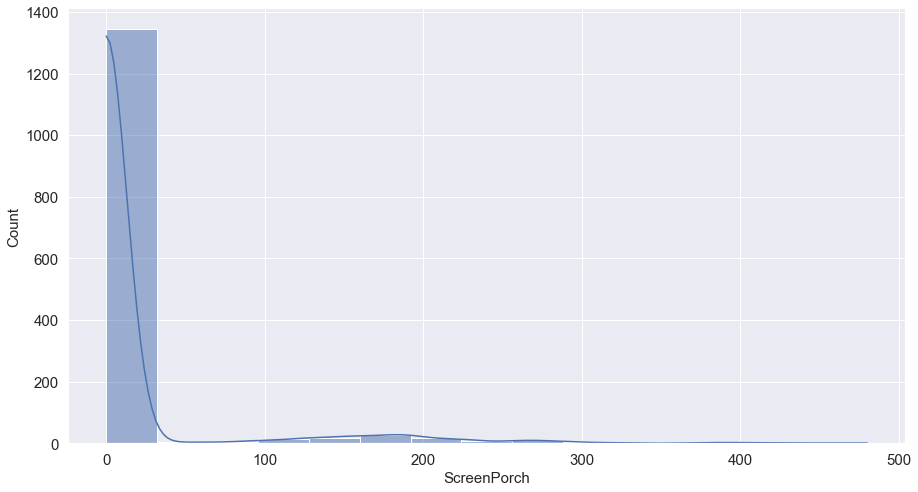

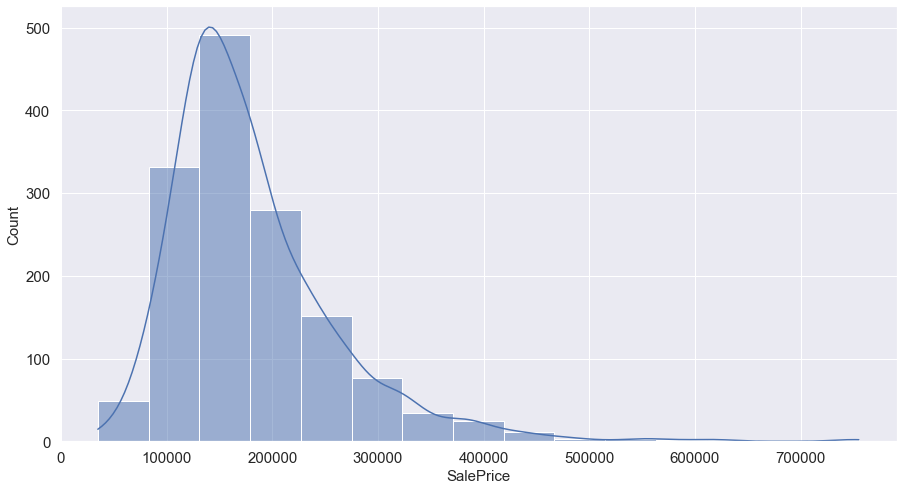

In [20]:
for feature in contineous_feature:
    data= train.copy()
    sns.histplot(data=data, x=feature, bins=15, palette="magma", kde=True)
    plt.show()

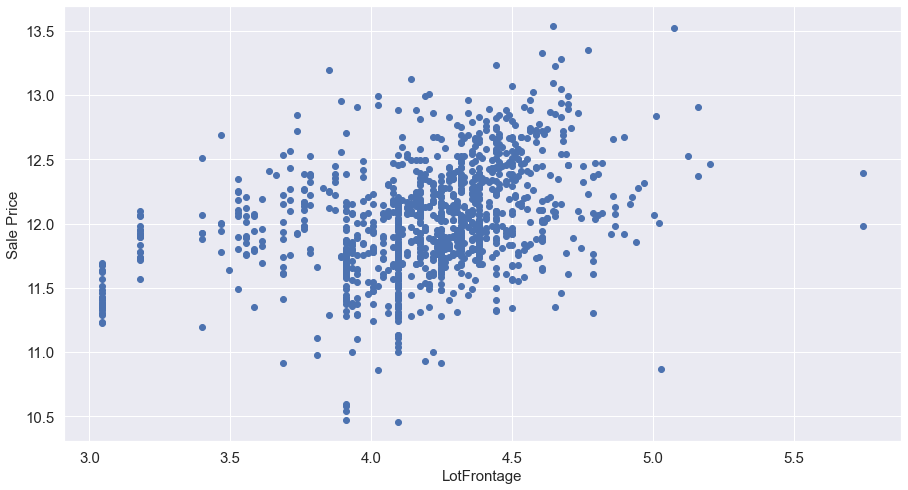

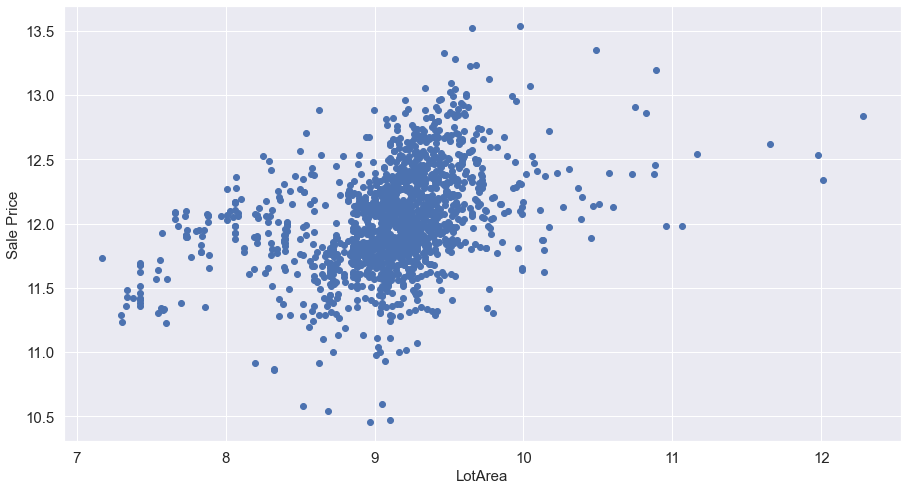

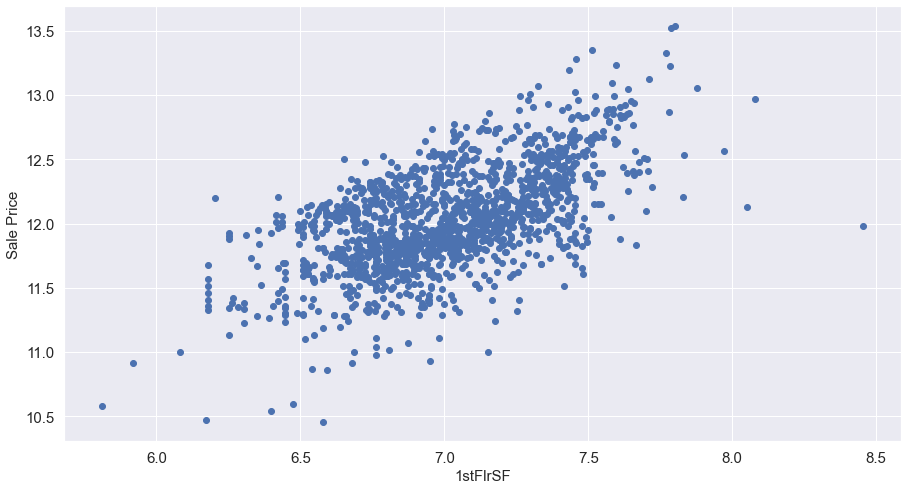

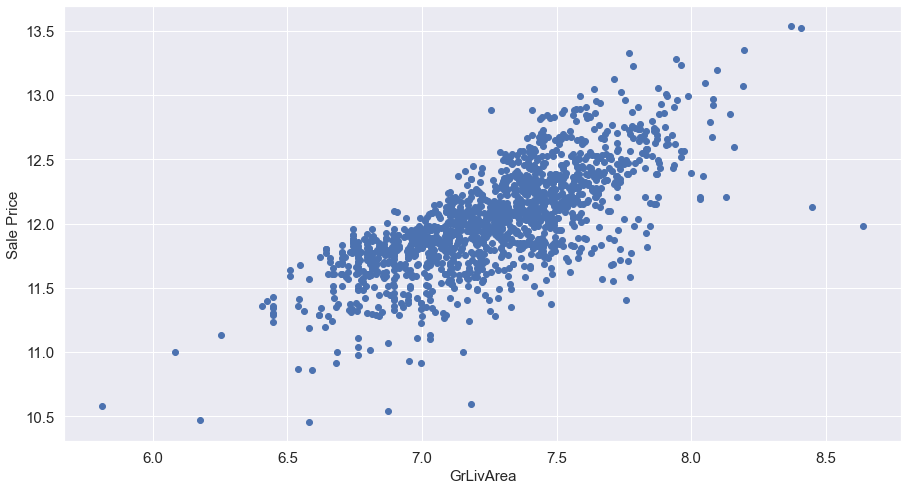

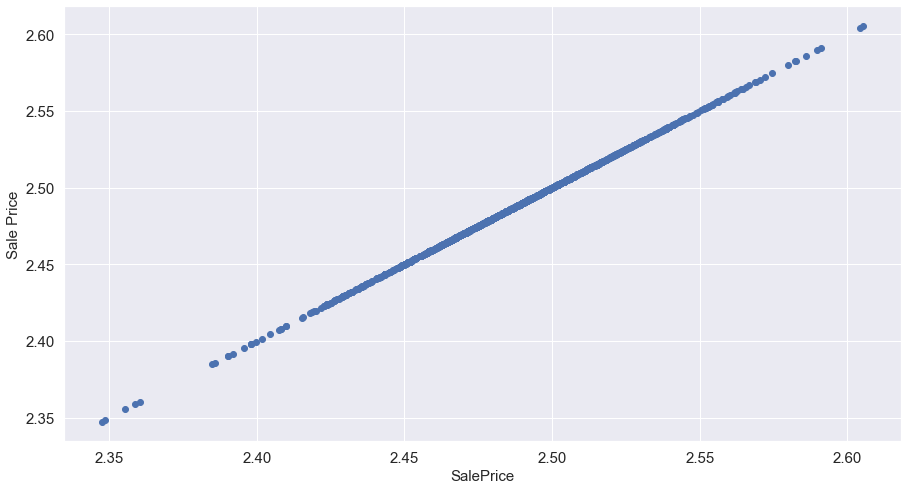

In [21]:
# logrithmic transformation
for feature in contineous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

### Checking Outliers

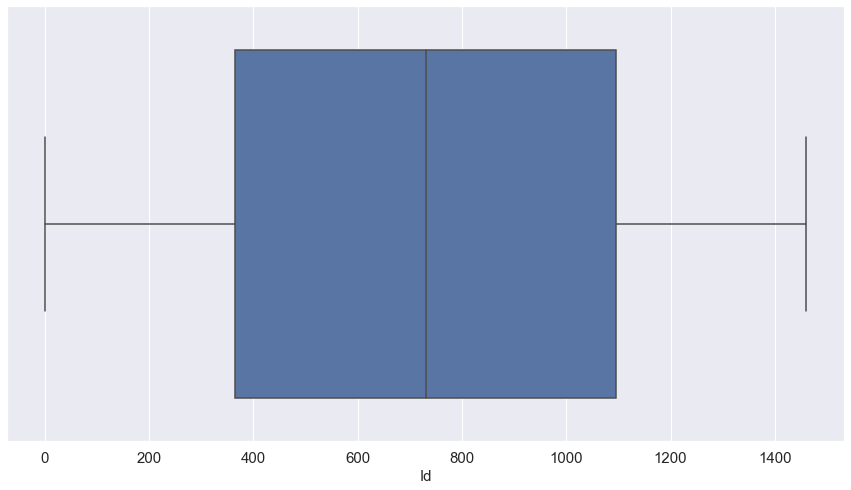

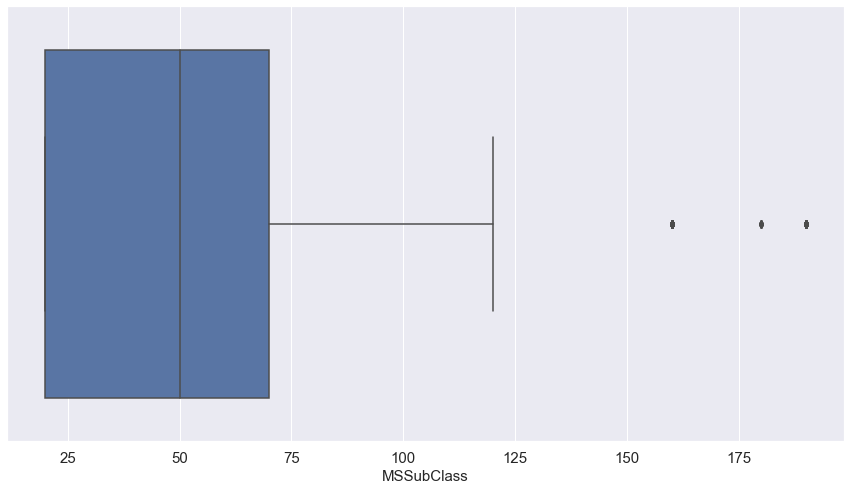

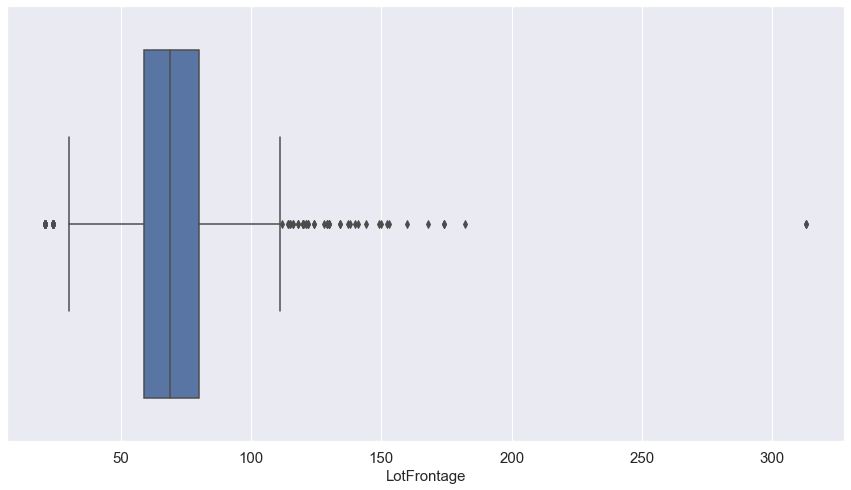

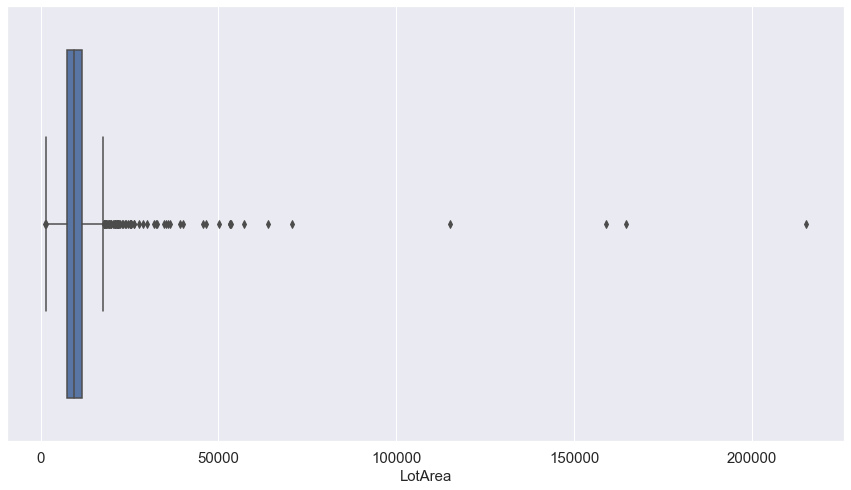

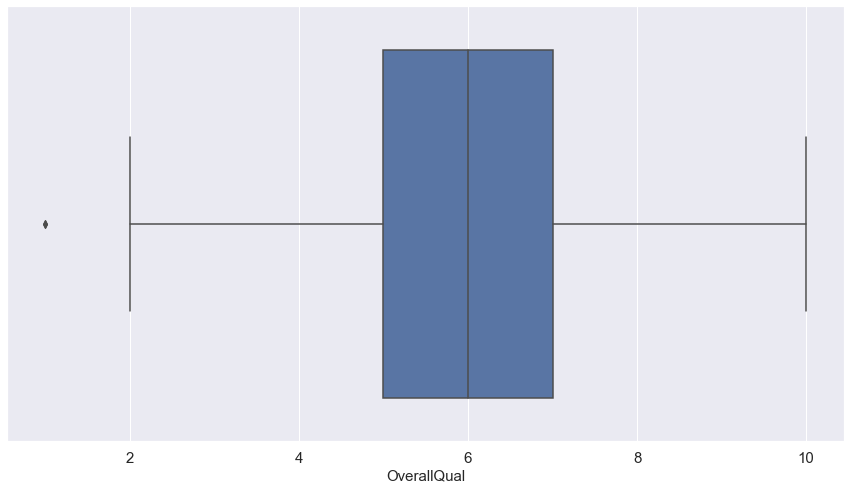

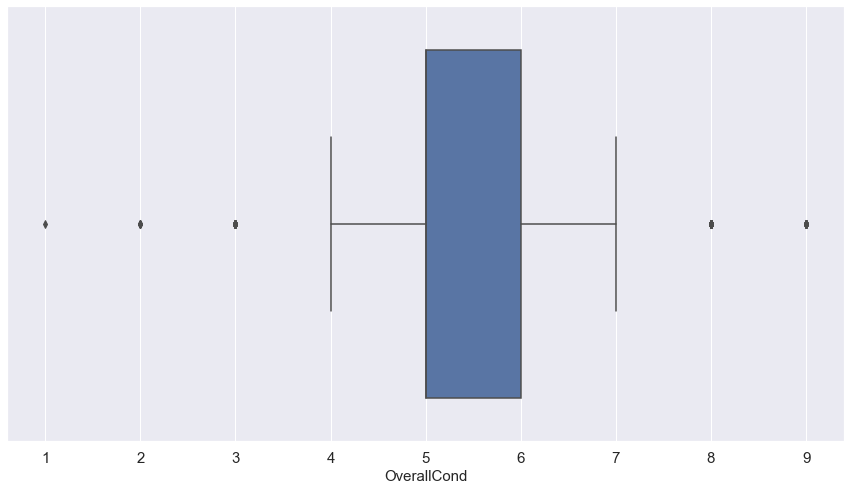

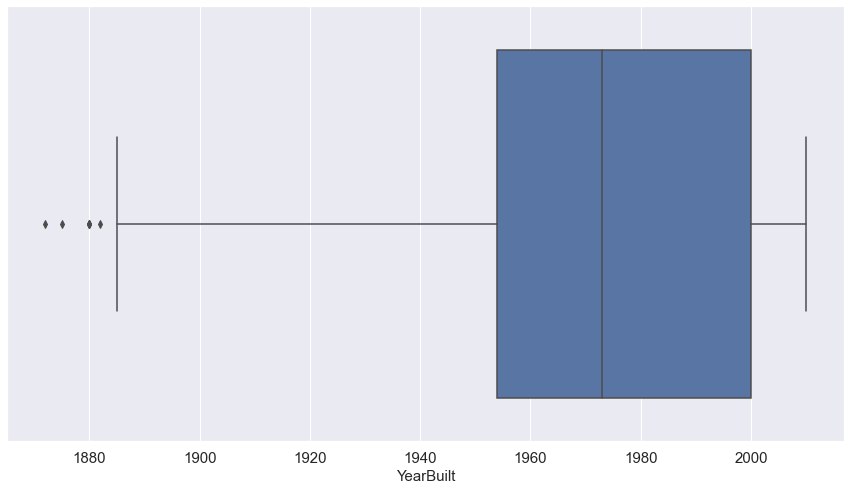

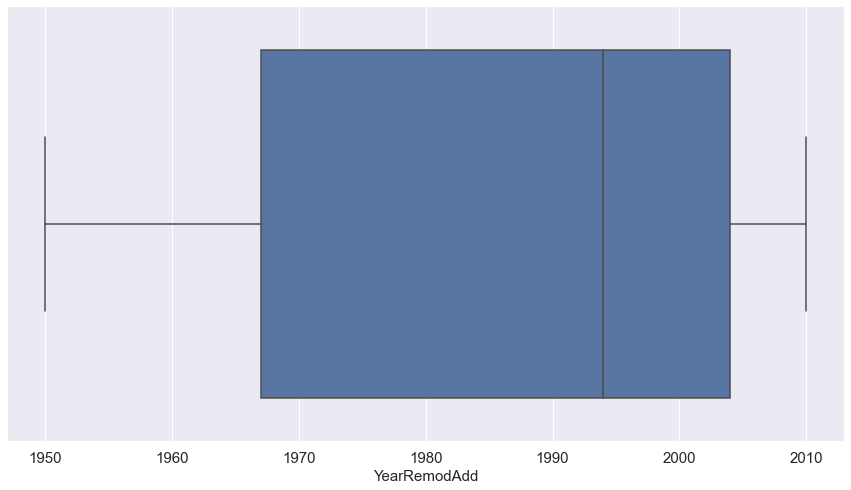

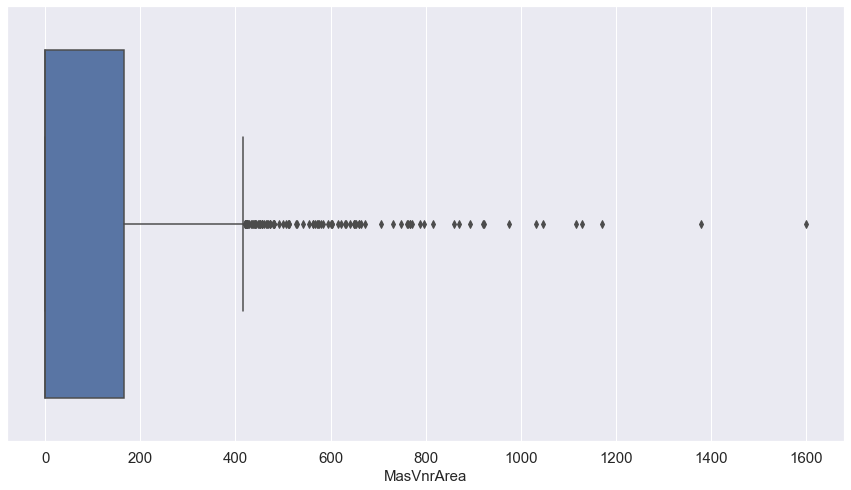

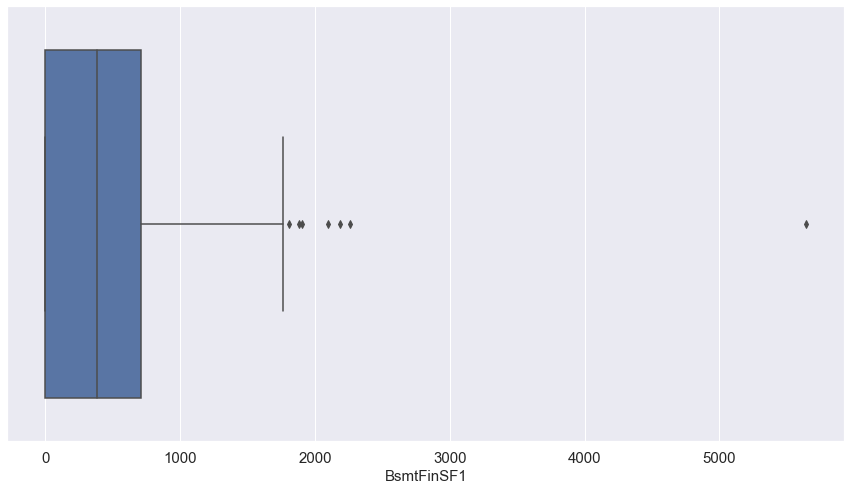

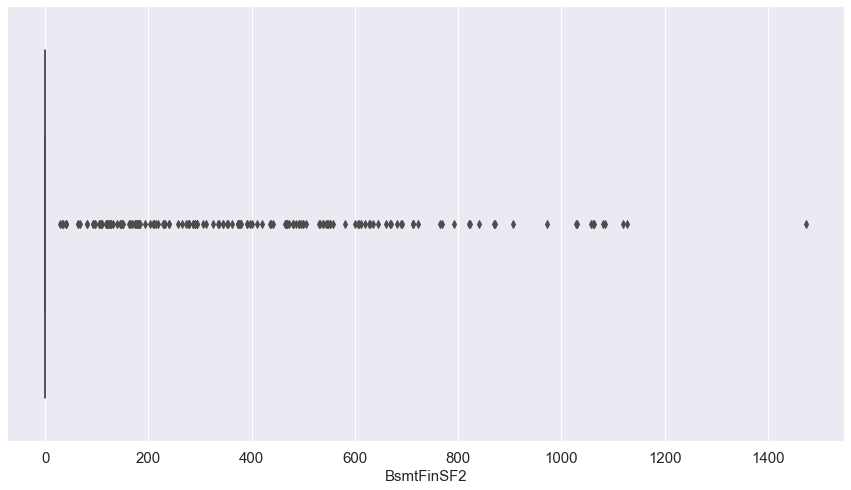

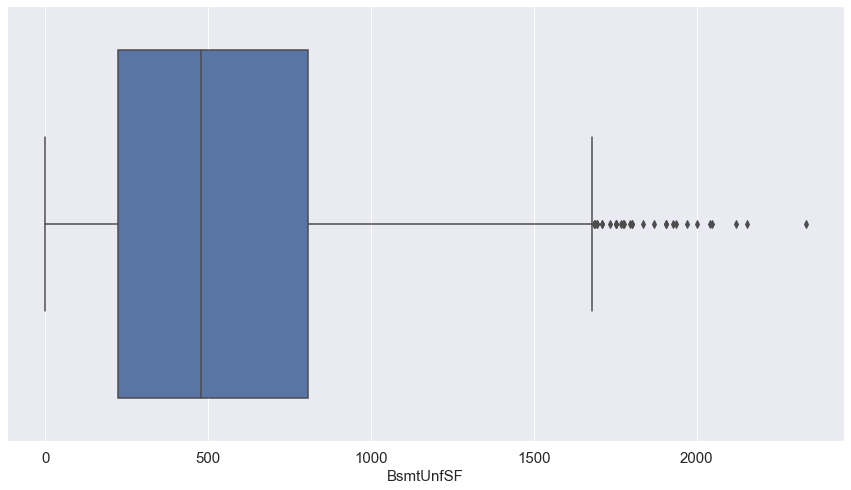

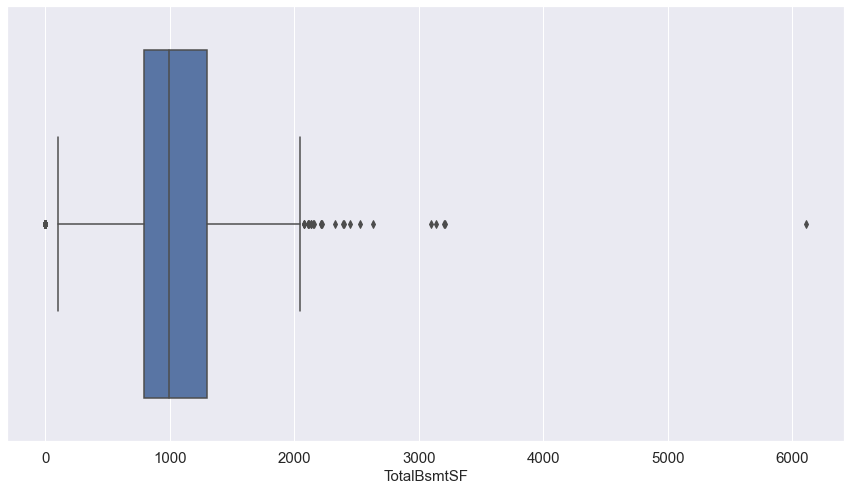

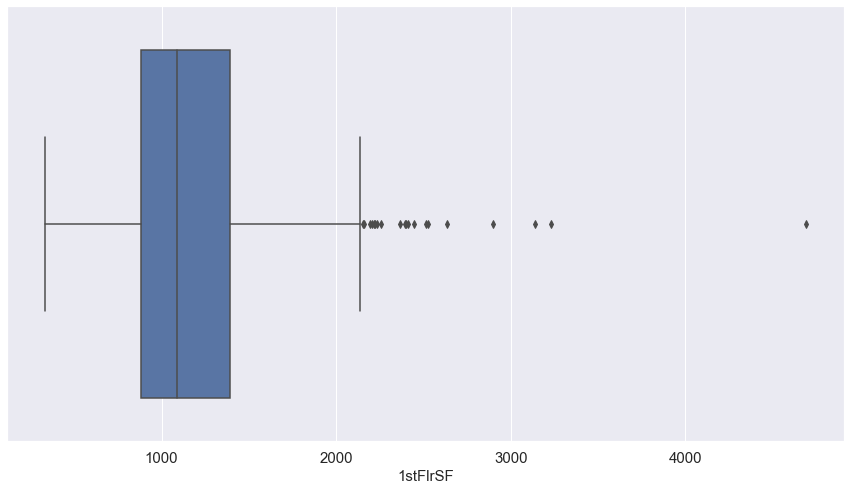

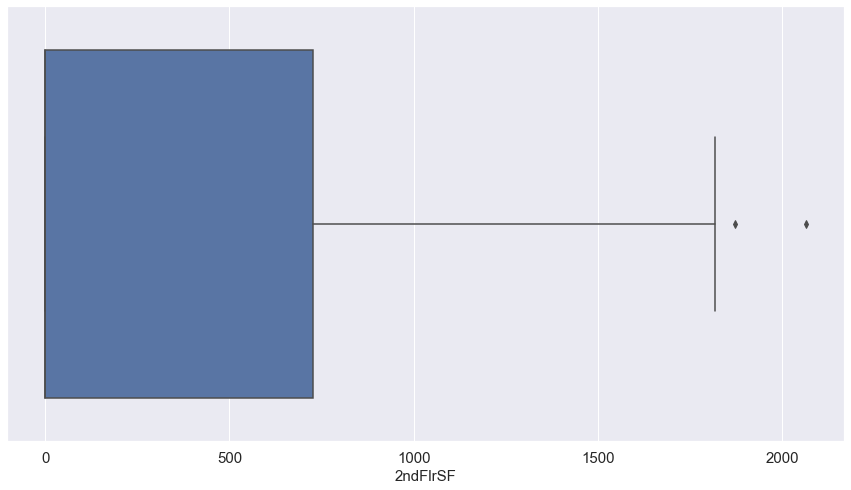

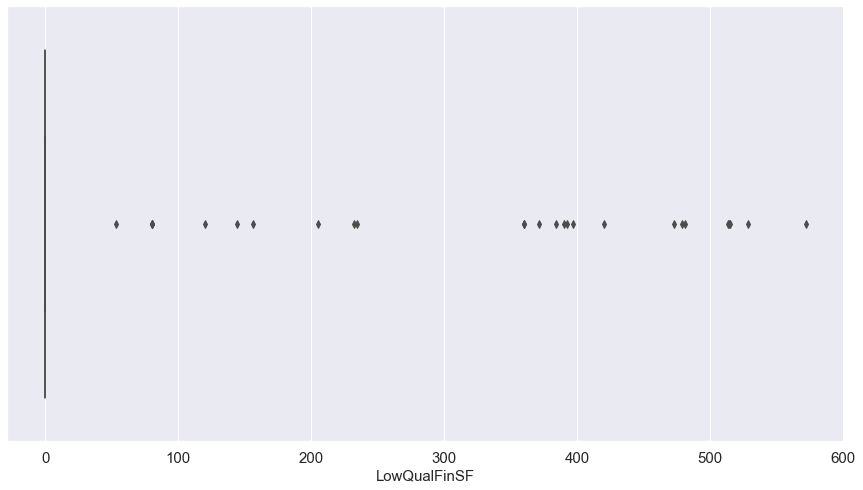

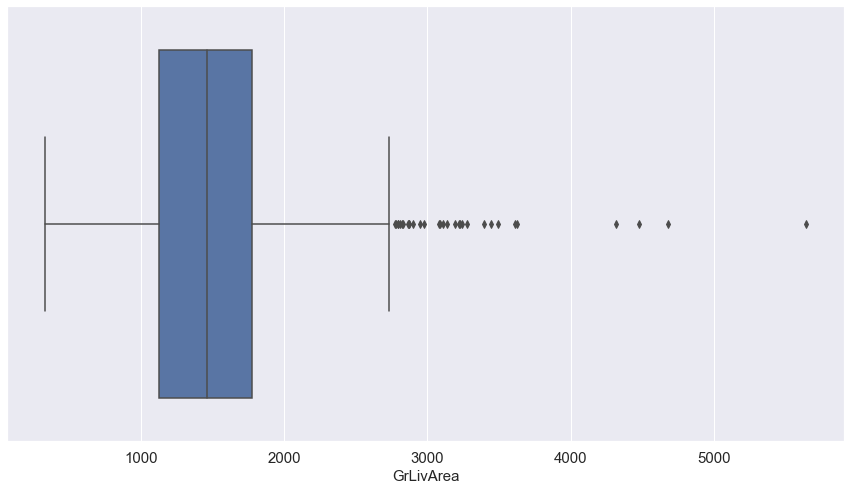

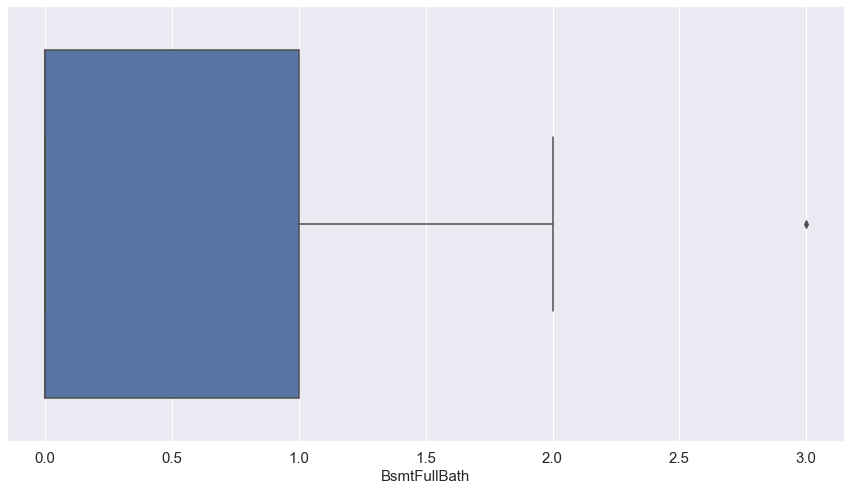

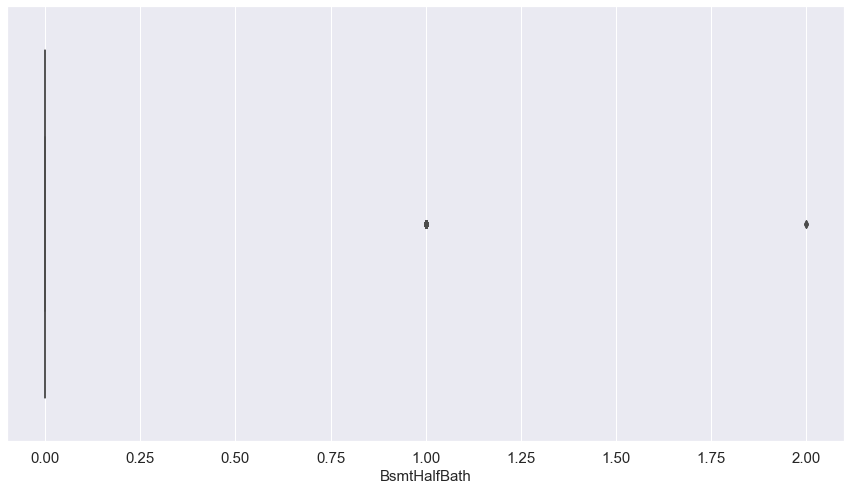

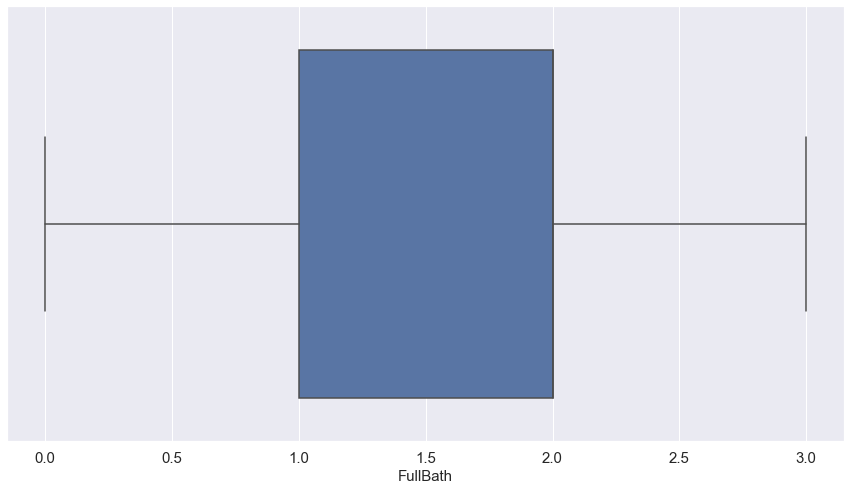

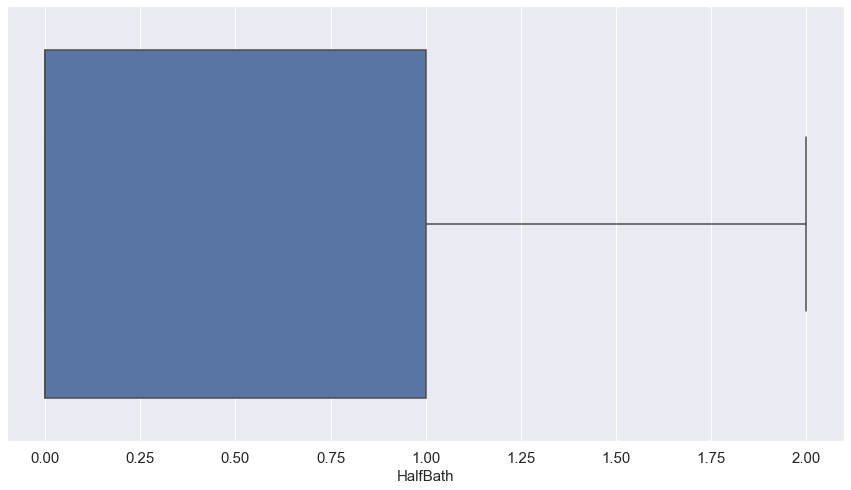

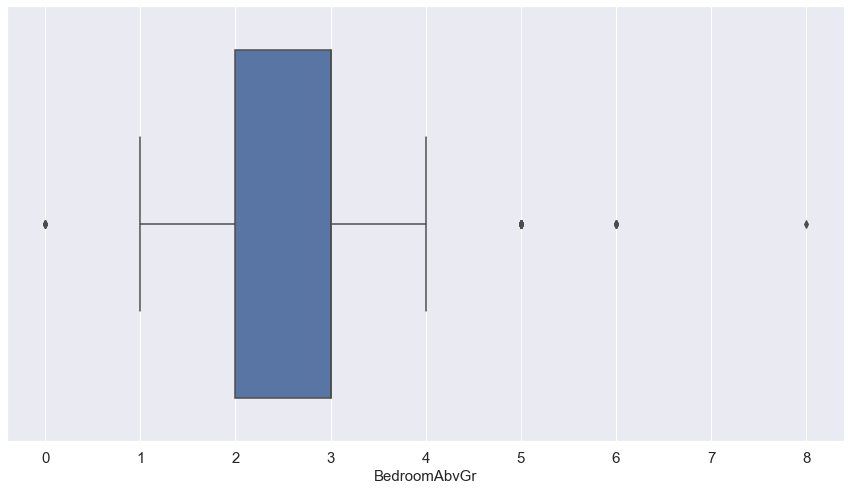

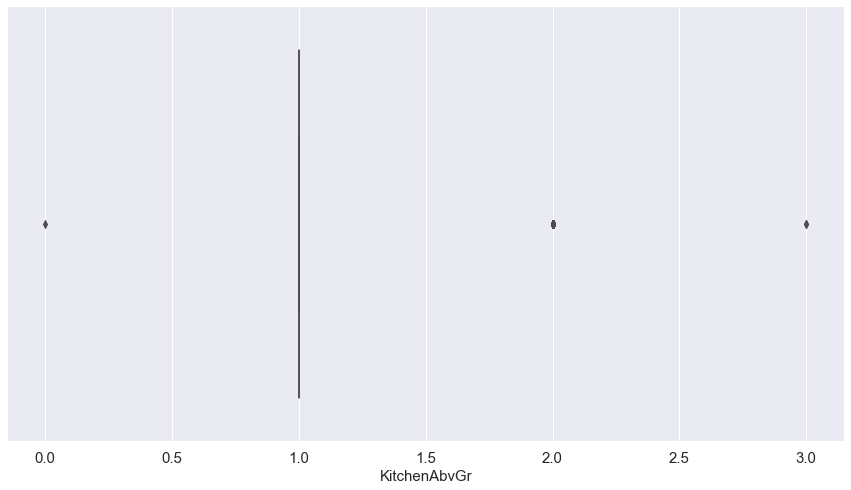

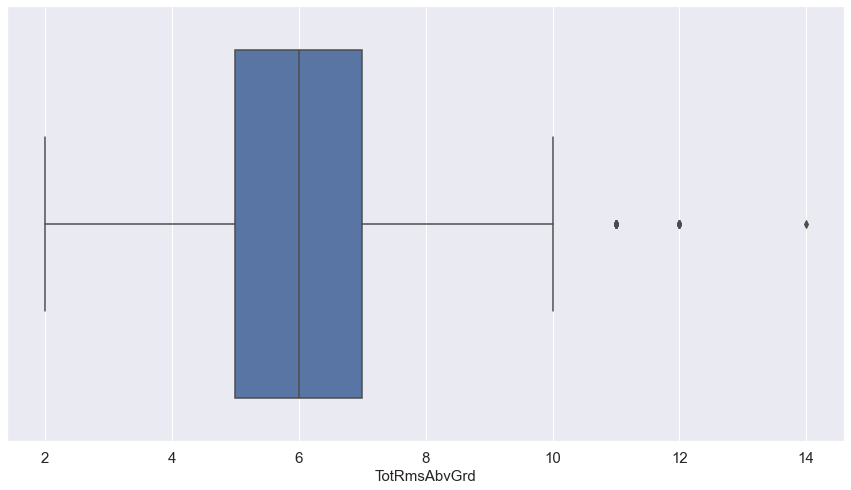

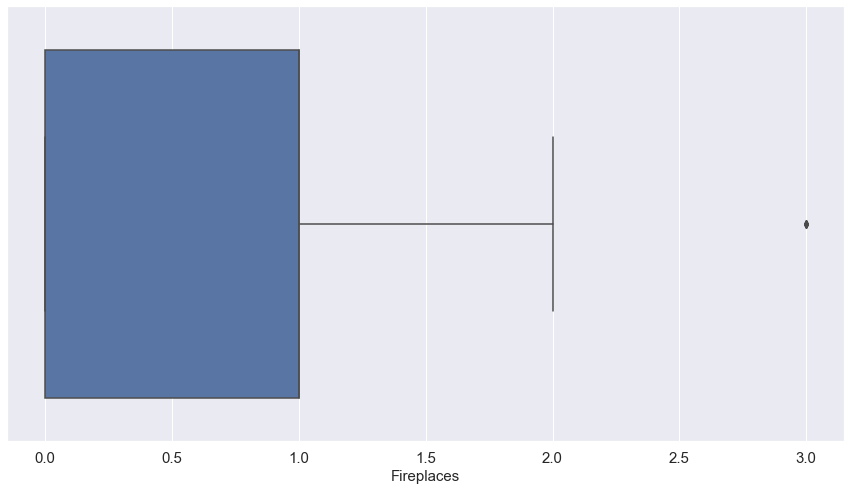

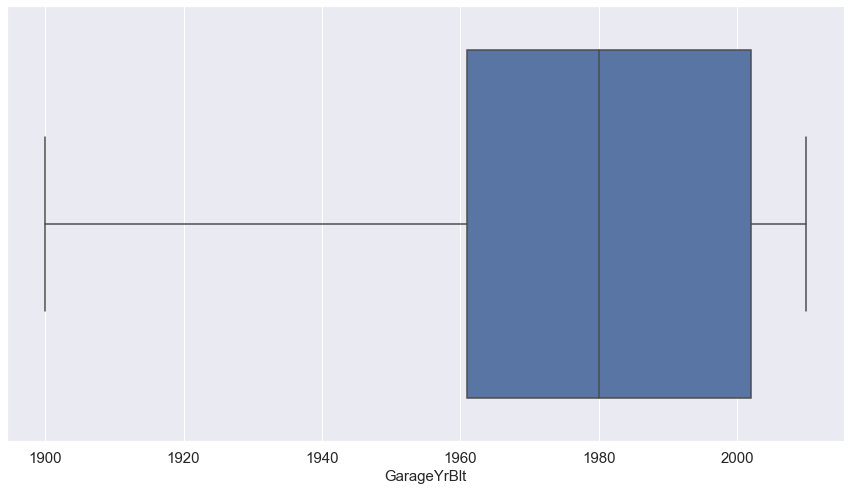

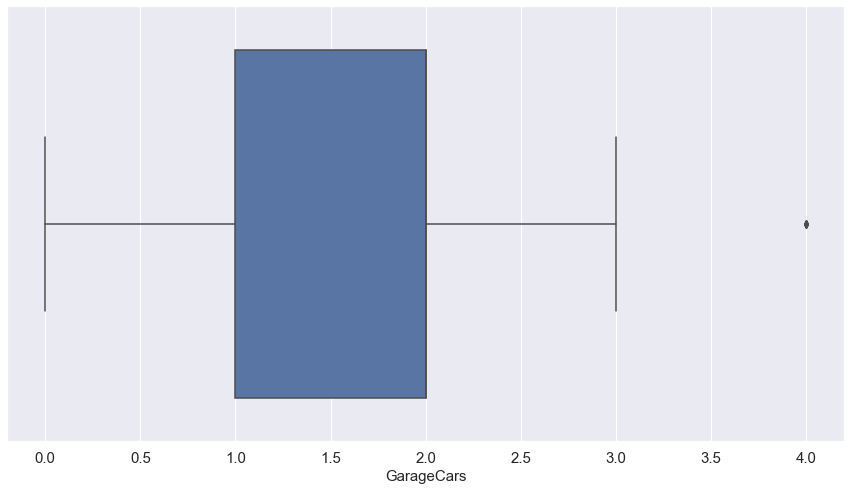

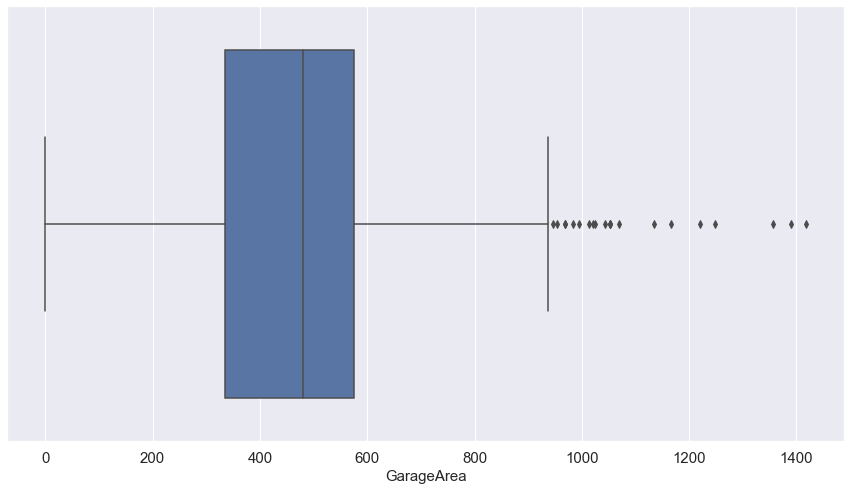

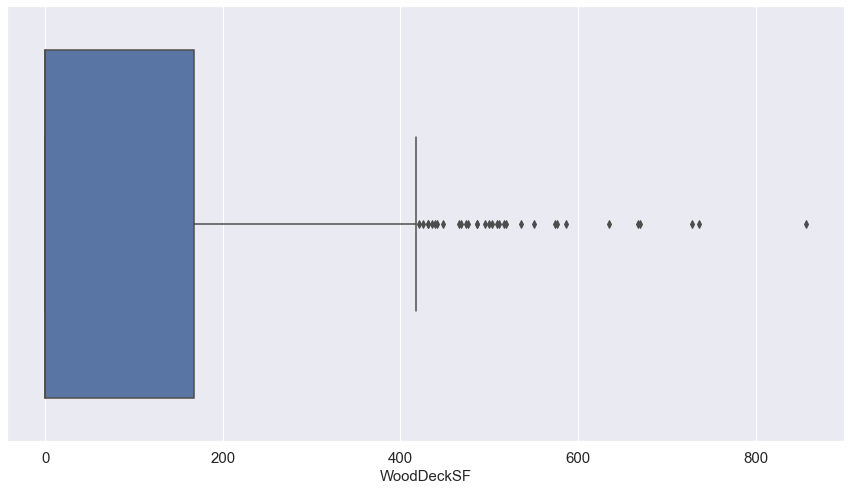

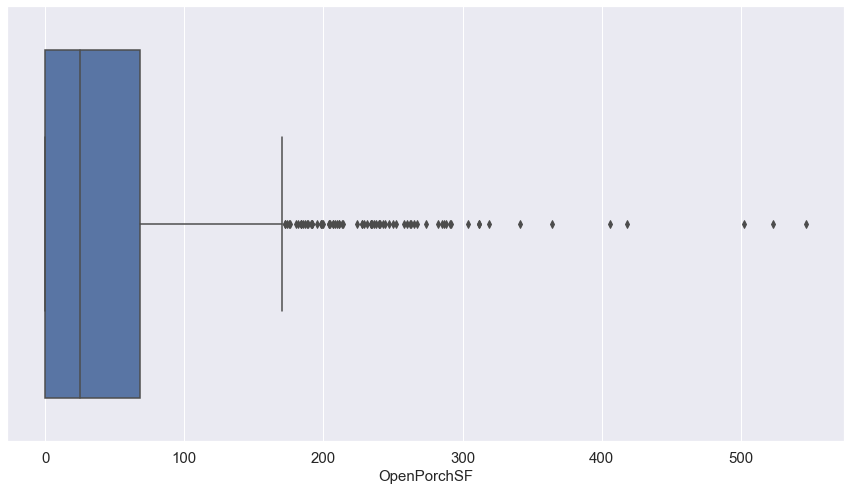

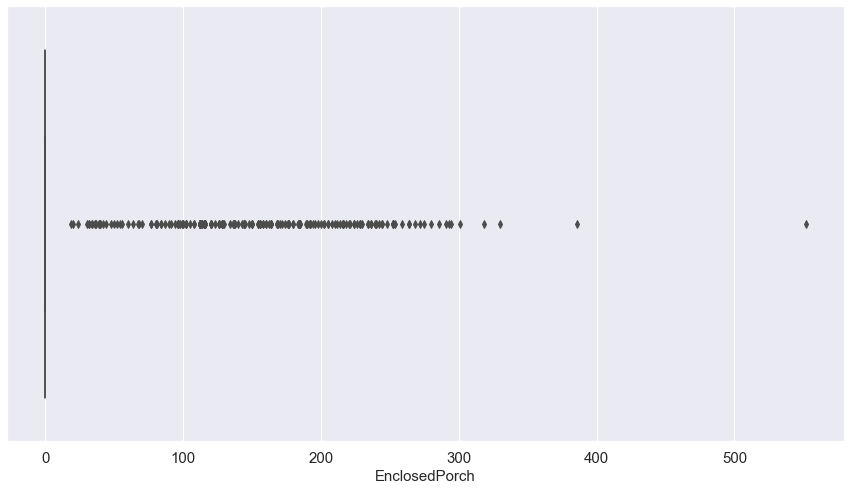

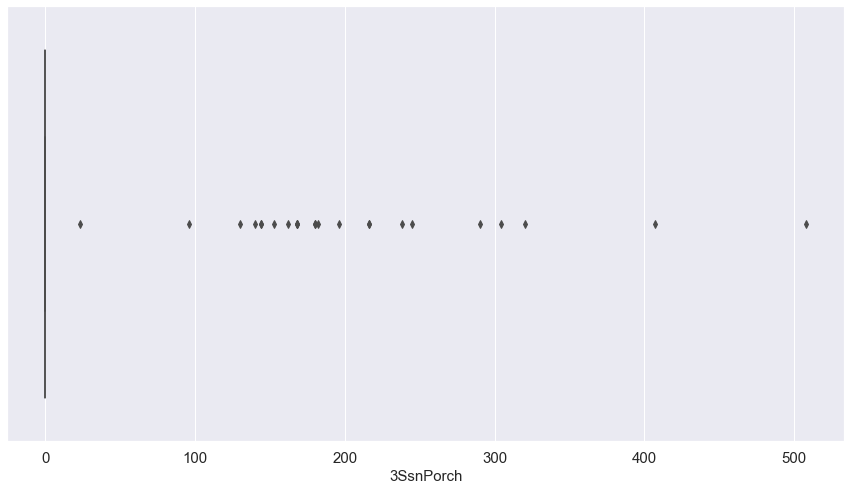

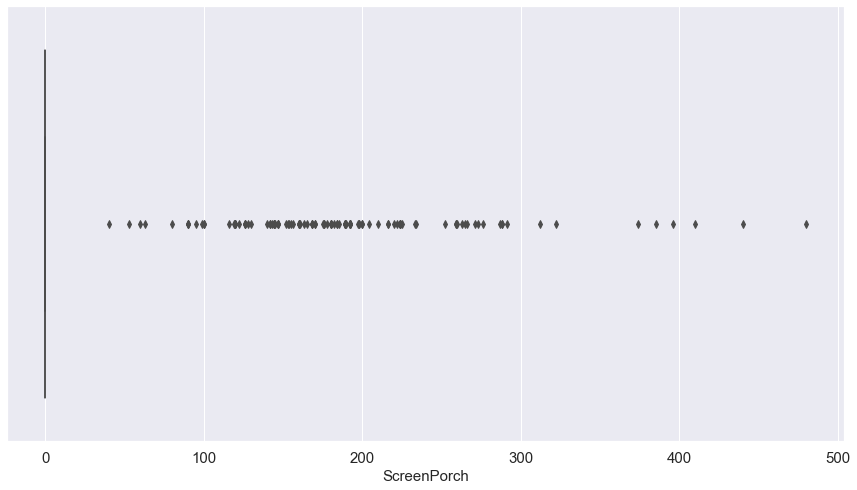

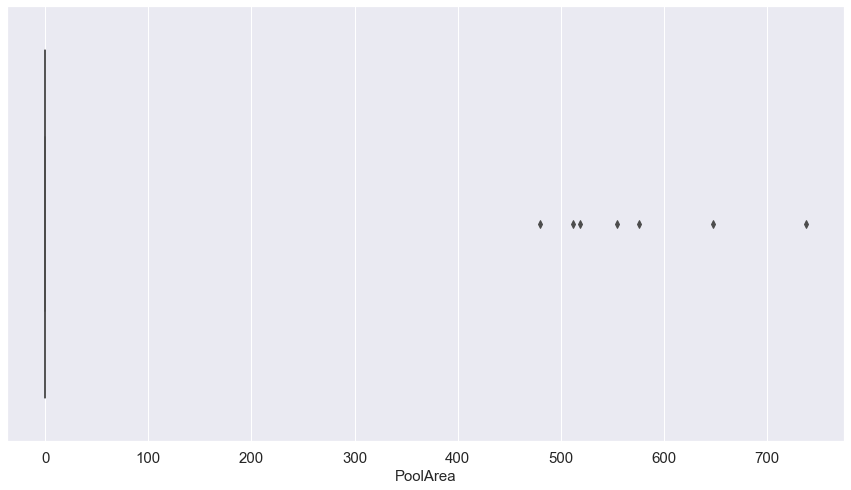

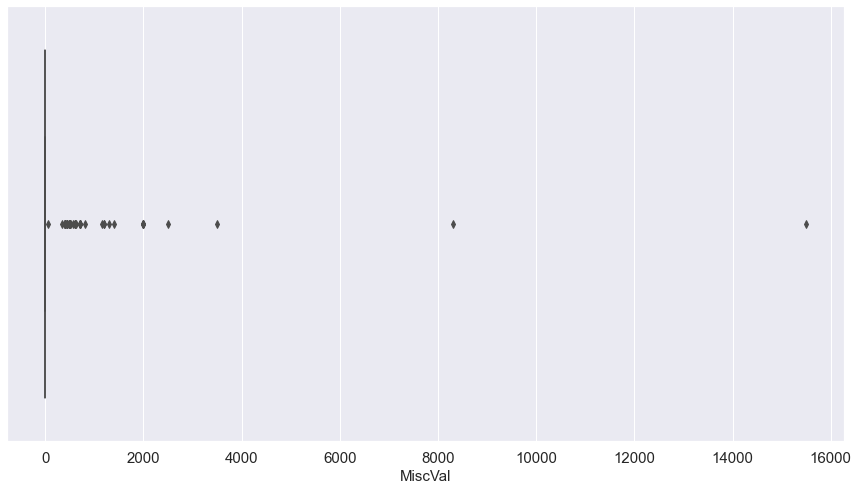

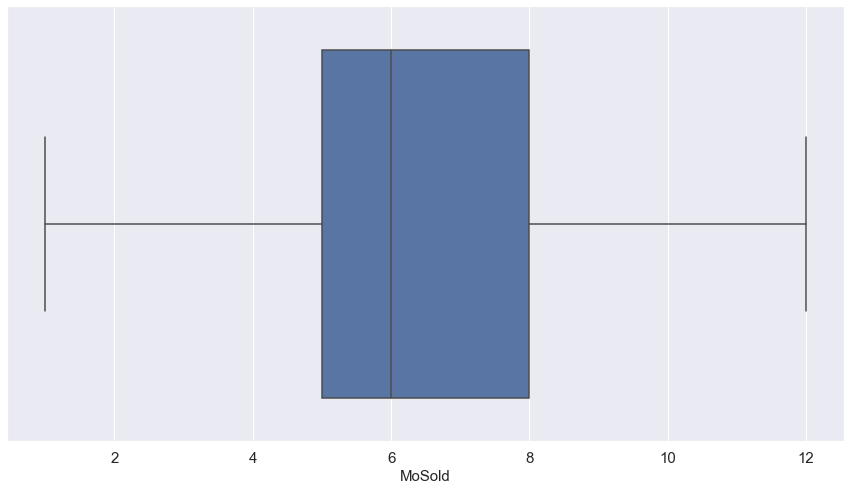

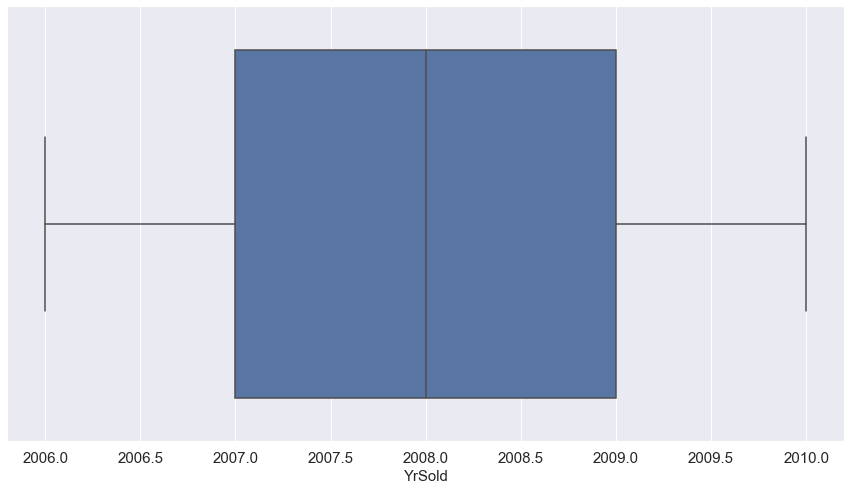

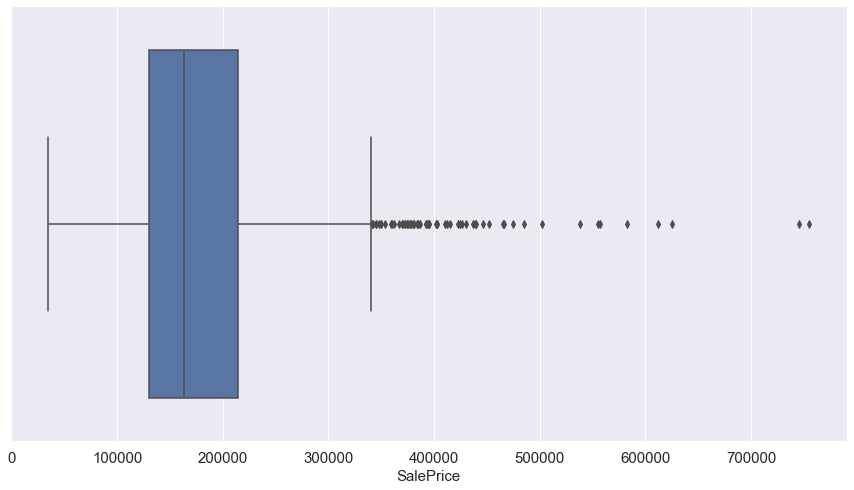

In [22]:
for feature in numerical_features:
    data=train.copy()
    sns.boxplot(data=data, x=feature)
    plt.show()

### Handling Outliers

In [23]:
for i in numerical_features:
    IQR = train[i].quantile(0.75)-train[i].quantile(0.25)
    lower_bridge = train[i].quantile(0.25)-(IQR*1.5)
    upper_bridge = train[i].quantile(0.75)+(IQR*1.5)
    print(f'{i}: Lower Bridge: {lower_bridge}, Upper Bridge: {upper_bridge}')

Id: Lower Bridge: -728.5, Upper Bridge: 2189.5
MSSubClass: Lower Bridge: -55.0, Upper Bridge: 145.0
LotFrontage: Lower Bridge: 27.5, Upper Bridge: 111.5
LotArea: Lower Bridge: 1481.5, Upper Bridge: 17673.5
OverallQual: Lower Bridge: 2.0, Upper Bridge: 10.0
OverallCond: Lower Bridge: 3.5, Upper Bridge: 7.5
YearBuilt: Lower Bridge: 1885.0, Upper Bridge: 2069.0
YearRemodAdd: Lower Bridge: 1911.5, Upper Bridge: 2059.5
MasVnrArea: Lower Bridge: -249.0, Upper Bridge: 415.0
BsmtFinSF1: Lower Bridge: -1068.375, Upper Bridge: 1780.625
BsmtFinSF2: Lower Bridge: 0.0, Upper Bridge: 0.0
BsmtUnfSF: Lower Bridge: -654.5, Upper Bridge: 1685.5
TotalBsmtSF: Lower Bridge: 42.0, Upper Bridge: 2052.0
1stFlrSF: Lower Bridge: 118.125, Upper Bridge: 2155.125
2ndFlrSF: Lower Bridge: -1092.0, Upper Bridge: 1820.0
LowQualFinSF: Lower Bridge: 0.0, Upper Bridge: 0.0
GrLivArea: Lower Bridge: 158.625, Upper Bridge: 2747.625
BsmtFullBath: Lower Bridge: -1.5, Upper Bridge: 2.5
BsmtHalfBath: Lower Bridge: 0.0, Upper Br

In [24]:
train.loc[train['MSSubClass']>=145.0, 'MSSubClass'] = 145.0
train.loc[train['MSSubClass']<=-55.0, 'MSSubClass'] = -55.0

train.loc[train['LotFrontage']>=111.5, 'LotFrontage'] = 111.5
train.loc[train['LotFrontage']<=27.5, 'LotFrontage'] = 27.5

train.loc[train['LotArea']>=17673.5, 'LotArea'] = 17673.5
train.loc[train['LotArea']<=1481.5, 'LotArea'] = 1481.5

train.loc[train['OverallQual']>=10.0, 'OverallQual'] = 10.0
train.loc[train['OverallQual']<=2.0, 'OverallQual'] = 2.0

train.loc[train['OverallCond']>=7.5, 'OverallCond'] = 7.5
train.loc[train['OverallCond']<=3.5, 'OverallCond'] = 3.5

train.loc[train['YearBuilt']>=2069.0, 'YearBuilt'] = 2069.0
train.loc[train['YearBuilt']<=1885.0, 'YearBuilt'] = 1885.0

train.loc[train['YearRemodAdd']>=2069.0, 'YearRemodAdd'] = 2069.0
train.loc[train['YearRemodAdd']<=1911.5, 'YearRemodAdd'] = 1911.5

train.loc[train['MasVnrArea']>=415.0, 'MasVnrArea'] = 415.0
train.loc[train['MasVnrArea']<=-249.0, 'MasVnrArea'] = -249.0

train.loc[train['BsmtFinSF1']>=1780.625, 'BsmtFinSF1'] =1780.625
train.loc[train['BsmtFinSF1']<=-1068.375, 'BsmtFinSF1'] = -1068.375

train.loc[train['BsmtFinSF2']>=0.0, 'BsmtFinSF2'] = 0.0
train.loc[train['BsmtFinSF2']<=0.0, 'BsmtFinSF2'] = 0.0

train.loc[train['BsmtUnfSF']>=1685.5, 'BsmtUnfSF'] = 1685.5
train.loc[train['BsmtUnfSF']<=-654.5, 'BsmtUnfSF'] = -654.5

train.loc[train['TotalBsmtSF']>=2052.0, 'TotalBsmtSF'] = 2052.0
train.loc[train['TotalBsmtSF']<=42.0, 'TotalBsmtSF'] = 42.0

train.loc[train['1stFlrSF']>=2155.125, '1stFlrSF'] =2155.125
train.loc[train['1stFlrSF']<=118.125, '1stFlrSF'] = 118.125         

train.loc[train['2ndFlrSF']>=1820.0, '2ndFlrSF'] = 1820.0
train.loc[train['2ndFlrSF']<=-1092.0, '2ndFlrSF'] = -1092.0

train.loc[train['LowQualFinSF']>=0.0, 'LowQualFinSF'] = 145.0
train.loc[train['LowQualFinSF']<=0.0, 'LowQualFinSF'] = 0.0

train.loc[train['GrLivArea']>=2747.625, 'GrLivArea'] = 2747.625
train.loc[train['GrLivArea']<=158.625, 'GrLivArea'] =158.625

train.loc[train['BsmtFullBath']>=2.5, 'BsmtFullBath'] = 2.5
train.loc[train['BsmtFullBath']<=-1.5, 'BsmtFullBath'] = -1.5

train.loc[train['BsmtHalfBath']>=0.0, 'BsmtHalfBath'] = 0.0
train.loc[train['BsmtHalfBath']<=0.0, 'BsmtHalfBath'] = 0.0

train.loc[train['FullBath']>=3.5, 'FullBath'] = 3.5
train.loc[train['FullBath']<=-0.5, 'FullBath'] =-0.5

train.loc[train['HalfBath']>=2.5, 'HalfBath'] = 2.5
train.loc[train['HalfBath']<=-1.5, 'HalfBath'] = -1.5

train.loc[train['BedroomAbvGr']>=4.5, 'BedroomAbvGr'] = 4.5
train.loc[train['BedroomAbvGr']<= 0.5, 'BedroomAbvGr'] =  0.5

train.loc[train['KitchenAbvGr']>=1.0, 'KitchenAbvGr'] = 1.0
train.loc[train['KitchenAbvGr']<=1.0, 'KitchenAbvGr'] = 1.0

train.loc[train['TotRmsAbvGrd']>=10.0, 'TotRmsAbvGrd'] = 10.0
train.loc[train['TotRmsAbvGrd']<=2.0, 'TotRmsAbvGrd'] = 2.0

train.loc[train['Fireplaces']>=2.5, 'Fireplaces'] = 2.5
train.loc[train['Fireplaces']<=-1.5, 'Fireplaces'] = -1.5

train.loc[train['GarageYrBlt']>=2063.5, 'GarageYrBlt'] = 2063.5
train.loc[train['GarageYrBlt']<=1899.5, 'GarageYrBlt'] = 1899.5

train.loc[train['GarageCars']>=3.5, 'GarageCars'] = 3.5
train.loc[train['GarageCars']<=-0.5, 'GarageCars'] = -0.5

train.loc[train['GarageArea']>=938.25, 'GarageArea'] = 938.25
train.loc[train['GarageArea']<=-27.75, 'GarageArea'] =-27.75

train.loc[train['WoodDeckSF']>=420.0, 'WoodDeckSF'] = 420.0
train.loc[train['WoodDeckSF']<=-252.0, 'WoodDeckSF'] = -252.0

train.loc[train['OpenPorchSF']>=170.0, 'OpenPorchSF'] = 170.0
train.loc[train['OpenPorchSF']<=-102.0, 'OpenPorchSF'] = -102.0

train.loc[train['EnclosedPorch']>=0.0, 'EnclosedPorch'] = 0.0
train.loc[train['EnclosedPorch']<=0.0, 'EnclosedPorch'] = 0.0

train.loc[train['3SsnPorch']>=0.0, '3SsnPorch'] = 170.0
train.loc[train['3SsnPorch']<=0.0, '3SsnPorch'] = 0.0

train.loc[train['ScreenPorch']>=0.0, 'ScreenPorch'] =0.0
train.loc[train['ScreenPorch']<=0.0, 'ScreenPorch'] = 0.0

train.loc[train['PoolArea']>=0.0, 'PoolArea'] = 170.0
train.loc[train['PoolArea']<=0.0, 'PoolArea'] = 0.0

train.loc[train['MiscVal']>0.0, 'MiscVal'] = 0.0
train.loc[train['MiscVal']<=0.0, 'MiscVal'] = -102.0

train.loc[train['MoSold']>=12.5, 'MoSold'] = 12.5
train.loc[train['MoSold']<=0.5, 'MoSold'] = 0.5

train.loc[train['YrSold']>=2012.0, 'YrSold'] = 2012.0
train.loc[train['YrSold']<=2004.0, 'YrSold'] = 2004.0


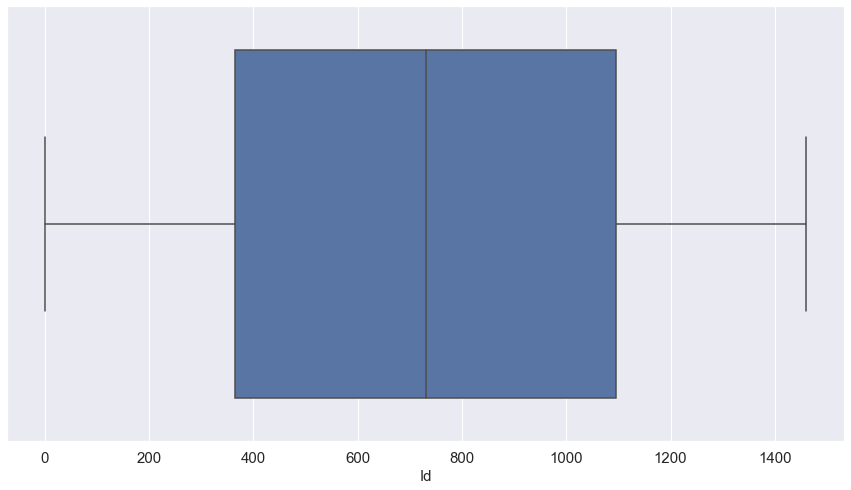

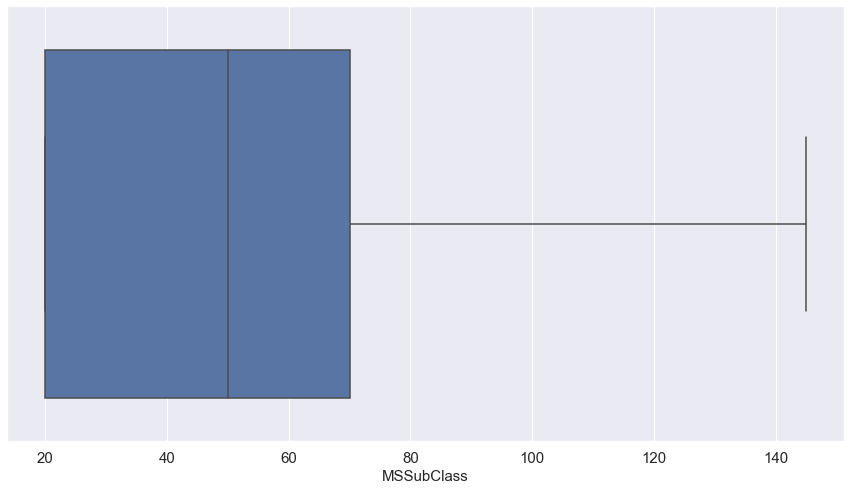

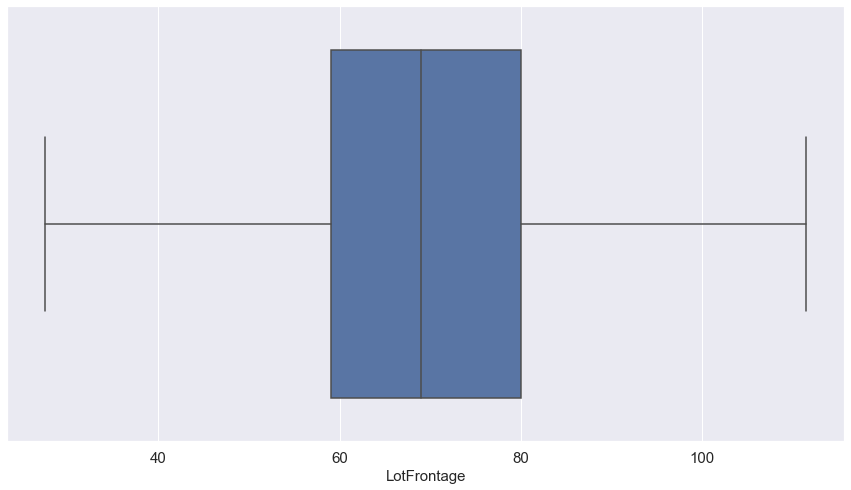

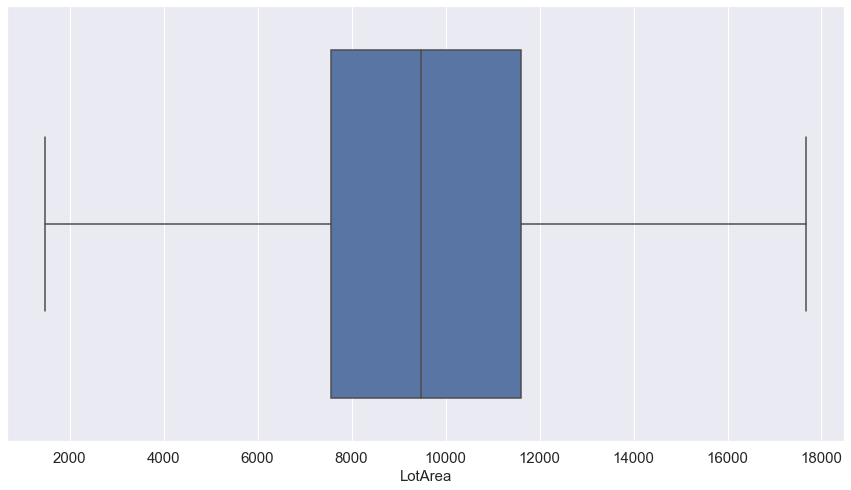

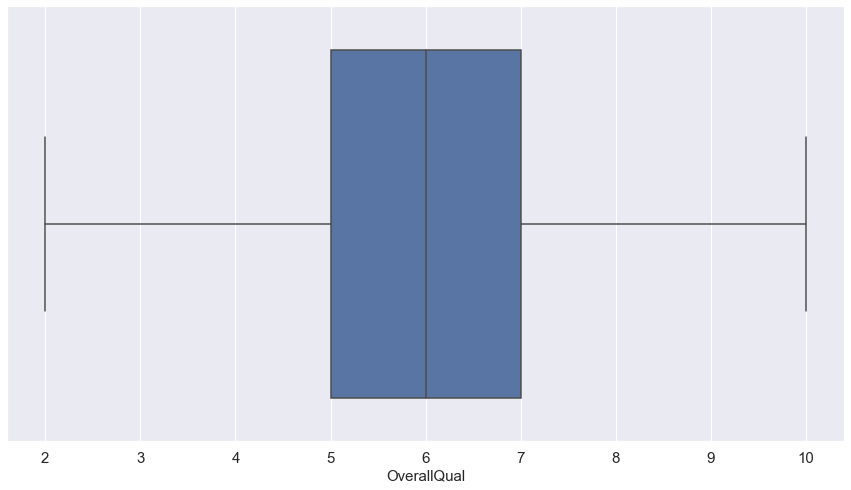

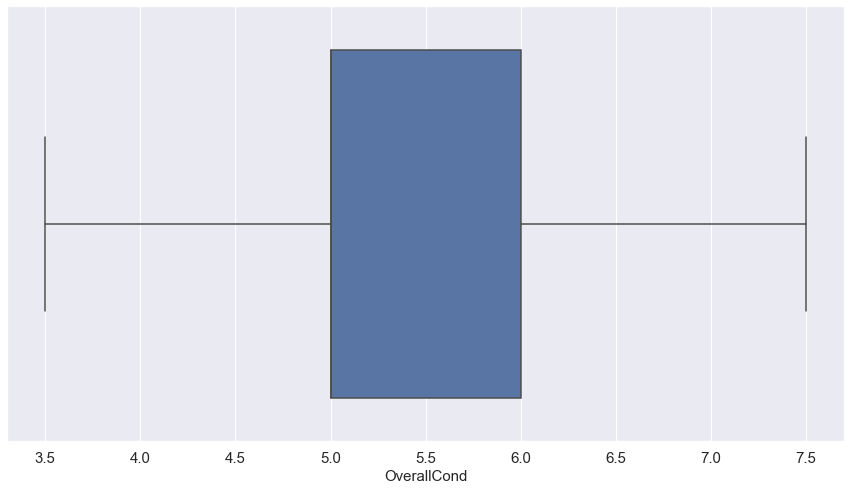

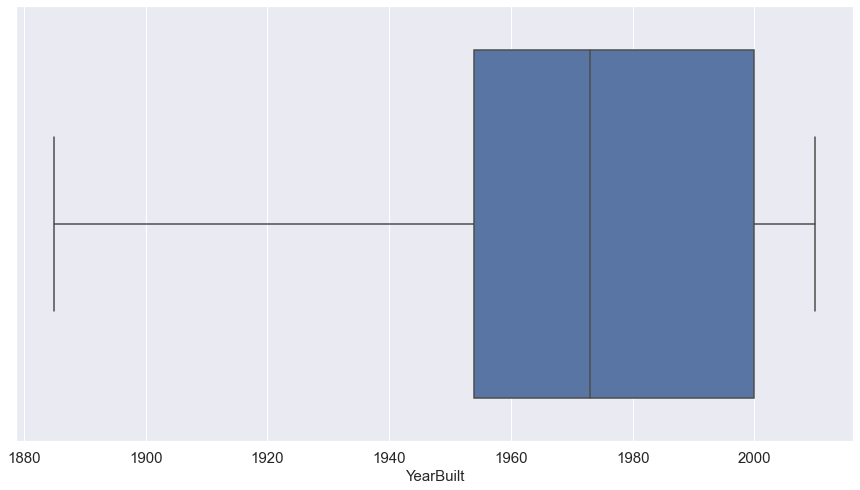

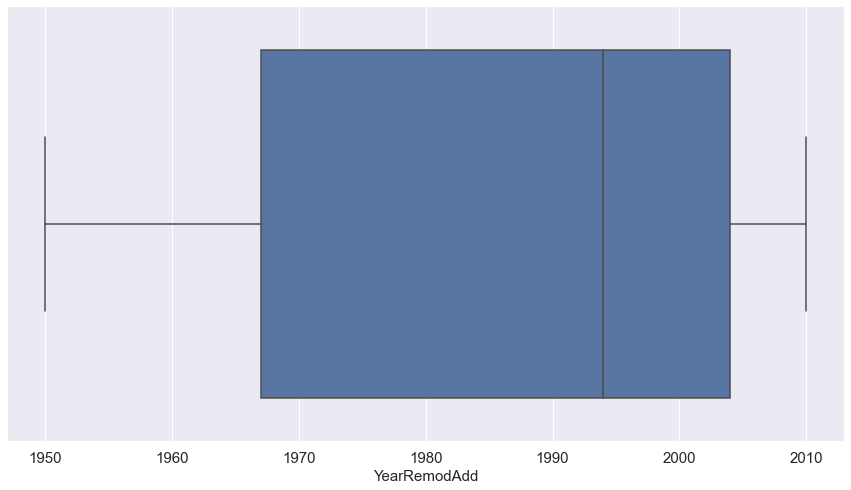

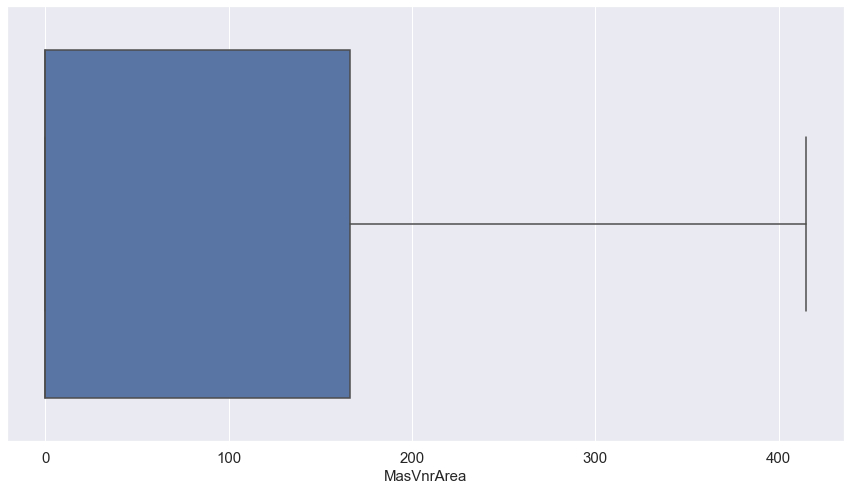

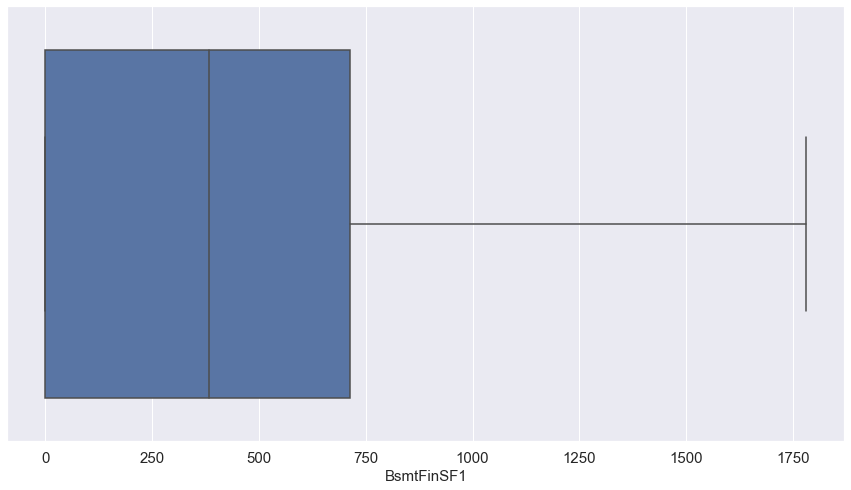

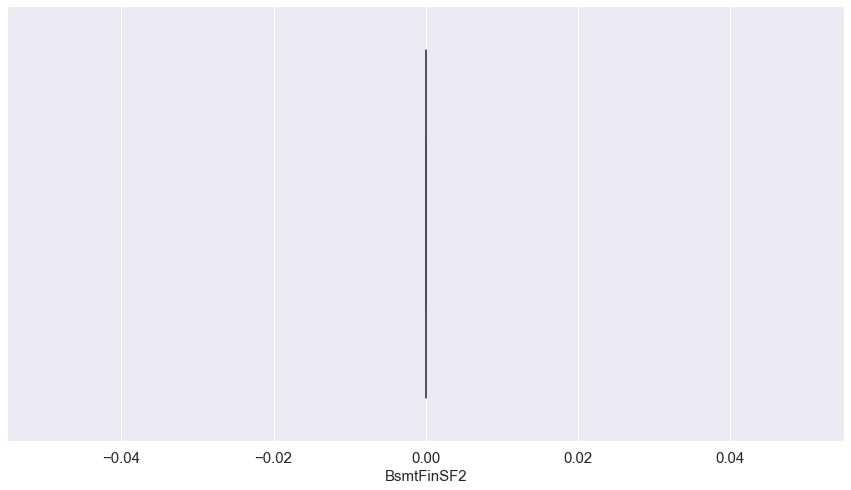

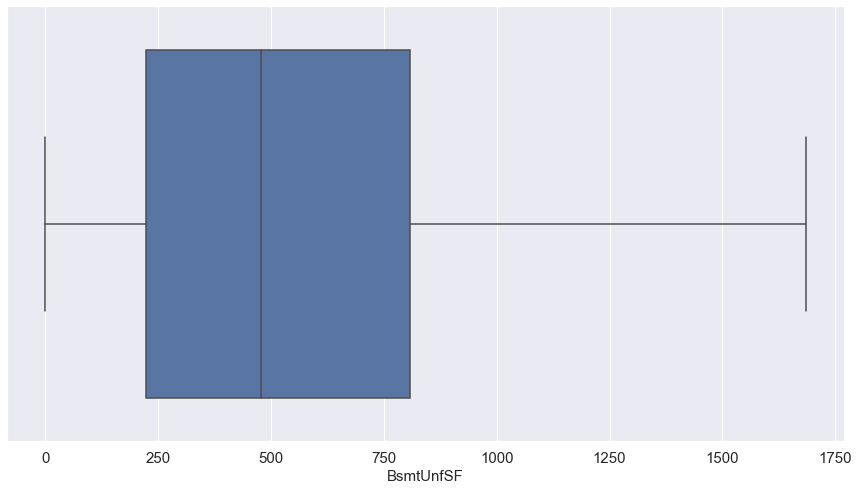

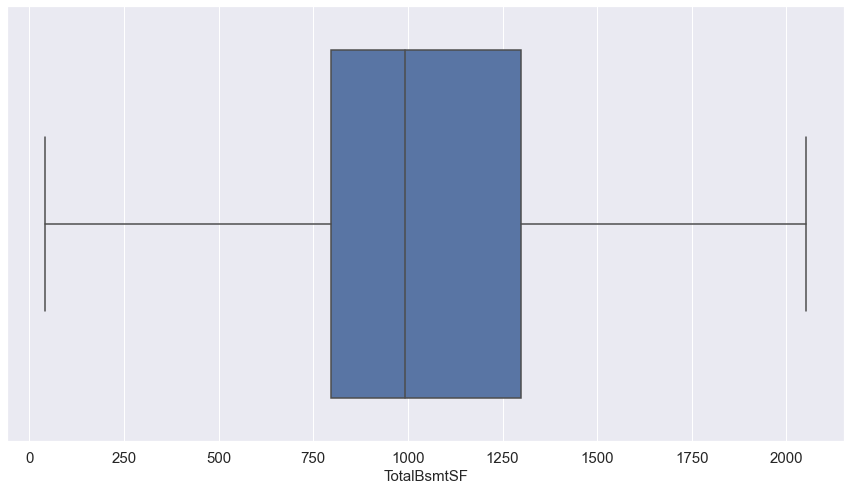

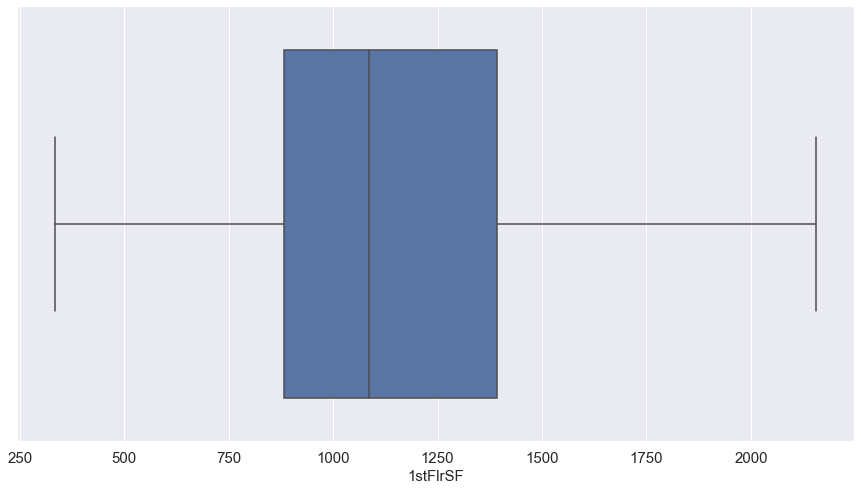

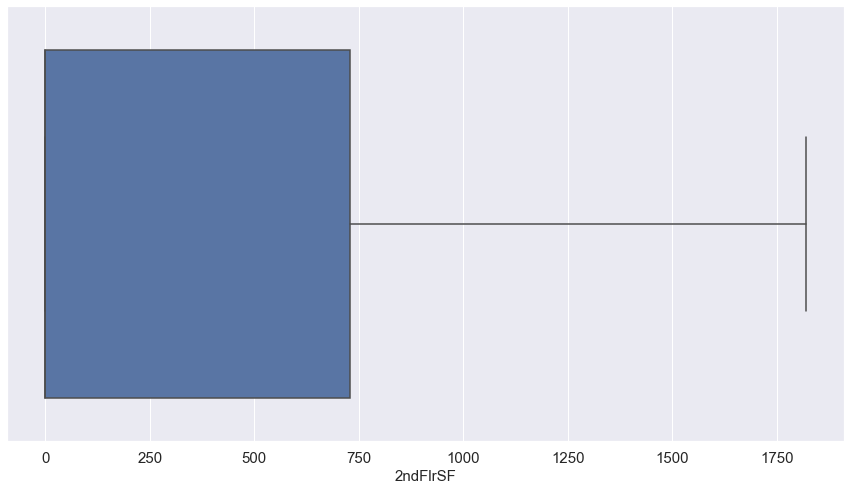

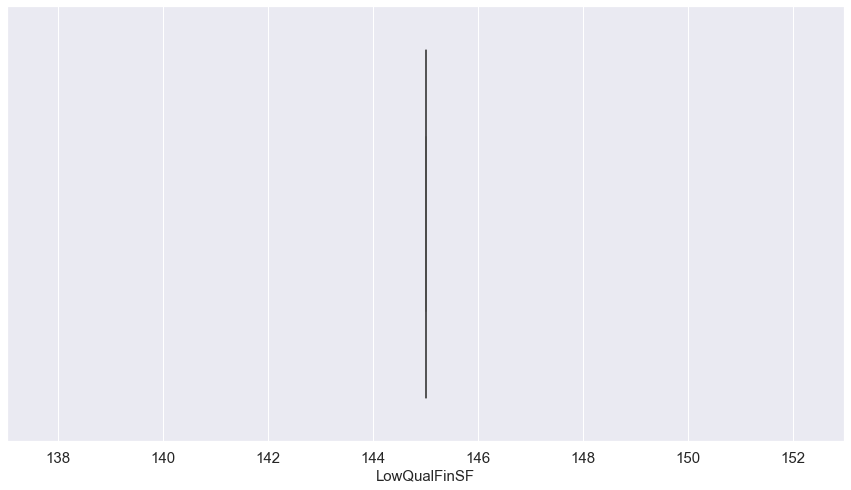

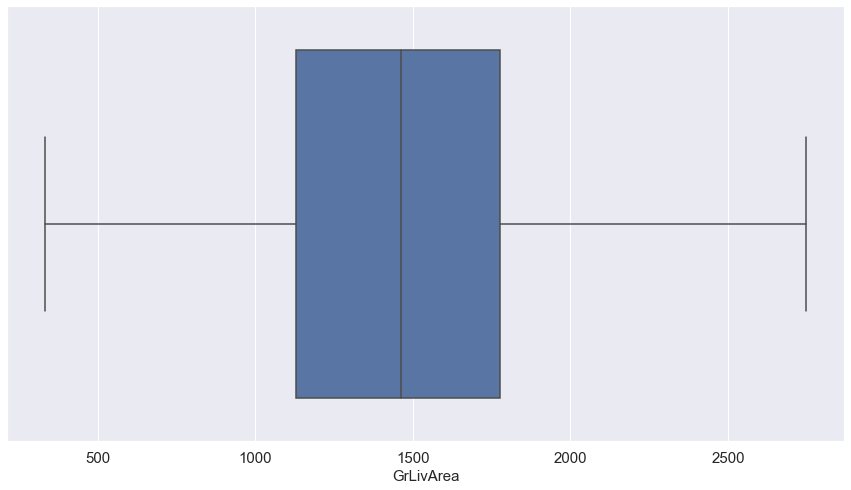

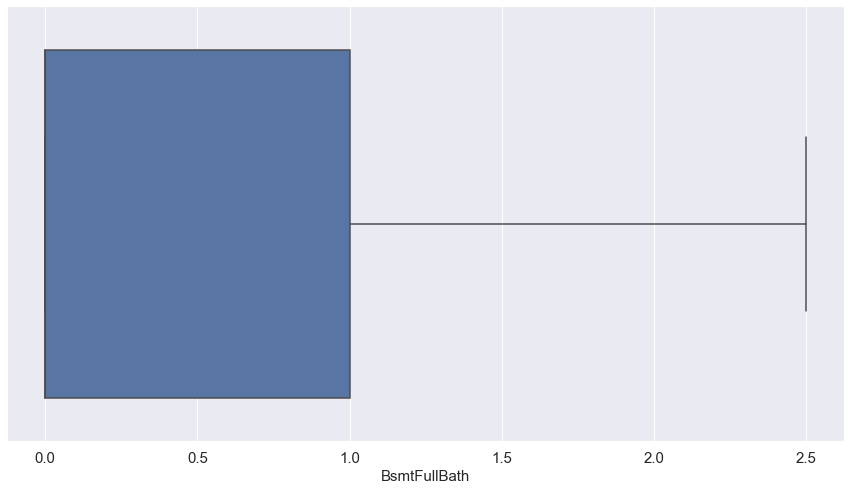

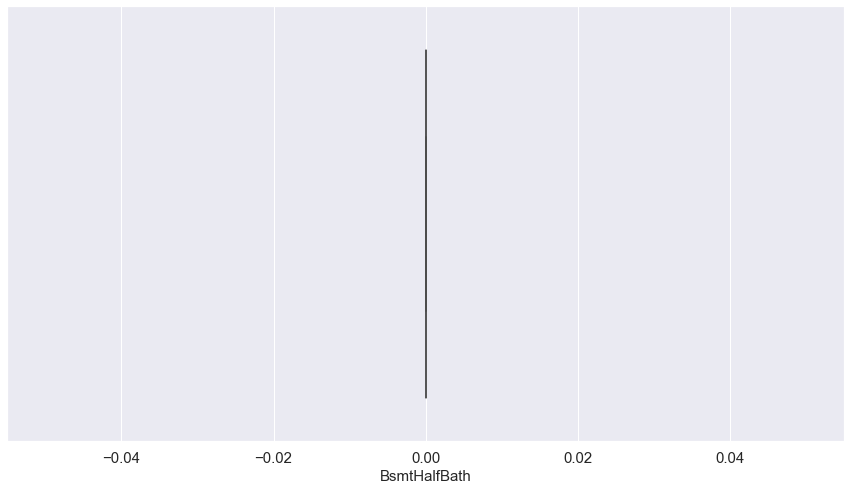

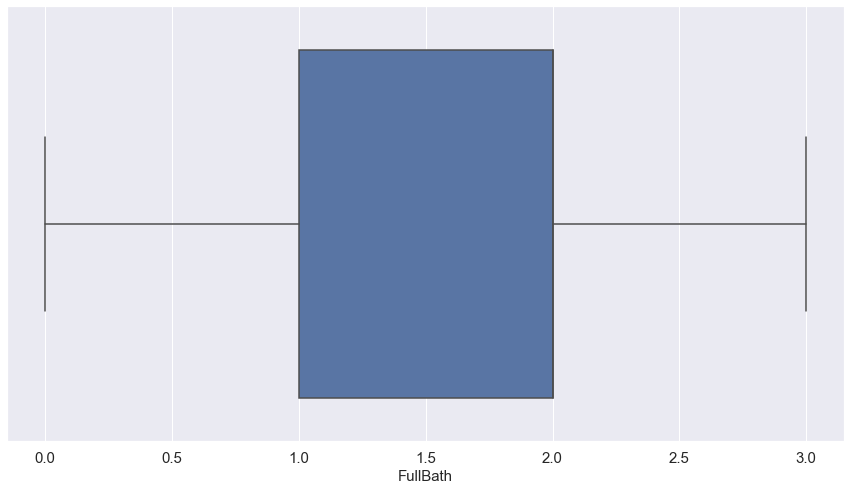

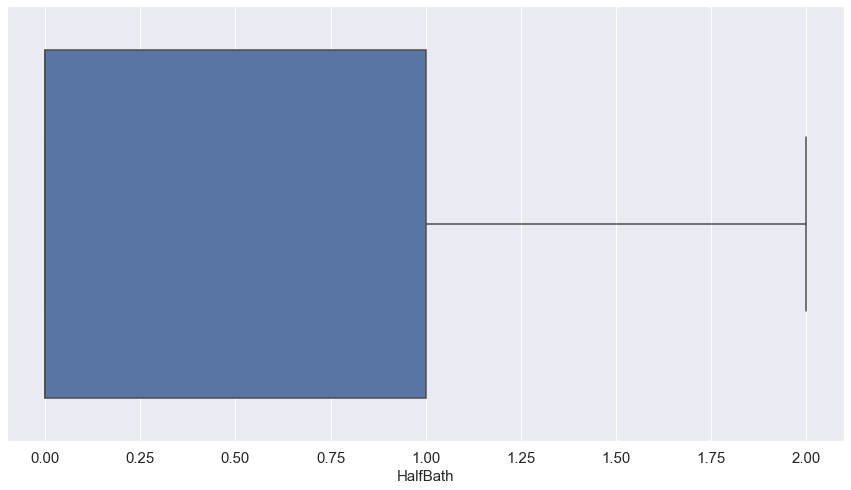

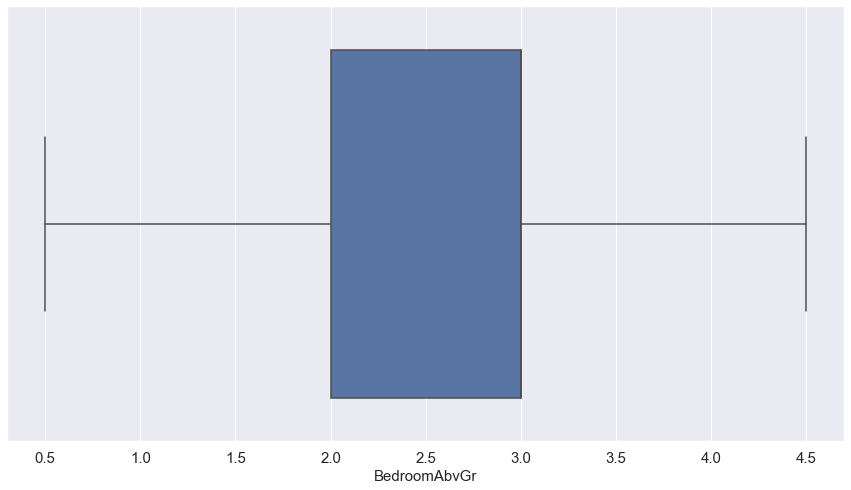

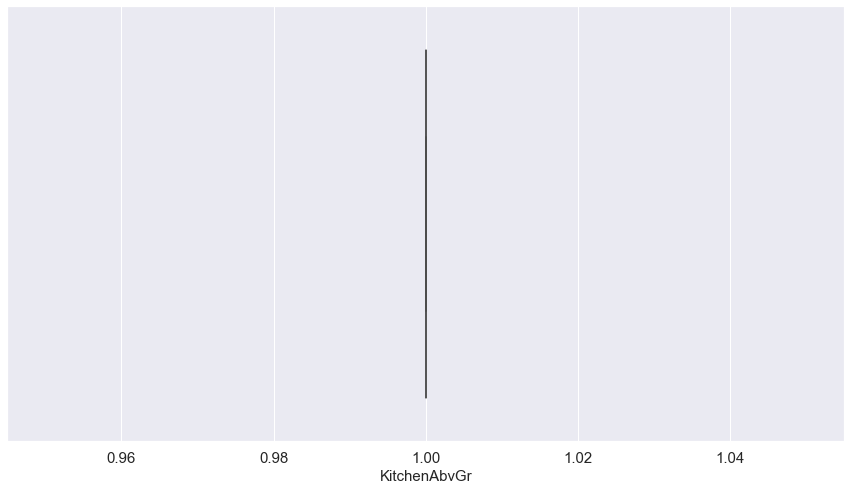

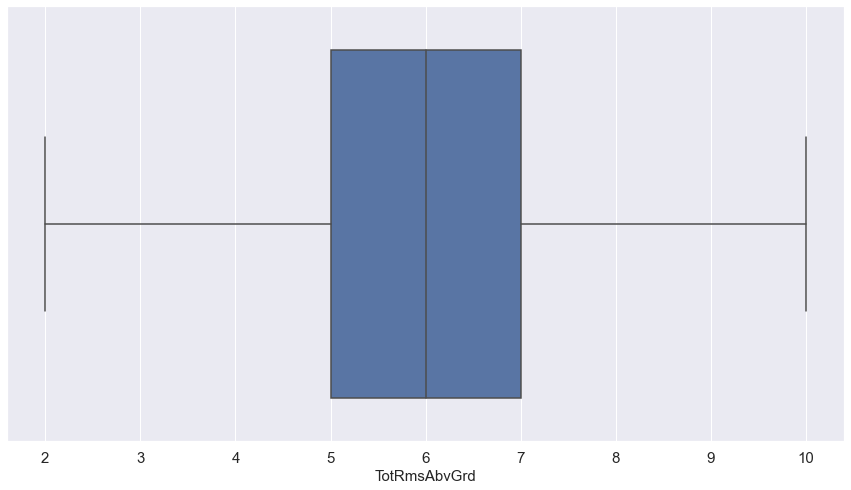

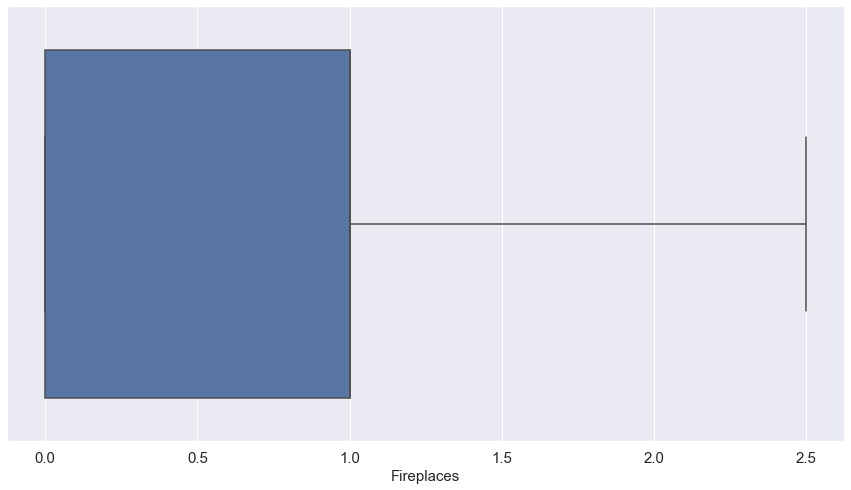

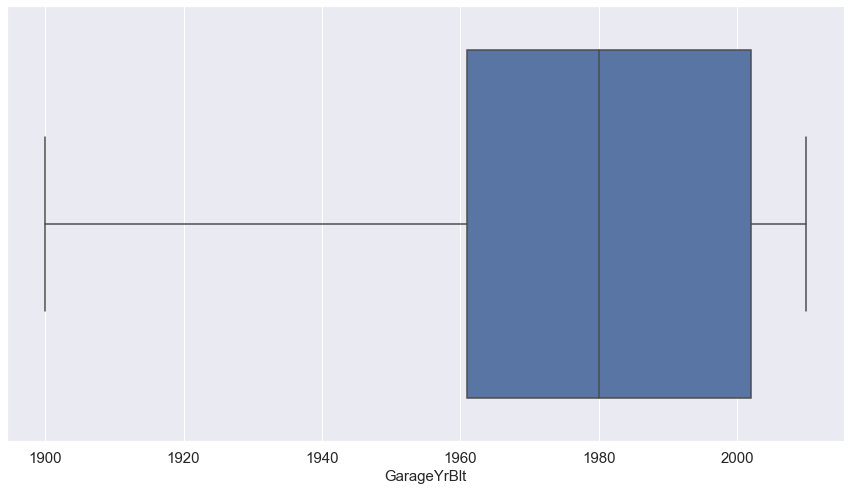

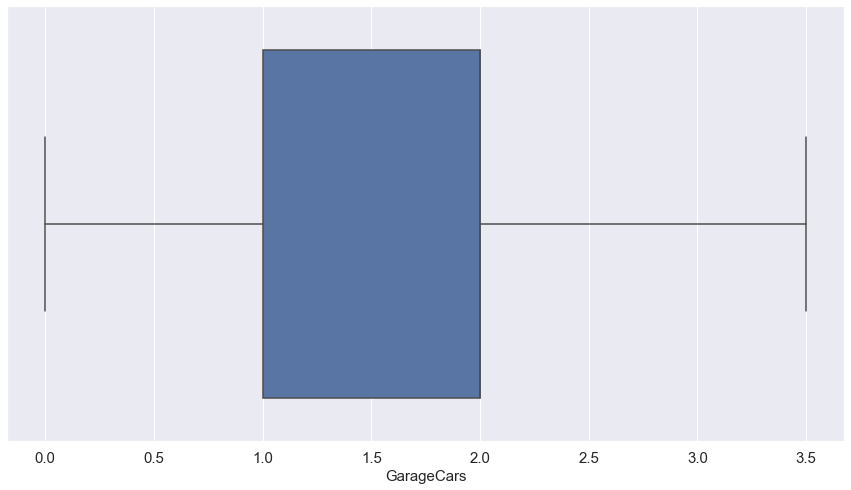

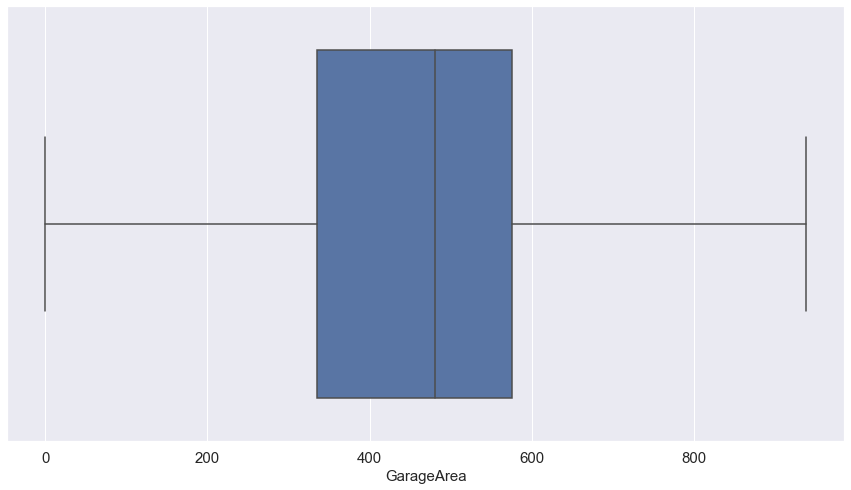

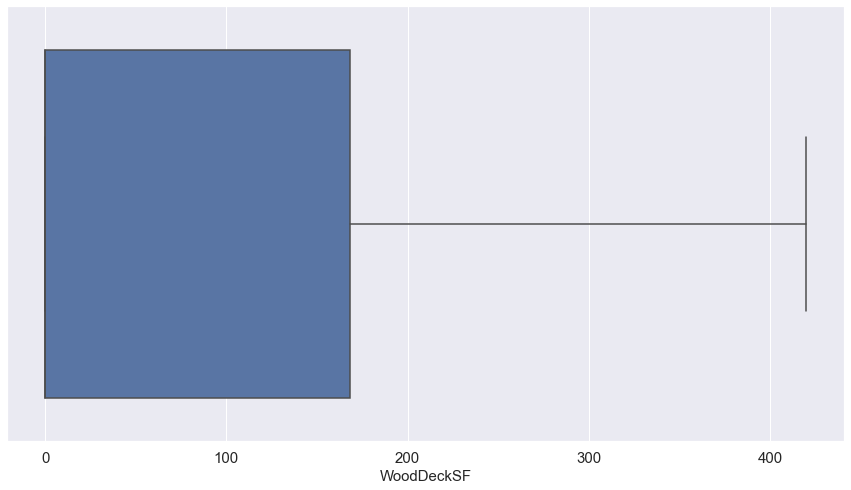

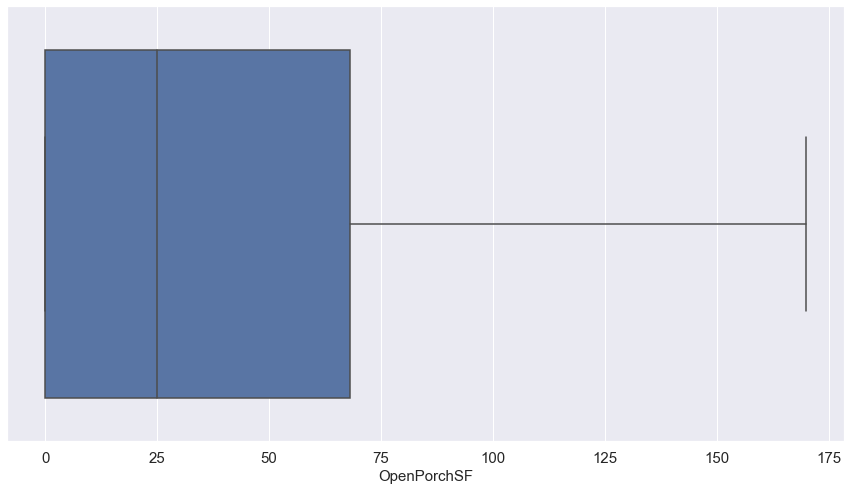

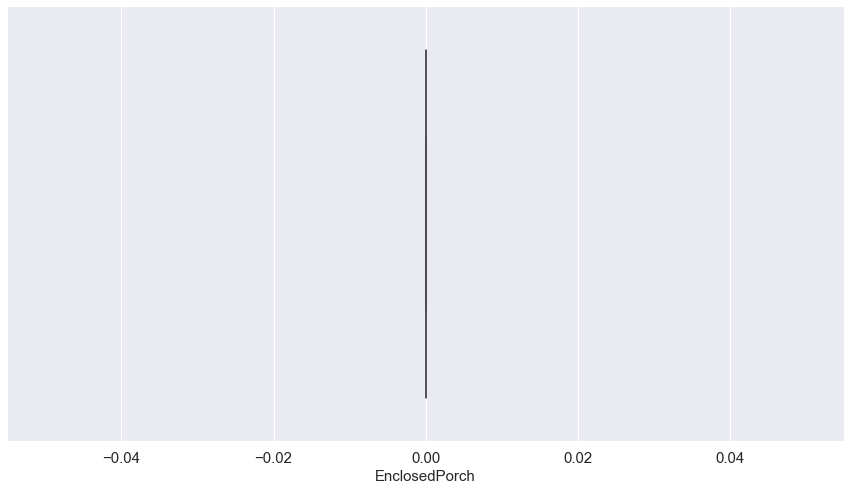

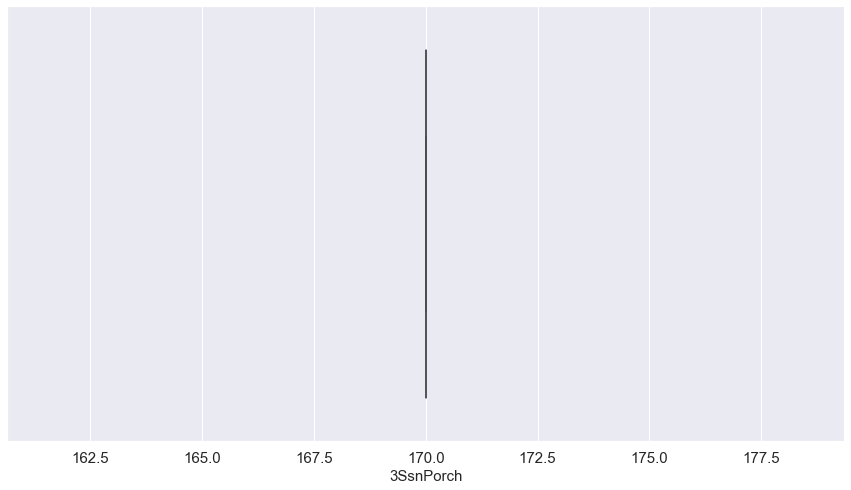

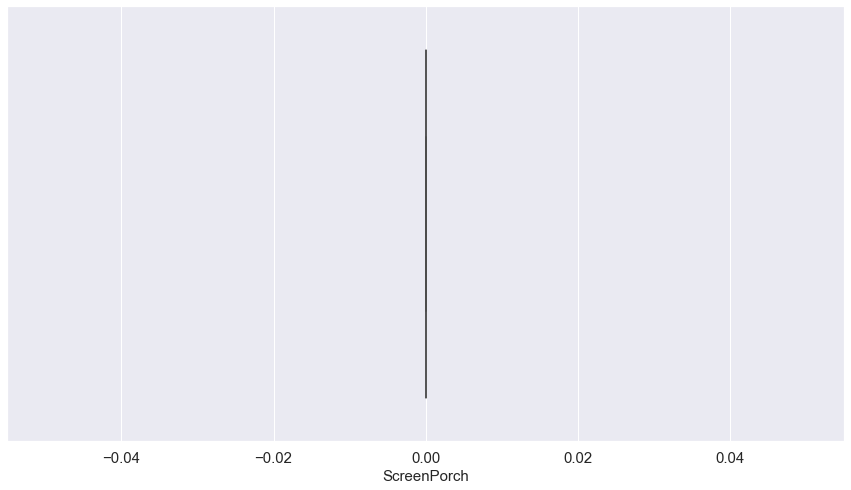

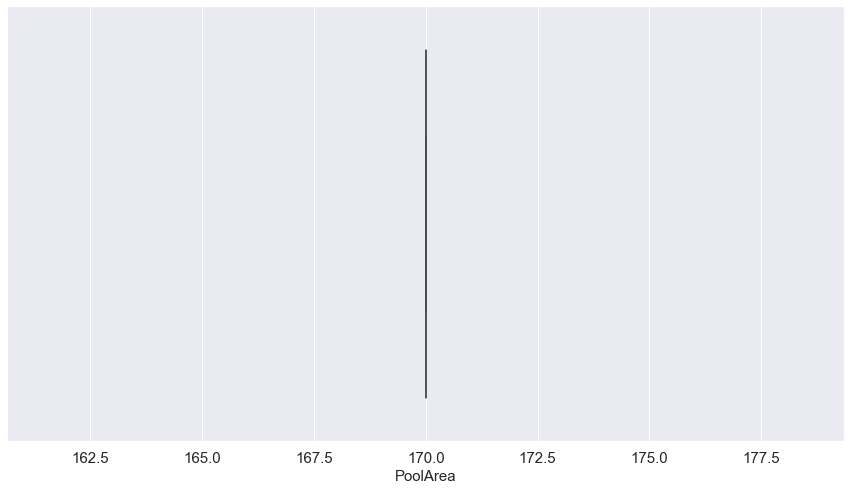

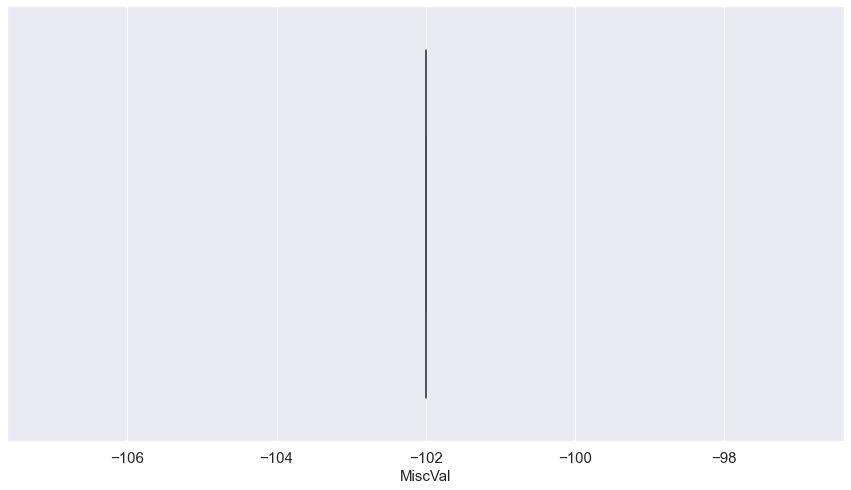

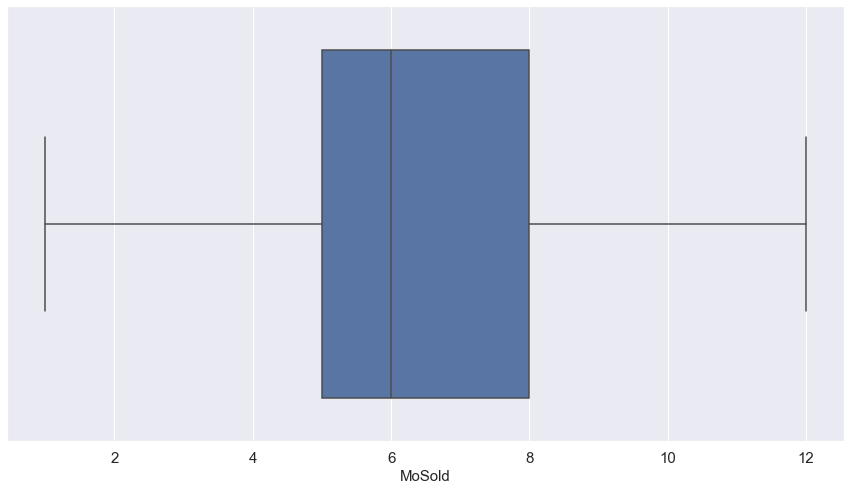

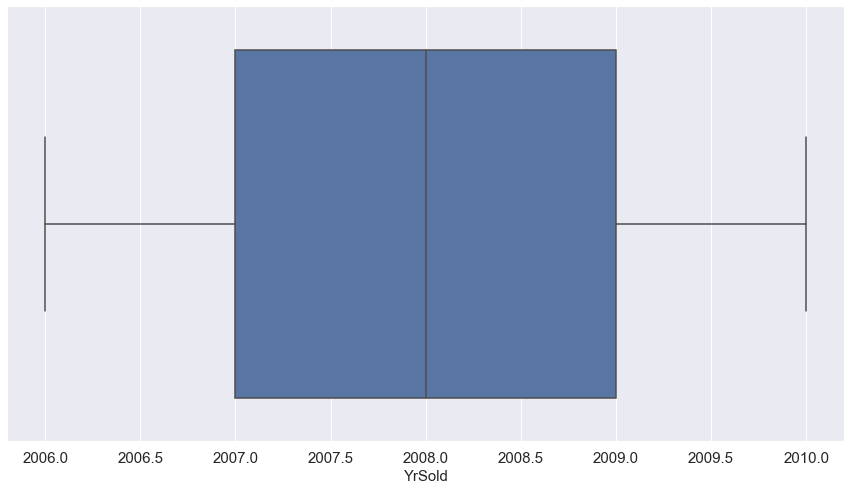

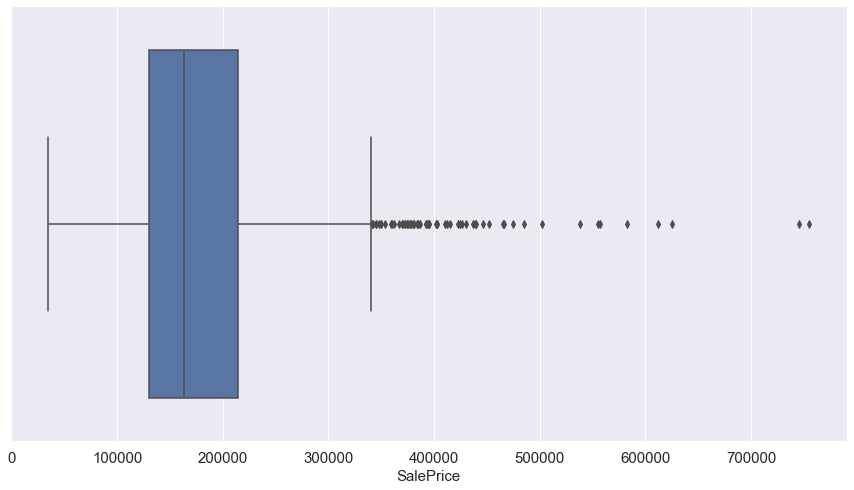

In [25]:
for feature in numerical_features:
    data=train.copy()
    sns.boxplot(data=data, x=feature)
    plt.show()

### All Outliers are removed using IQR except SalesPrice as it is our taget feature

## Categorical feature

In [26]:
categorical_feature = [feature for feature in train.columns if train[feature].dtypes =='O']
train[categorical_feature].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

### Number of categiries in a feature

In [27]:
for feature in categorical_feature:
    print(f'The Feature is :{feature} and number of categories is {len(train[feature].unique())}')

The Feature is :MSZoning and number of categories is 5
The Feature is :Street and number of categories is 2
The Feature is :Alley and number of categories is 3
The Feature is :LotShape and number of categories is 4
The Feature is :LandContour and number of categories is 4
The Feature is :Utilities and number of categories is 2
The Feature is :LotConfig and number of categories is 5
The Feature is :LandSlope and number of categories is 3
The Feature is :Neighborhood and number of categories is 25
The Feature is :Condition1 and number of categories is 9
The Feature is :Condition2 and number of categories is 8
The Feature is :BldgType and number of categories is 5
The Feature is :HouseStyle and number of categories is 8
The Feature is :RoofStyle and number of categories is 6
The Feature is :RoofMatl and number of categories is 8
The Feature is :Exterior1st and number of categories is 15
The Feature is :Exterior2nd and number of categories is 16
The Feature is :MasVnrType and number of cat

### Neighborhood, Exterior1st, Exterior2nd are having more than 15 categories

## Finding relation between categorical features and target feature SalePrice

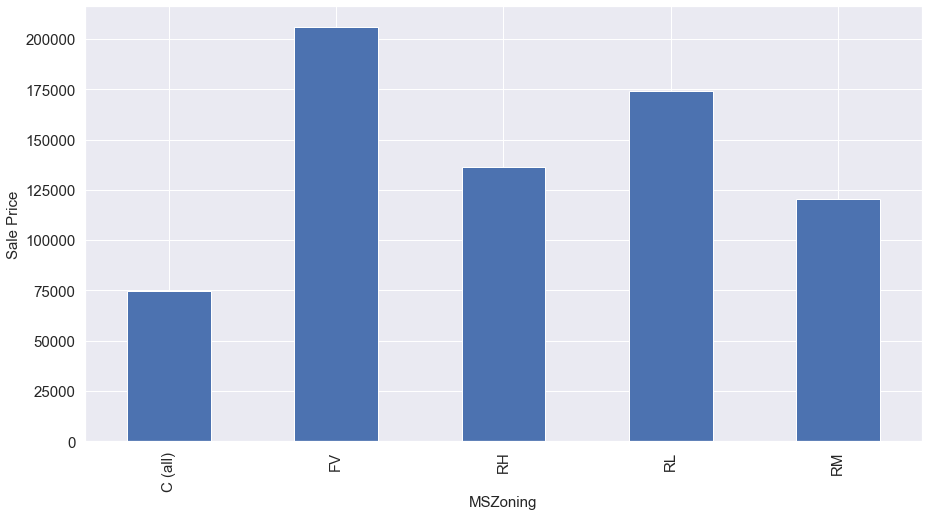

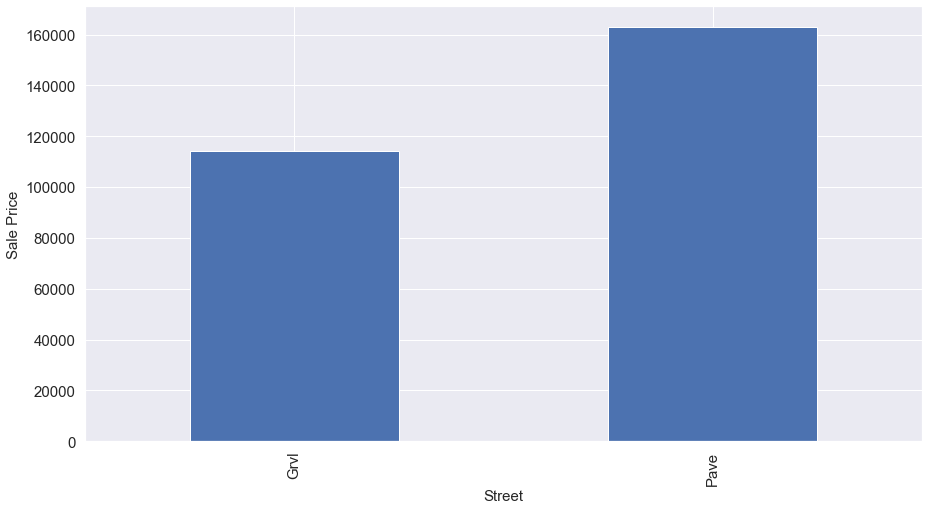

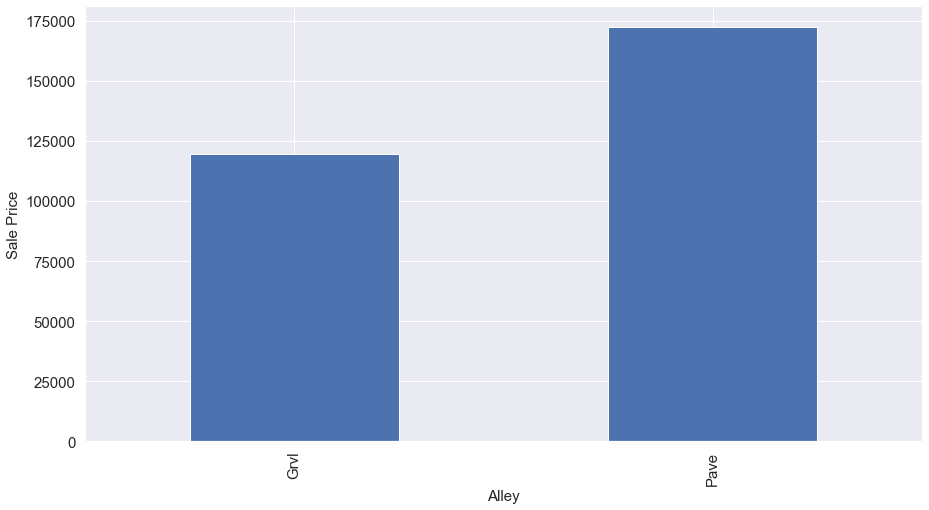

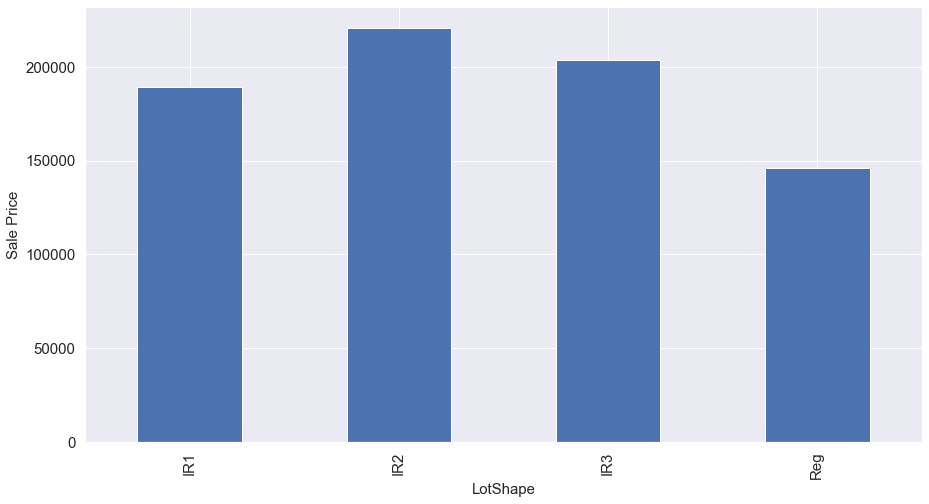

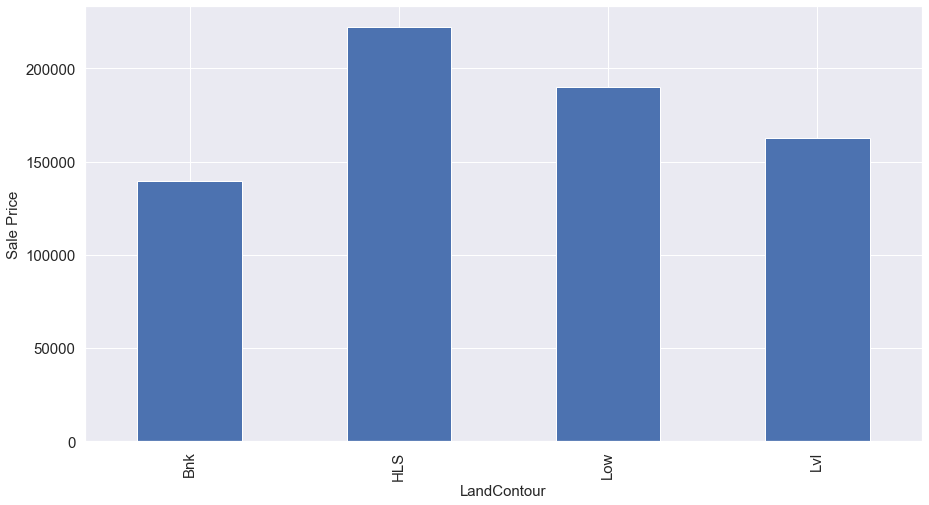

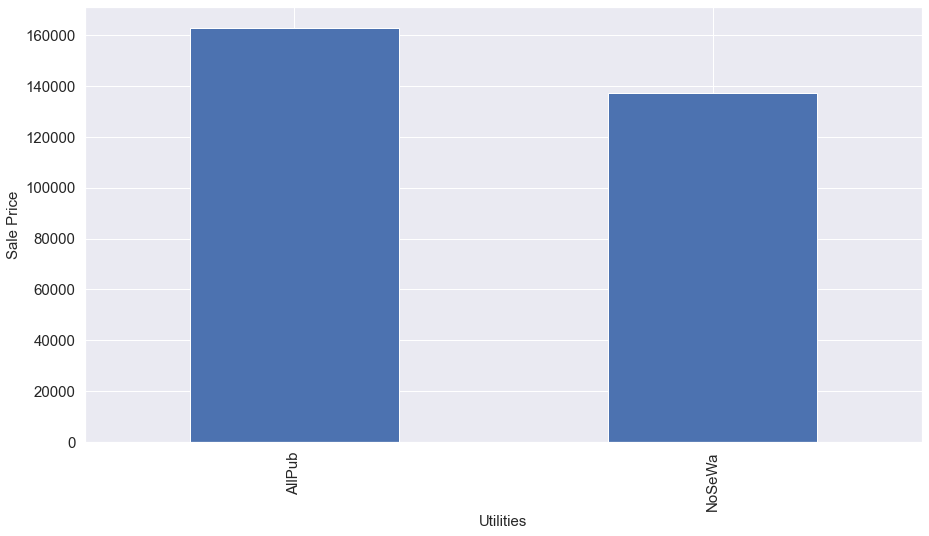

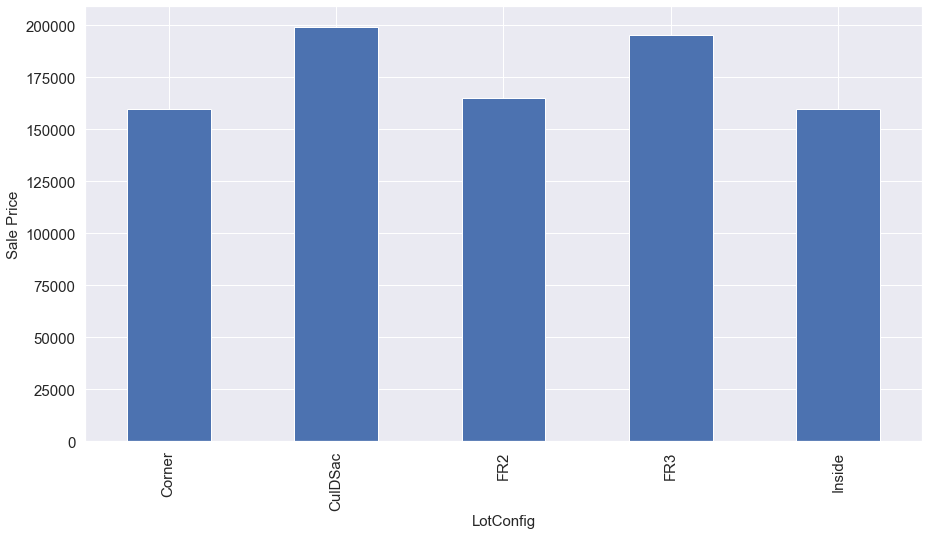

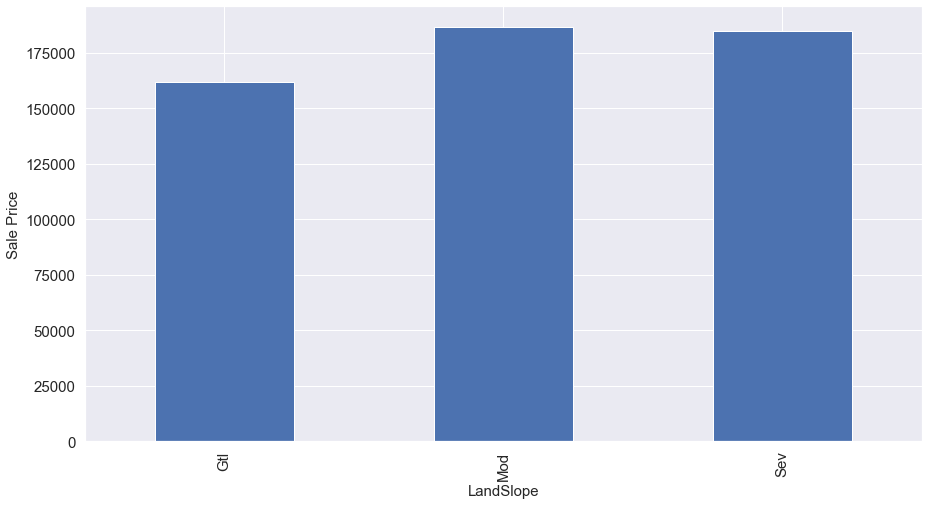

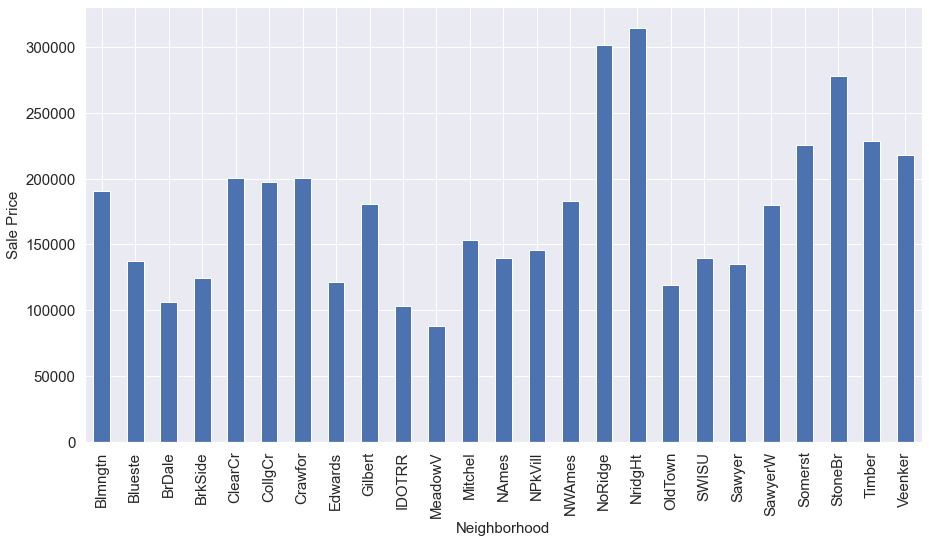

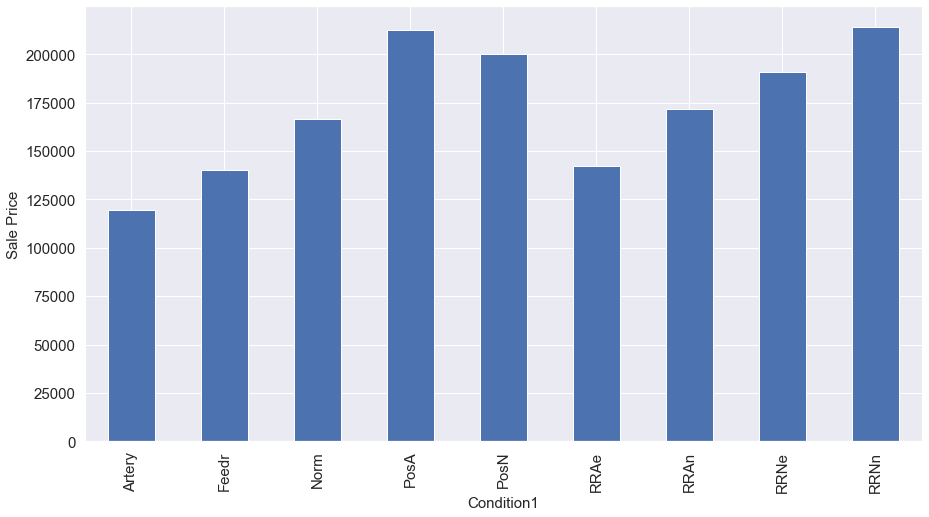

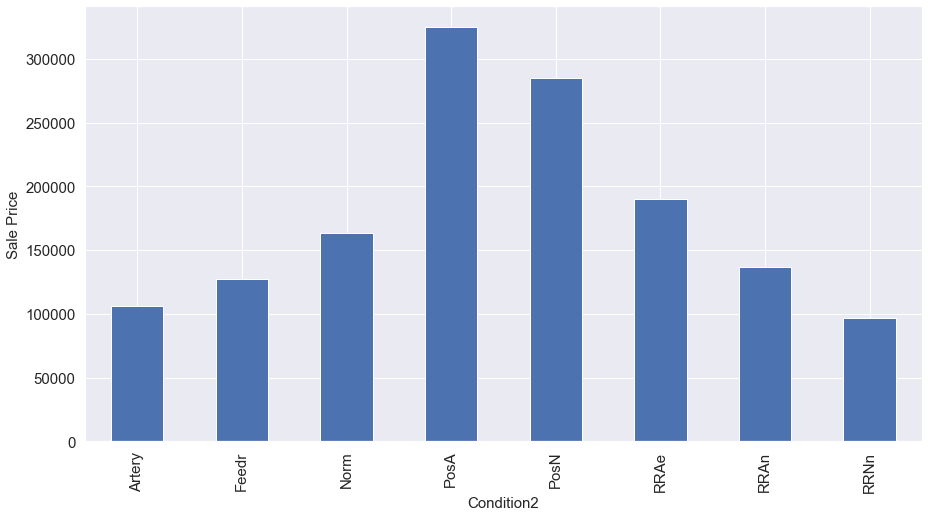

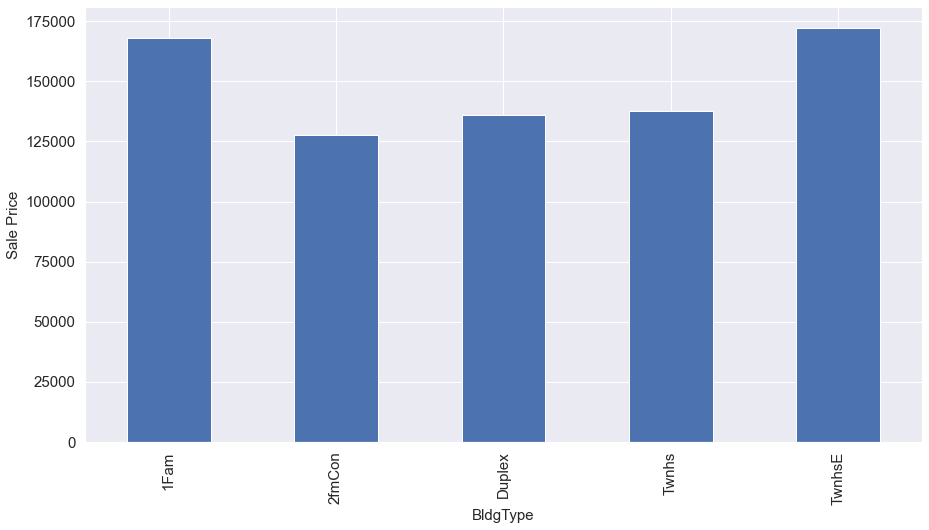

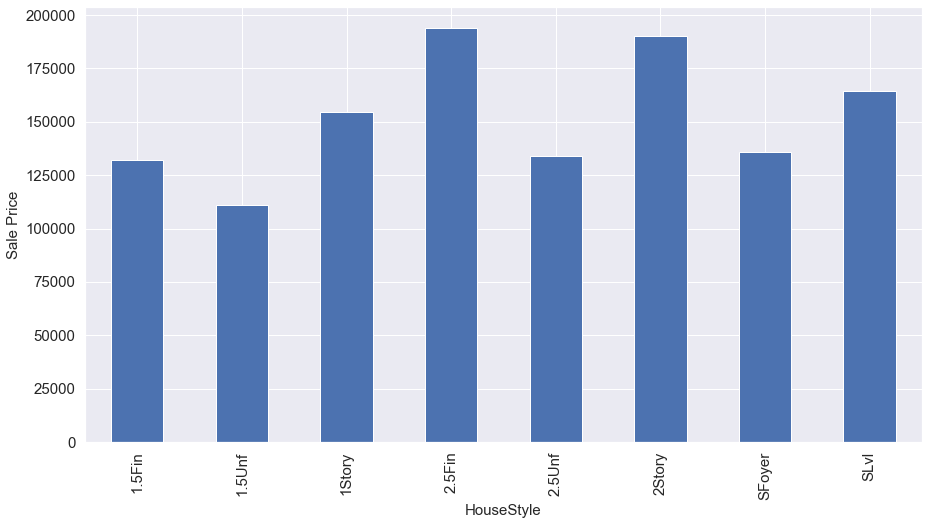

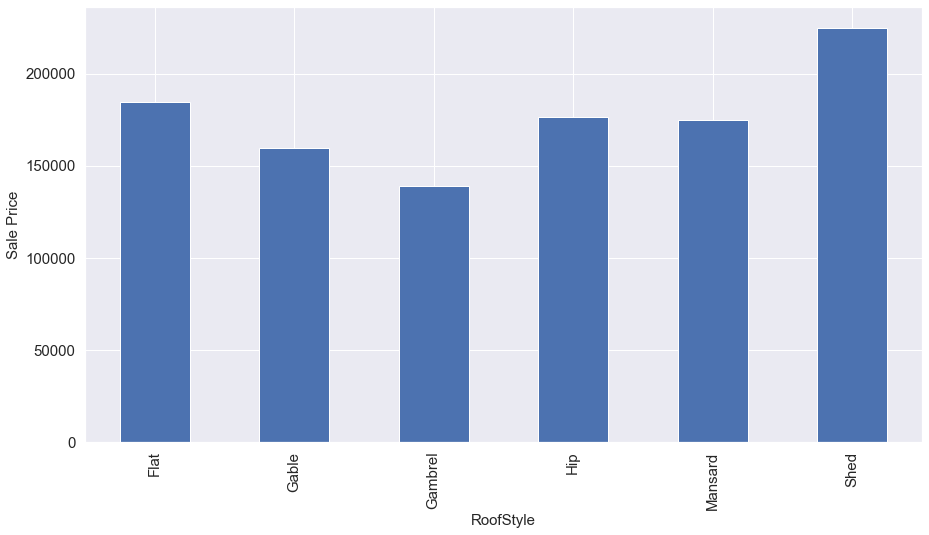

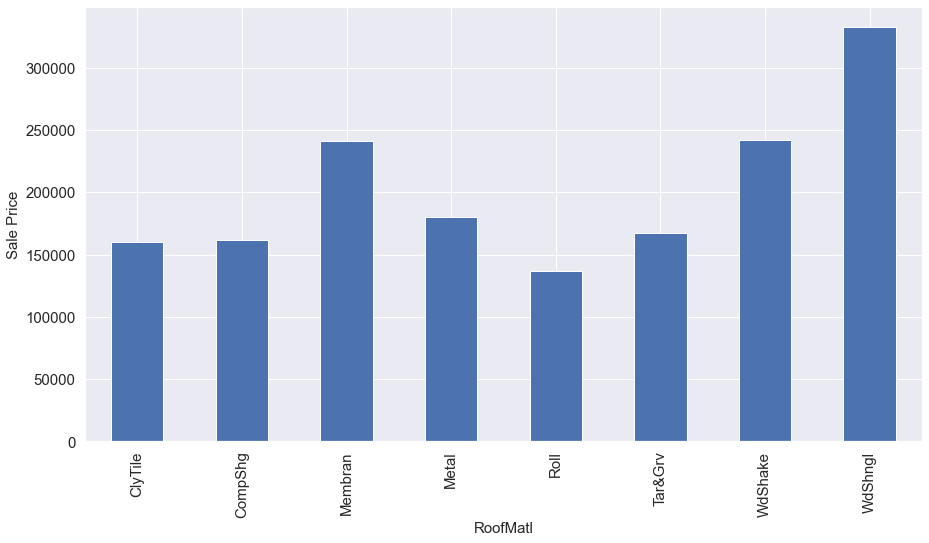

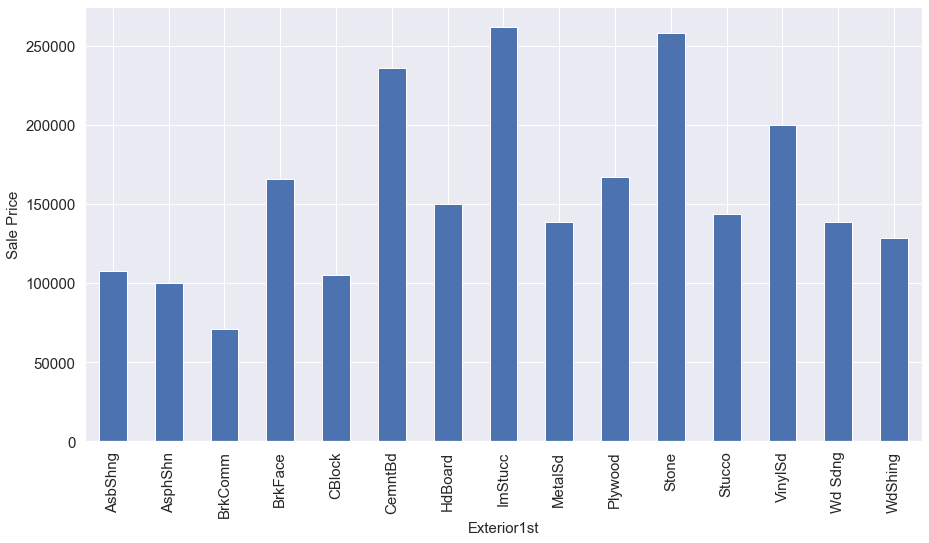

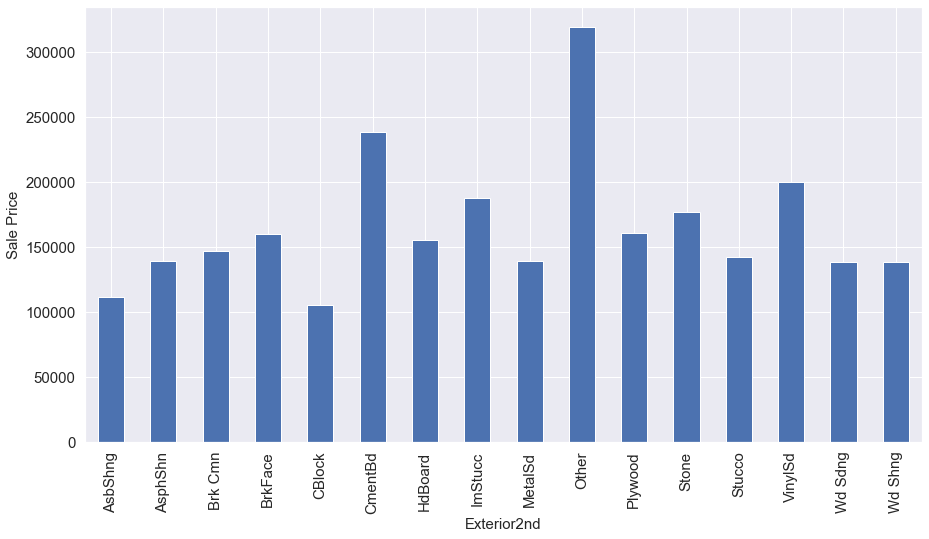

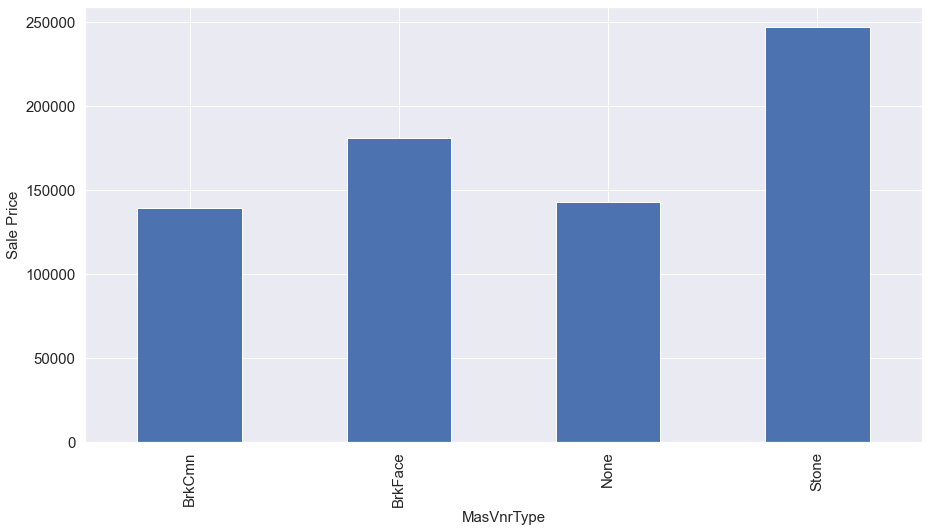

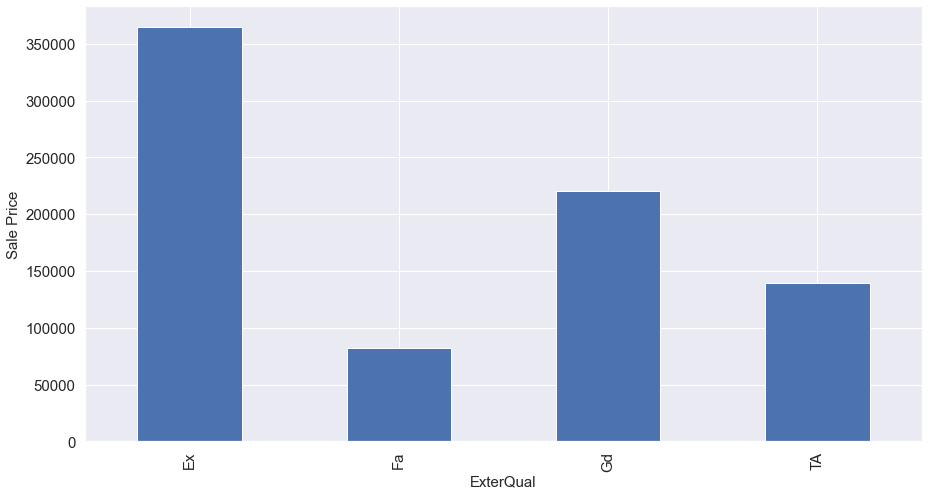

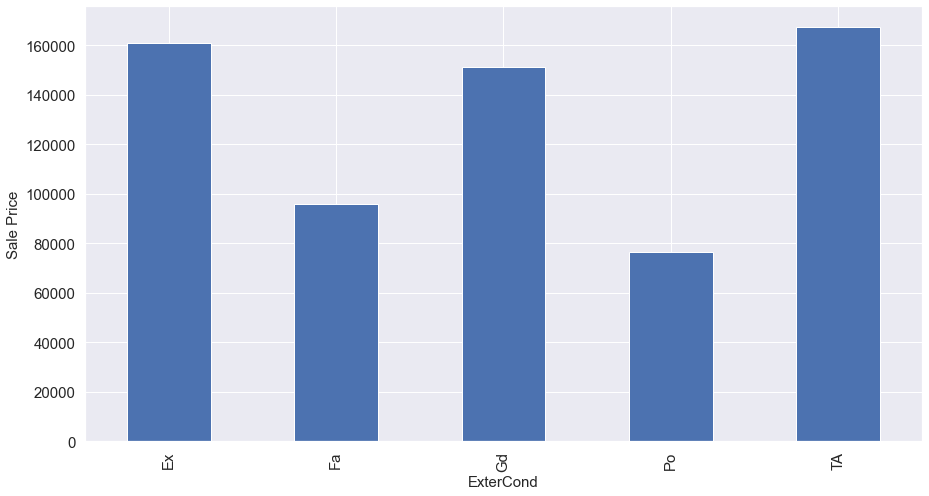

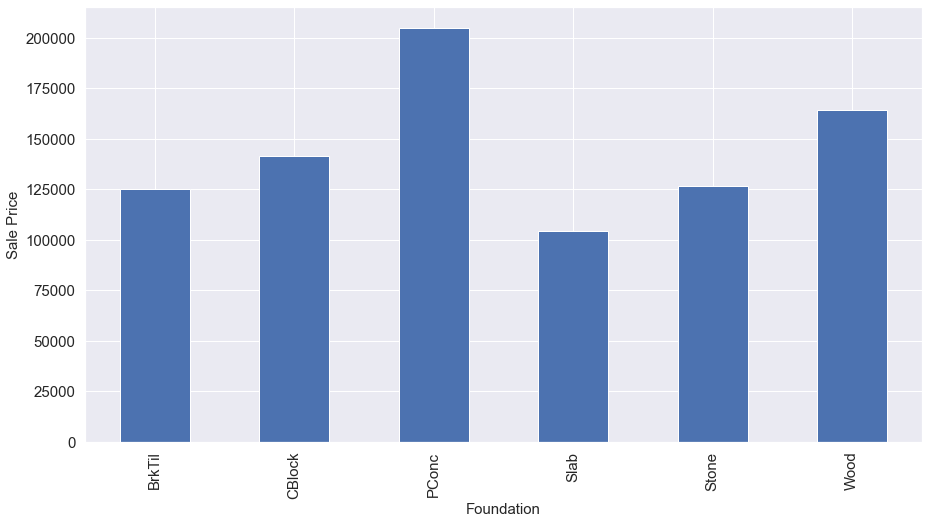

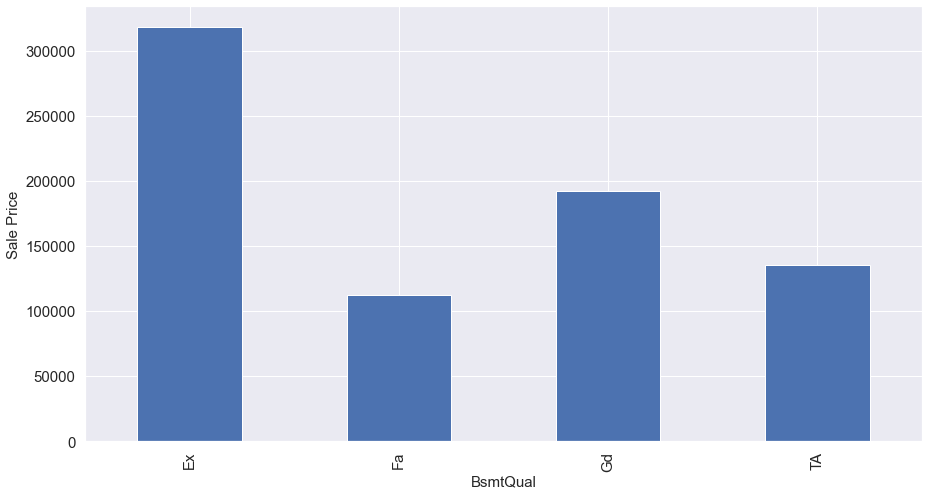

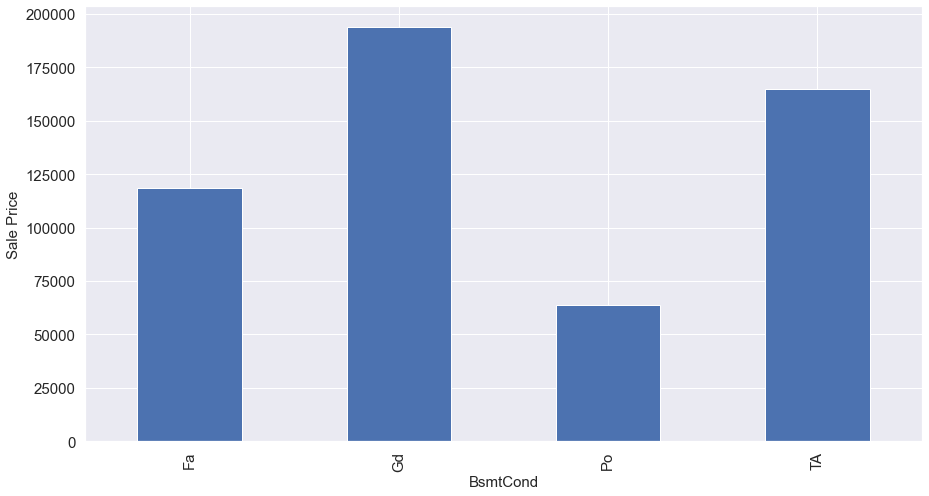

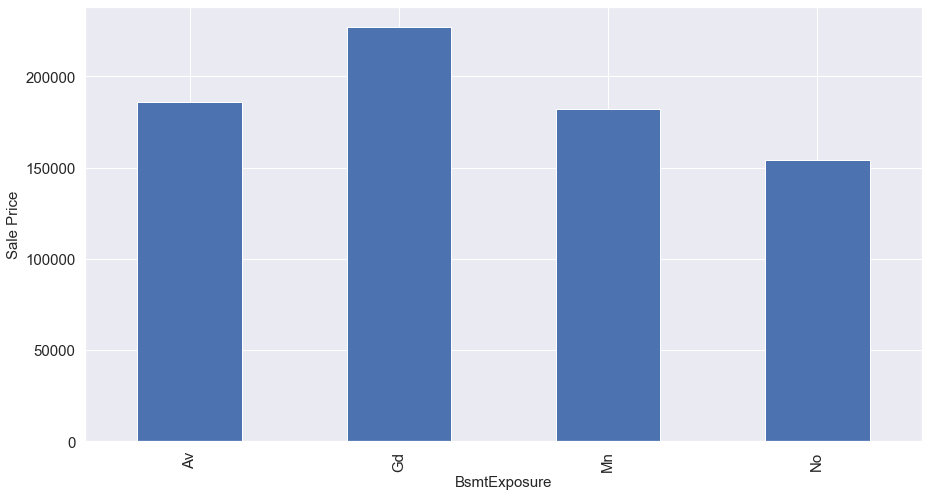

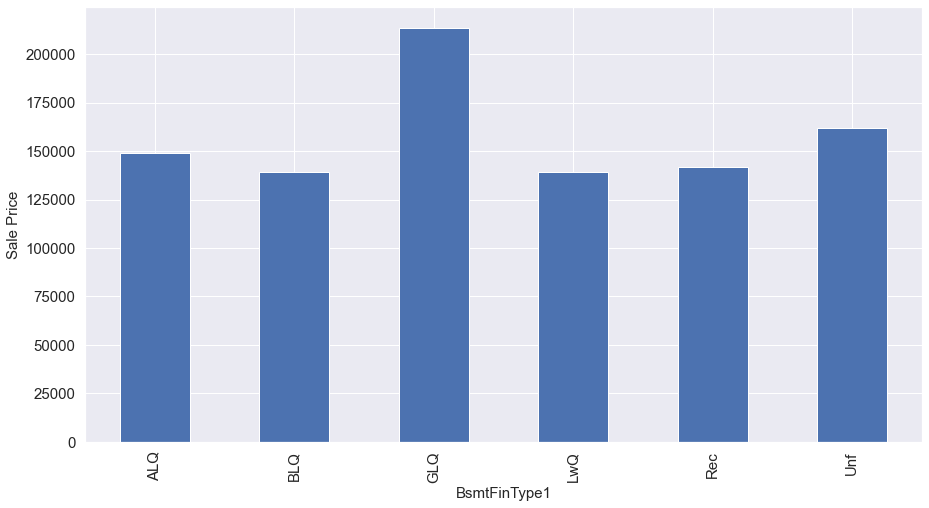

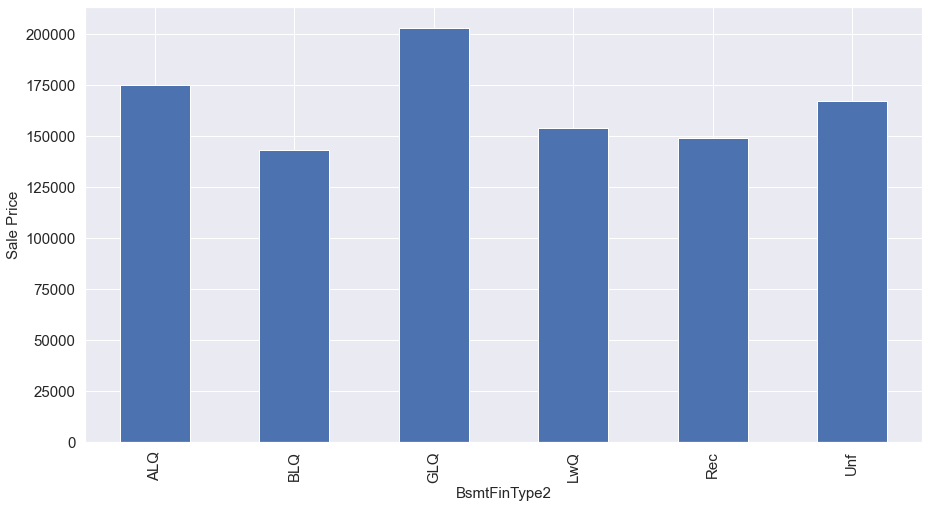

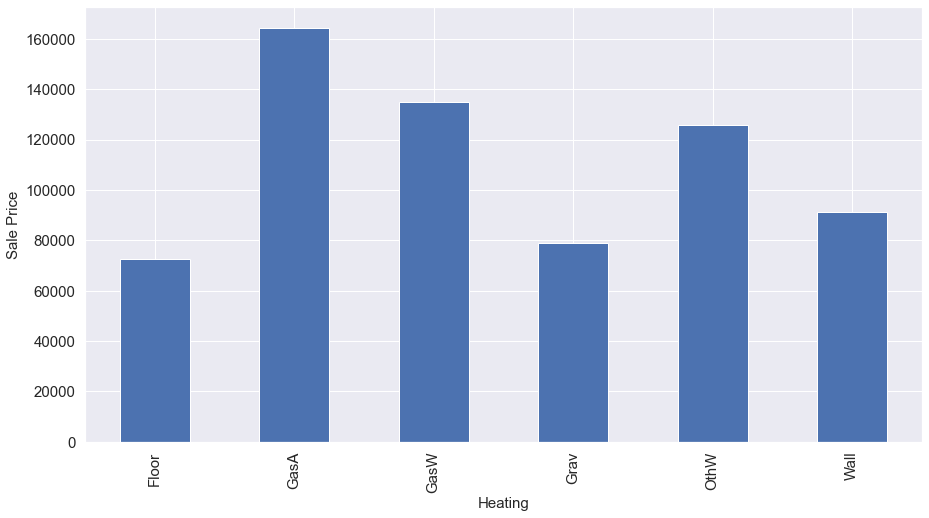

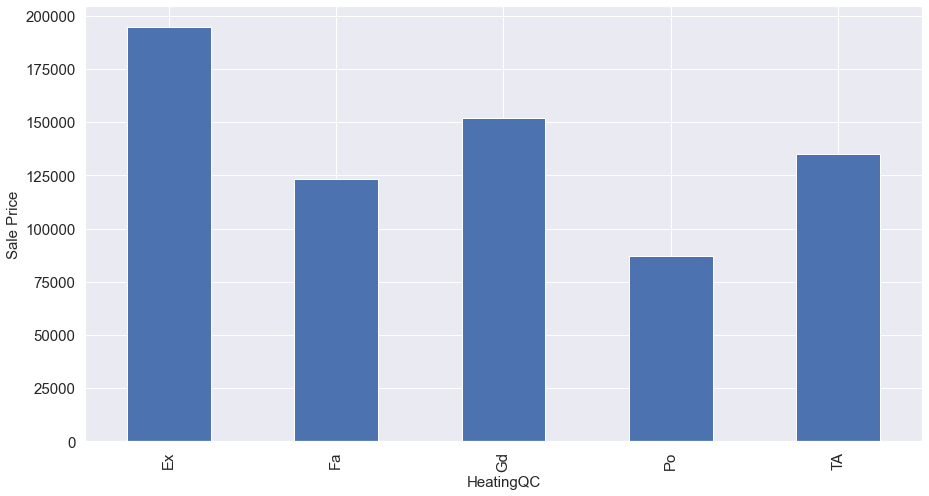

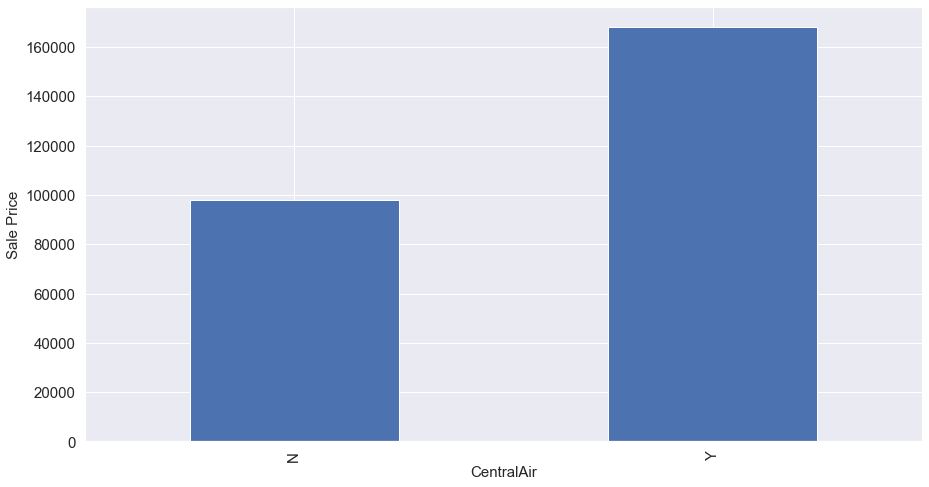

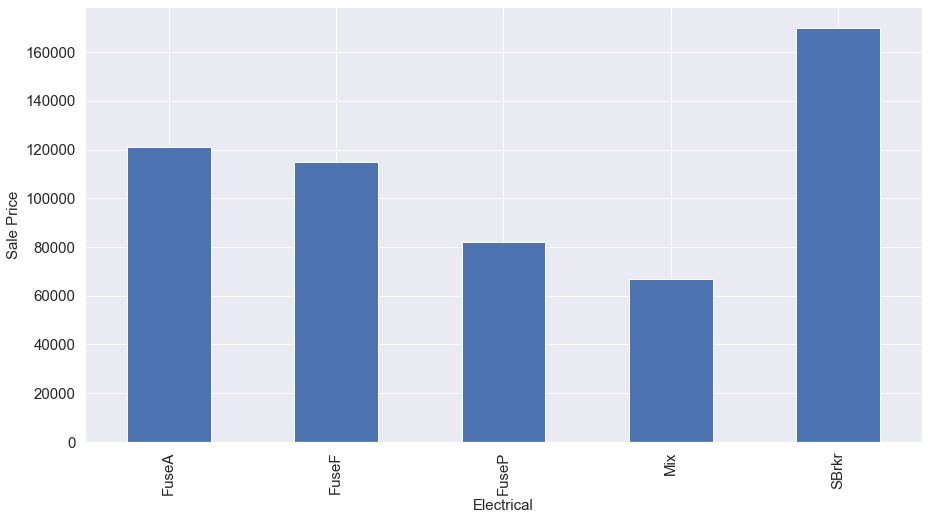

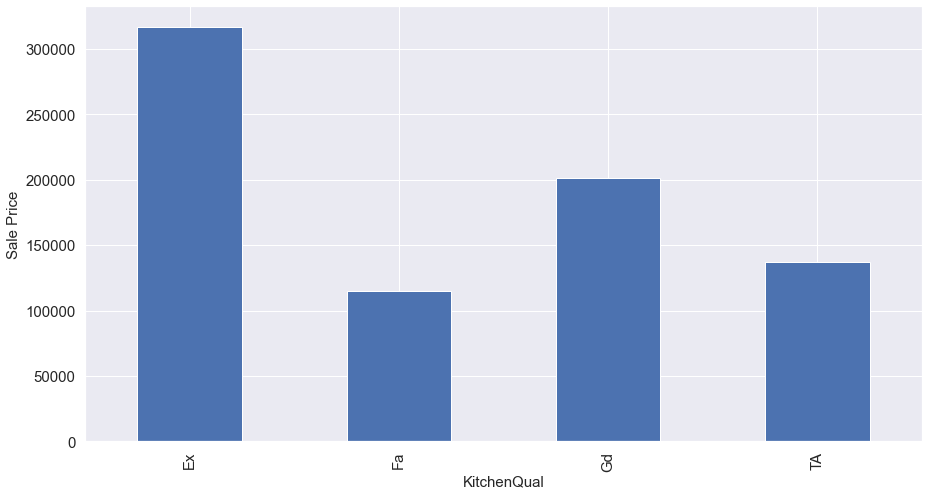

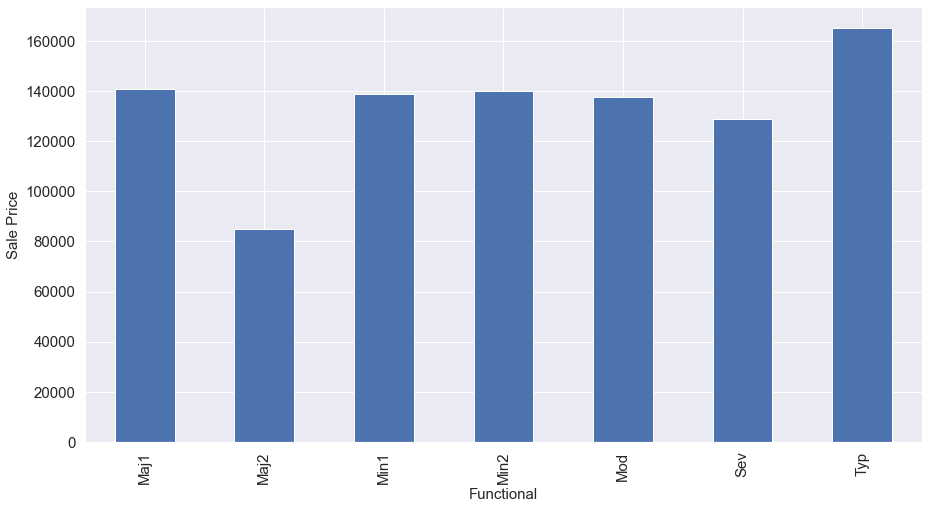

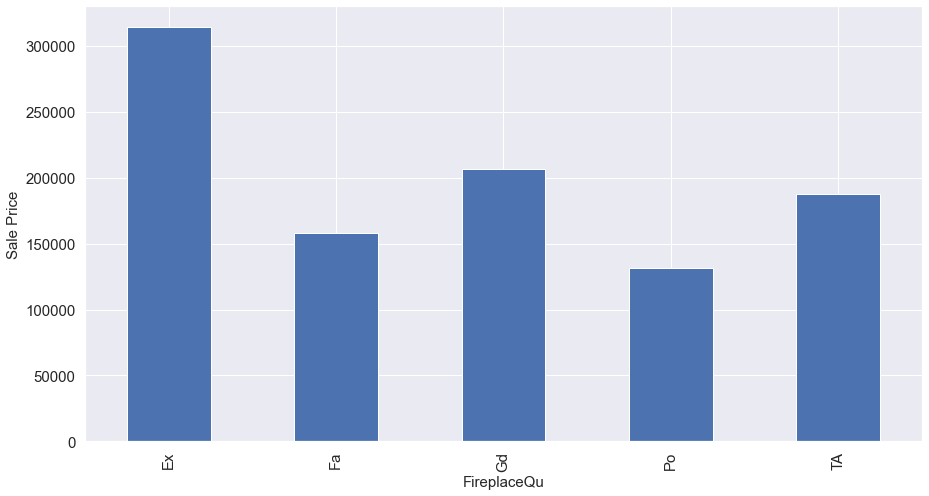

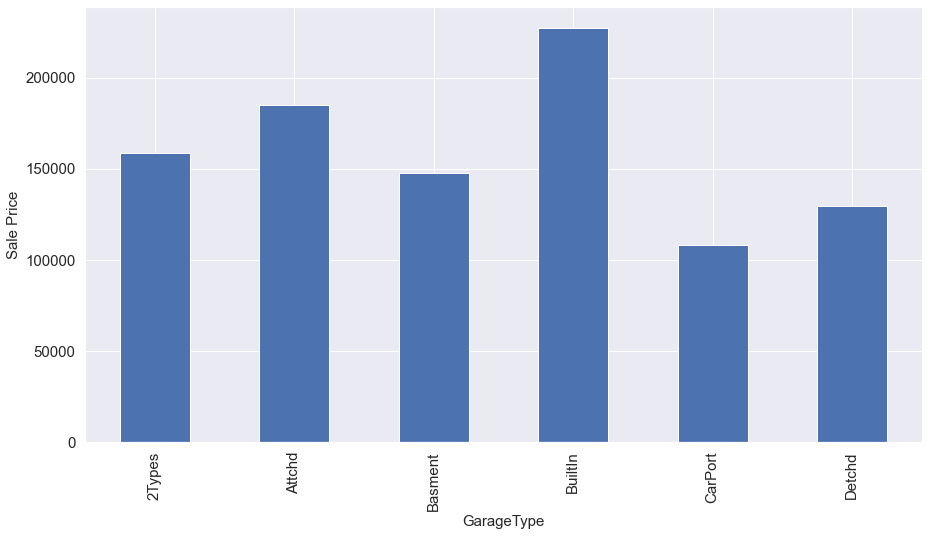

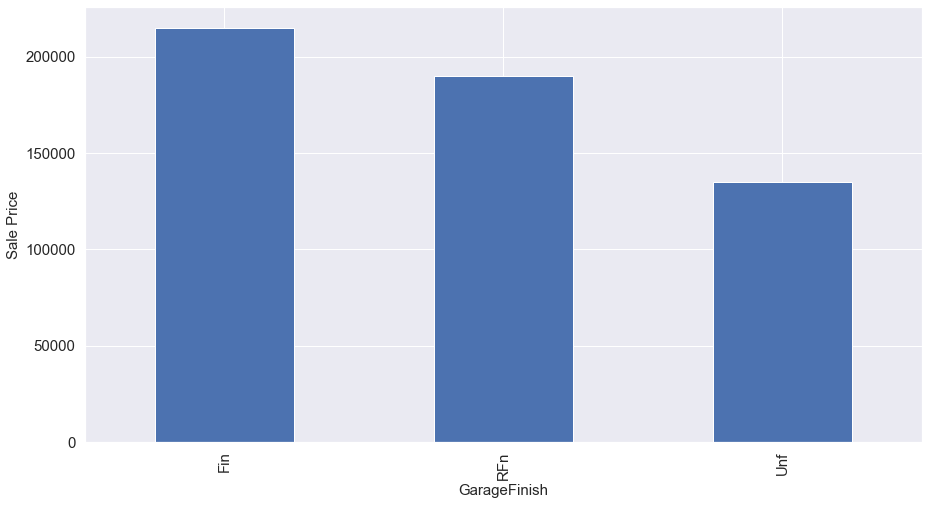

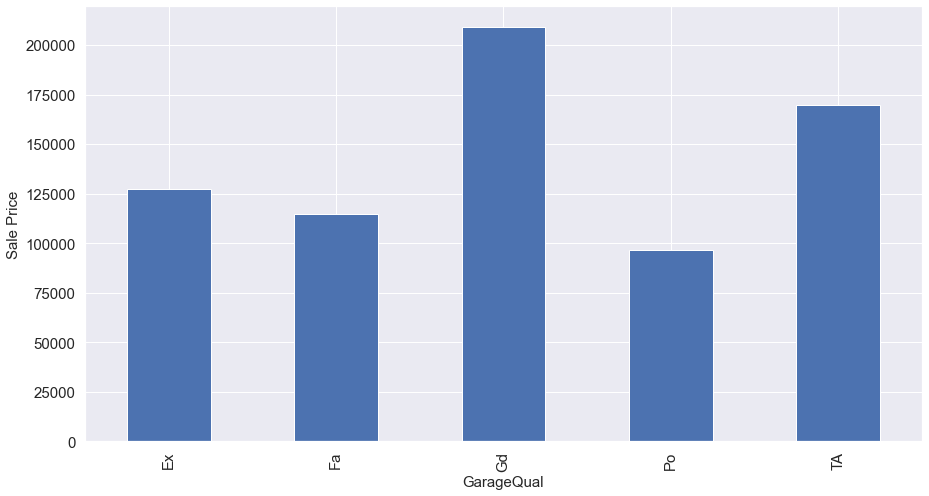

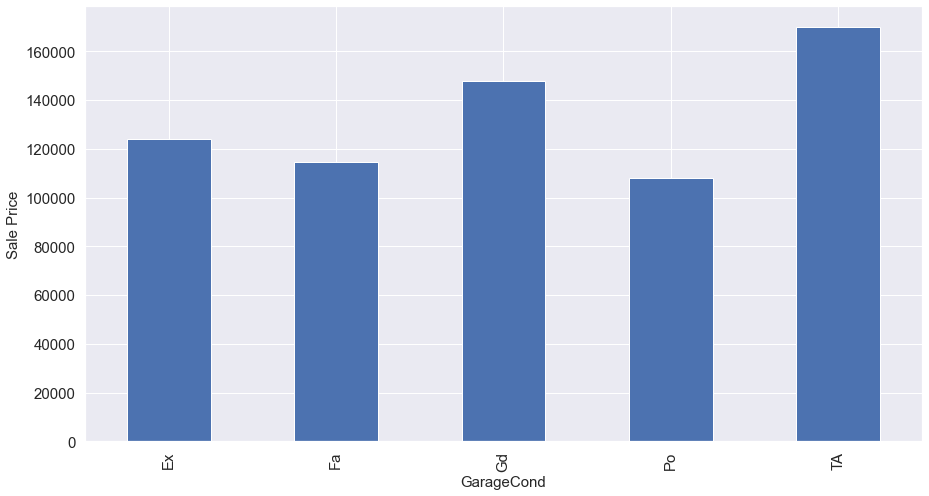

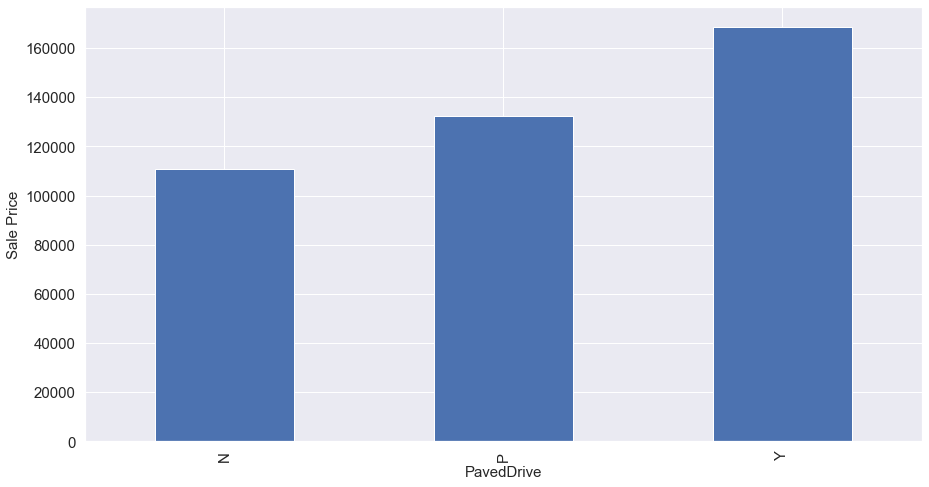

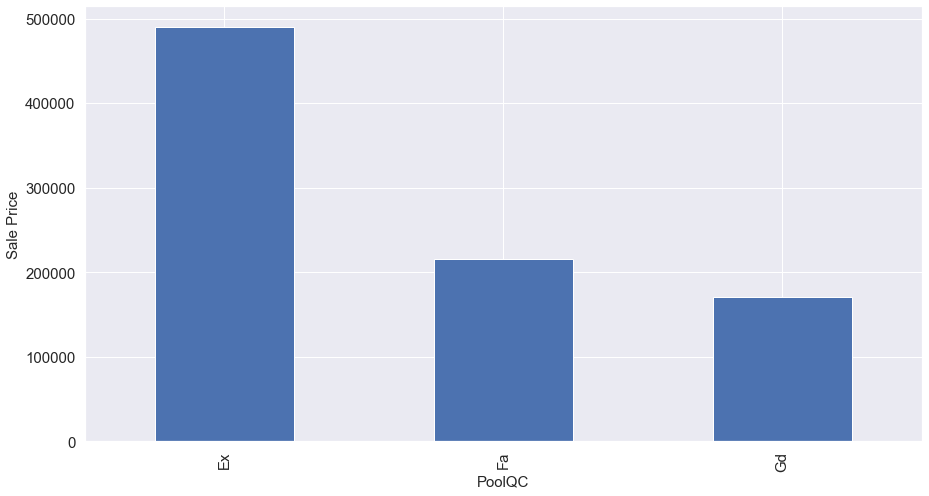

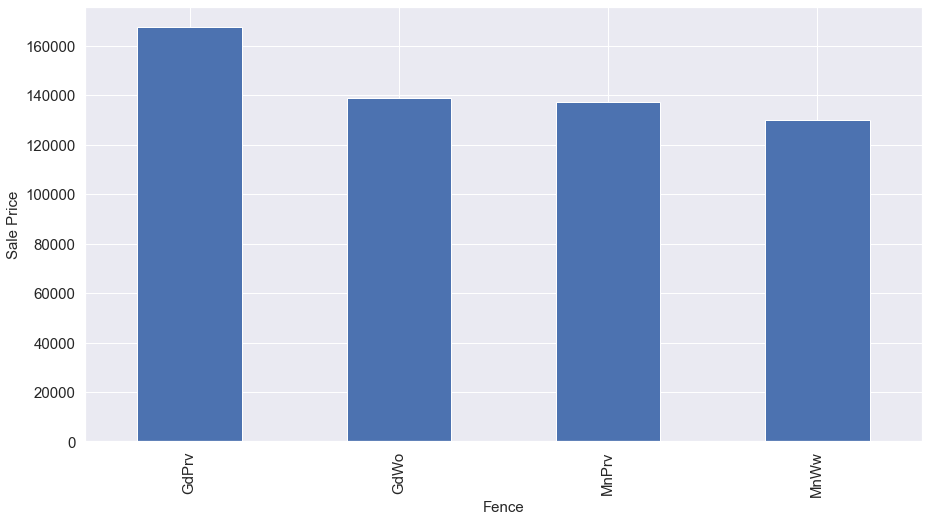

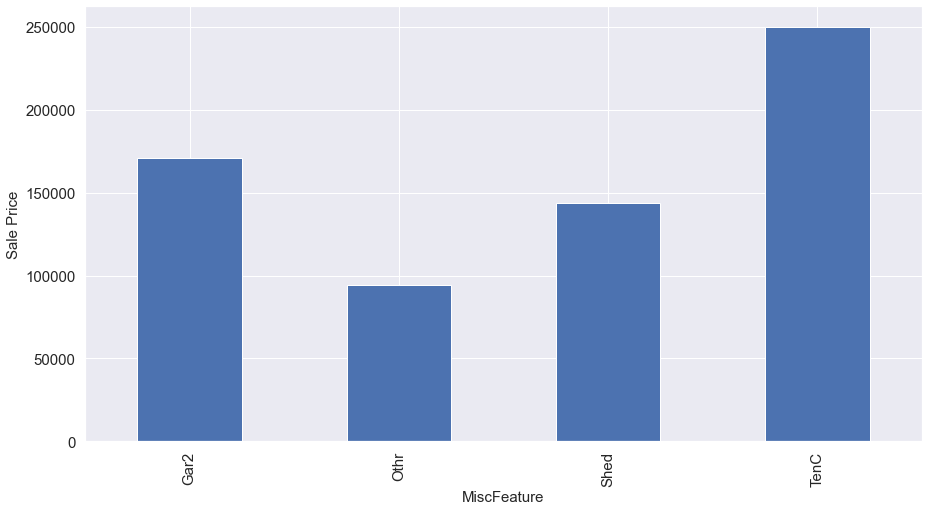

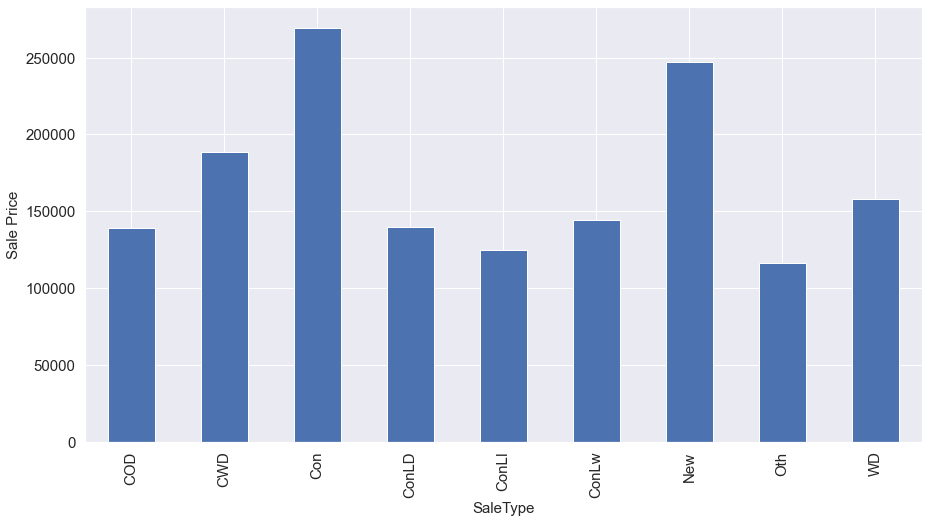

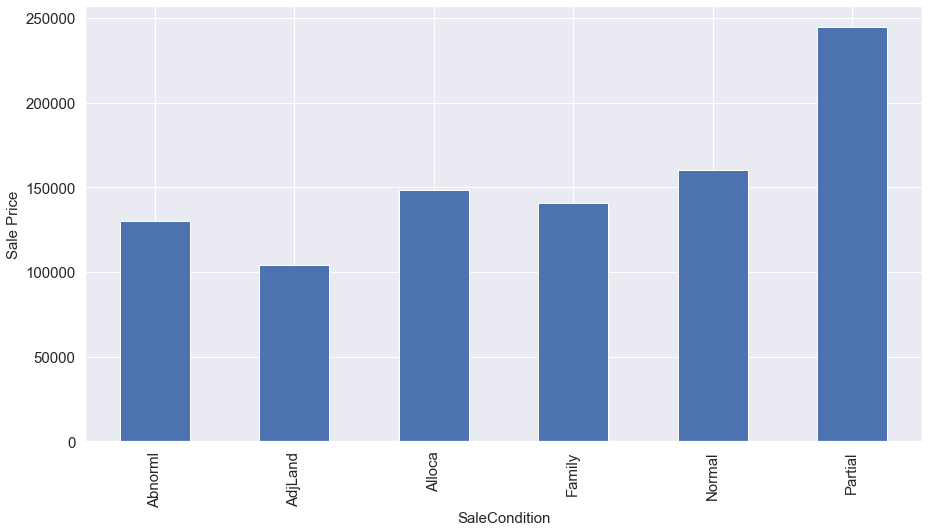

In [28]:
for feature in categorical_feature:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

### Categorical Feature nan value

In [29]:
cat_nan = [feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes=='O']
train[cat_nan].head()

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0   NaN    BrkFace       Gd       TA           No          GLQ          Unf   
1   NaN       None       Gd       TA           Gd          ALQ          Unf   
2   NaN    BrkFace       Gd       TA           Mn          GLQ          Unf   
3   NaN       None       TA       Gd           No          ALQ          Unf   
4   NaN    BrkFace       Gd       TA           Av          GLQ          Unf   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC Fence  \
0         NaN     Attchd          RFn         TA         TA    NaN   NaN   
1          TA     Attchd          RFn         TA         TA    NaN   NaN   
2          TA     Attchd          RFn         TA         TA    NaN   NaN   
3          Gd     Detchd          Unf         TA         TA    NaN   NaN   
4          TA     Attchd          RFn         TA         TA    NaN   NaN   

  MiscFeature  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [30]:
def fill_cat_nan(train, cat_nan):
    data= train.copy()
    data[cat_nan] = train[cat_nan].fillna('Missing')
    return data
train = fill_cat_nan(train, cat_nan)
train[cat_nan].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Numerical Nan Value 

In [31]:
numerical_nan = [feature for feature in numerical_features if train[feature].isnull().sum()>1 and train[feature].dtypes !='O']

for feature in numerical_nan:
    print(f'{feature}: {np.round(train[feature].isnull().mean(),4)} % missing value')

LotFrontage: 0.1774 % missing value
MasVnrArea: 0.0055 % missing value
GarageYrBlt: 0.0555 % missing value


In [32]:
# replacing numerical missing value
for feature in numerical_nan:
    # as we have outliers in the numerical data we replace nan with median
    median_value = train[feature].median()
    
   # make a new column in which 1 represent nan value and 0 represent not had nan value
    train[feature+'nan'] = np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median_value, inplace=True)
    
train[numerical_nan].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [33]:
train['Electrical'] = train['Electrical'].fillna('Missing')

In [34]:
train['Electrical'].value_counts()

SBrkr      1334
FuseA        94
FuseF        27
FuseP         3
Mix           1
Missing       1
Name: Electrical, dtype: int64

In [35]:
train.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


### No Null/nan values

In [36]:
train.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0   8450.0   Pave  Missing      Reg   
1    2          20       RL         80.0   9600.0   Pave  Missing      Reg   
2    3          60       RL         68.0  11250.0   Pave  Missing      IR1   
3    4          70       RL         60.0   9550.0   Pave  Missing      IR1   
4    5          60       RL         84.0  14260.0   Pave  Missing      IR1   
5    6          50       RL         85.0  14115.0   Pave  Missing      IR1   
6    7          20       RL         75.0  10084.0   Pave  Missing      Reg   
7    8          60       RL         69.0  10382.0   Pave  Missing      IR1   
8    9          50       RM         51.0   6120.0   Pave  Missing      Reg   
9   10         145       RL         50.0   7420.0   Pave  Missing      Reg   
10  11          20       RL         70.0  11200.0   Pave  Missing      Reg   
11  12          60       RL         85.0  11924.0   Pave  Missing      IR1   
12  13          20       RL         69.0  12968.0   Pave  Missing      IR2   
13  14          20       RL         91.0  10652.0   Pave  Missing      IR1   
14  15          20       RL         69.0  10920.0   Pave  Missing      IR1   
15  16          45       RM         51.0   6120.0   Pave  Missing      Reg   
16  17          20       RL         69.0  11241.0   Pave  Missing      IR1   
17  18          90       RL         72.0  10791.0   Pave  Missing      Reg   
18  19          20       RL         66.0  13695.0   Pave  Missing      Reg   
19  20          20       RL         70.0   7560.0   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7          5.0       2003   
1        Norm     1Fam     1Story            6          7.5       1976   
2        Norm     1Fam     2Story            7          5.0       2001   
3        Norm     1Fam     2Story            7          5.0       1915   
4        Norm     1Fam     2Story            8          5.0       2000   
5        Norm     1Fam     1.5Fin            5          5.0       1993   
6        Norm     1Fam     1Story            8          5.0       2004   
7        Norm     1Fam     2Story            7          6.0       1973   
8        Norm     1Fam     1.5Fin            7          5.0       1931   
9      Artery   2fmCon     1.5Unf            5          6.0       1939   
10       Norm     1Fam     1Story     

In [37]:
for feature in year_feature:
    if feature!='YrSold':
        train[feature] = train['YrSold'] - train[feature]

In [38]:
train[year_feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          5           5.0          5.0    2008
1         31          31.0         31.0    2007
2          7           6.0          7.0    2008
3         91          36.0          8.0    2006
4          8           8.0          8.0    2008

In [39]:
numerical_feat = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in numerical_feat:
    train[feature] = np.log(train[feature])

In [40]:
train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          5.0          5   
1       Norm     1Fam     1Story            6          7.5         31   
2       Norm     1Fam     2Story            7          5.0          7   
3       Norm     1Fam     2Story            7          5.0         91   
4       Norm     1Fam     2Story            8          5.0          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           5.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          31.0     Gable  CompShg     MetalSd     MetalSd       None   
2           6.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          36.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           8.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf           0      150.0          856   
1          ALQ       978.0          Unf           0      284.0         1262   
2          GLQ       486.0          Unf           0      434.0          920   
3          ALQ       216.0          Unf           0      540.0          756   
4          GLQ       655.0          Unf           0      490.0         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854           145   
1    GasA        Ex          Y      SBrkr  7.140453         0           145   
2    GasA        Ex          Y      SBrkr  6.824374       866           145   
3    GasA        Gd          Y      SBrkr  6.867974       756           145   
4    GasA        Ex          Y      SBrkr  7.043160      1053           145   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249           1.0             0       2.0       1.0           3.0   
1   7.140453           0.0             0       2.0       0.0           3.0   
2   7.487734           1.0             0       2.0       1.0           3.0   
3   7.448334           1.0             0       1.0       0.0           3.0   
4   7.695303           1.0             0       2.0       1.0           4.0   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ         0.0     Missing   
1             1          TA             6        Typ         1.0          TA   
2             1          Gd             6        Typ         1.0          TA   
3             1

In [41]:
for feature in categorical_feature:
    temp_cat = train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df = temp_cat[temp_cat>0.01].index
    train[feature] = np.where(train[feature].isin(temp_df), train[feature], 'rare_category')

### Changing categoral feature in numerical dtype

In [42]:
from sklearn.preprocessing import LabelEncoder

for feature in categorical_feature:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])

In [43]:
train.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         2     4.174387  9.041922       0      1         2   
1   2          20         2     4.382027  9.169518       0      1         2   
2   3          60         2     4.219508  9.328123       0      1         0   
3   4          70         2     4.094345  9.164296       0      1         0   
4   5          60         2     4.430817  9.565214       0      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          3          0             4           2   
1            3          0          2          0            22           1   
2            3          0          3          0             4           2   
3            3          0          0          0             5           2   
4            3          0          2          0            13           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            7          5.0          5   
1           0         0           1            6          7.5         31   
2           0         0           2            7          5.0          7   
3           0         0           2            7          5.0         91   
4           0         0           2            8          5.0          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0           5.0          0         0            7            7           1   
1          31.0          0         0            4            4           2   
2           6.0          0         0            7            7           1   
3          36.0          0         0            8            9           2   
4           8.0          0         0            7            7           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          1          2           2         2         3   
1         0.0          2          2           1         2         3   
2       162.0          1          2           2         2         3   
3         0.0          2          2           0         4         1   
4       350.0          1          2           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             2       706.0             5           0   
1             1             0       978.0             5           0   
2             3             2       486.0             5           0   
3             4             0       216.0             5           0   
4             0             2       655.0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0          856        0          0           1           2   
1      284.0         1262        0          0           1           2   
2      434.0          920        0          0           1           2   
3      540.0          756        0          2           1           2   
4      490.0         1145        0          0           1           2   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854           145   7.444249           1.0             0   
1  7.140453         0           145   7.140453           0.0             0   
2  6.824374       866           145   7.487734           1.0             0   
3  6.867974       756           145   7.448334           1.0             0   
4  7.043160      1053           145   7.695303           1.0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0       1.0           3.0             1            2             8   
1       2.0       0.0           3.0             1            3             6   
2       2.0       1.0           3.0             1            2             6   
3       1.0       0.0           3.0             1        

### Feature scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

feature_scale  = [feature for feature in train.columns if feature not in ['Id','SalePrice']]
scaler = MinMaxScaler()
train[feature_scale] = scaler.fit_transform(train[feature_scale])

In [45]:
train.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1        0.32       0.5     0.614500  0.702341     0.0    0.5  0.666667   
1   2        0.00       0.5     0.762831  0.753812     0.0    0.5  0.666667   
2   3        0.32       0.5     0.646733  0.817791     0.0    0.5  0.000000   
3   4        0.40       0.5     0.557320  0.751705     0.0    0.5  0.000000   
4   5        0.32       0.5     0.797685  0.913430     0.0    0.5  0.000000   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0          1.0        0.0       0.75        0.0      0.181818         0.4   
1          1.0        0.0       0.50        0.0      1.000000         0.2   
2          1.0        0.0       0.75        0.0      0.181818         0.4   
3          1.0        0.0       0.00        0.0      0.227273         0.4   
4          1.0        0.0       0.50        0.0      0.590909         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         0.0       0.0         0.4        0.625        0.375      0.040   
1         0.0       0.0         0.2        0.500        1.000      0.248   
2         0.0       0.0         0.4        0.625        0.375      0.056   
3         0.0       0.0         0.4        0.625        0.375      0.728   
4         0.0       0.0         0.4        0.750        0.375      0.064   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.098361        0.0       0.0          0.7          0.7        0.25   
1      0.524590        0.0       0.0          0.4          0.4        0.50   
2      0.114754        0.0       0.0          0.7          0.7        0.25   
3      0.606557        0.0       0.0          0.8          0.9        0.50   
4      0.147541        0.0       0.0          0.7          0.7        0.25   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0    0.472289   0.333333   0.666667        0.50       0.5      0.75   
1    0.000000   0.666667   0.666667        0.25       0.5      0.75   
2    0.390361   0.333333   0.666667        0.50       0.5      0.75   
3    0.000000   0.666667   0.666667        0.00       1.0      0.25   
4    0.843373   0.333333   0.666667        0.50       0.5      0.75   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0          1.00      0.333333    0.396490      0.833333         0.0   
1          0.25      0.000000    0.549245      0.833333         0.0   
2          0.75      0.333333    0.272938      0.833333         0.0   
3          1.00      0.000000    0.121306      0.833333         0.0   
4          0.00      0.333333    0.367848      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.088994     0.404975      0.0        0.0         1.0    0.666667   
1   0.168496     0.606965      0.0        0.0         1.0    0.666667   
2   0.257490     0.436816      0.0        0.0         1.0    0.666667   
3   0.320380     0.355224      0.0        0.5         1.0    0.666667   
4   0.290715     0.548756      0.0        0.0         1.0    0.666667   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.504772  0.469231           0.0   0.774958           0.4           0.0   
1  0.712973  0.000000           0.0   0.630798           0.0           0.0   
2  0.543445  0.475824           0.0   0.795592           0.4           0.0   
3  0.566830  0.415385           0.0   0.776896           0.4           0.0   
4  0.660790  0.578571           0.0   0.894090           0.4           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.625           0.0     0.666667         0.750   
1  0.666667       0.0         0.625           0.0     1.000000         0.500   
2  0.666667       0.5         0.625           0.0     0.666667         0.500   
3  0.333333       0.0         0.625           0.0     0.6

In [46]:
train_new = train.copy()
train_new.to_csv('train_new.csv', index=False)

## Train Test Split

In [47]:
x  = train.drop(['Id','SalePrice'], axis=1)
y = train['SalePrice']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [49]:
len(x_train), len(y_train)

(1022, 1022)

## Importing Models

In [61]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [51]:
!pip install xgboost

In [52]:
from xgboost import XGBRegressor

### Import Metrics

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

### RandomForest Regressor

In [62]:
models ={'RandomForestRegressor': RandomForestRegressor(),
        'AdaBoostRegressor': AdaBoostRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'LinearRegression': LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge()
        }

In [66]:
def fit_and_score(models, x_train,x_test,y_train,y_test):
    
    model_score= {}
    np.random.seed(42)
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_score[name]= model.score(x_test,y_test)
    return model_score

In [68]:
scores = fit_and_score(models= models,
                     x_train=x_train,
                     x_test=x_test,
                     y_train=y_train,
                     y_test=y_test)
scores

{'RandomForestRegressor': 0.8902376508521574,
 'AdaBoostRegressor': 0.8185217546103725,
 'GradientBoostingRegressor': 0.8950451685568899,
 'LinearRegression': 0.87905344618263,
 'Lasso': -0.00020358904172468328,
 'Ridge': 0.8818995142407708}

### Model Tuning: GradientBoostingRegressor

### GridSearchCV

In [ ]:
# loss{‘ls’, ‘lad’, ‘huber’, ‘quantile’}
# learning_ratefloat, default=0.1
# n_estimators
# subsample
# criterion{‘friedman_mse’, ‘mse’, ‘mae’}
# min_samples_split
# min_samples_leaf
# max_depth
# max_features{‘auto’, ‘sqrt’, ‘log2’}
# max_leaf_nodes

In [71]:
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
                 'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]
            }

In [82]:
gbm = GradientBoostingRegressor()
gbm_random=RandomizedSearchCV(estimator=gbm,
                        param_distributions=search_grid,
                        n_jobs=1,
                        cv=5,
                       verbose=2,
                        n_iter=100)
gbm_random.fit(x_train,y_train)

C:\Users\Ankita Shaily\anaconda3\envs\housing_price\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.75; total time=   0.9s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.75; total time=   0.9s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.75; total time=   1.1s
[CV] END learning_rate=0.001, max_depth=1, n_es

[CV] END learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=1; total time=   5.6s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5; total time=   7.1s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5; total time=   7.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5; total time=   7.4s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5; total time=   7.6s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5; total time=   7.5s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75; total time=   9.7s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75; total time=   9.6s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75; total time

[CV] END learning_rate=0.01, max_depth=1, n_estimators=500, random_state=1, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=500, random_state=1, subsample=1; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75; total time=   2.0s
[CV] 

[CV] END learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=1; total time=  10.8s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=1; total time=  10.9s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.75; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=0.75; total time=   3.0s
[CV] END l

[CV] END learning_rate=0.1, max_depth=1, n_estimators=1000, random_state=1, subsample=1; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=1000, random_state=1, subsample=1; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.5; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.5; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.5; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.5; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.5; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75; total time=   3.9s
[CV] END lea

[CV] END learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1; total time=   5.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5; total time=   7.6s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5; total time=   5.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5; total time=   5.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5; total time=   6.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.75; total time=   7.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=1000, random_state=1, subsample=0.75; total time=   6.2s
[CV] END learn

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4],
                                        'n_estimators': [500, 1000, 2000],
                                        'random_state': [1],
                                        'subsample': [0.5, 0.75, 1]},
                   verbose=2)

In [87]:
best_random = gbm_random.best_estimator_
best_random

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=2000,
                          random_state=1, subsample=0.5)

In [88]:
y_preds = best_random.predict(x_test)

In [90]:
best_random.score(x_test,y_test)

0.9027710563982007

In [93]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_preds)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_preds))}')

Mean Absolute Error: 0.08194699701330807
Mean Squared Error: 0.015022954419654982
RMSE: 0.12256816234102143
